# Quantitative Auswertung zur FF2

In diesem Jupyter Notebook erfolgt die Auswertung zur zweiten Forschungsfrage (FF2) sowie die Berechnung von Kappa_Kat aus FF1.

Vorausgegangen ist somit die Erhebung und Aufbereitung der Daten (Notebook: FF1_Schritt1) sowie deren qualitative Auswertung in MAXQDA.
Separat ist außerdem die Übertragung der Kategoriensysteme aus einer Excel-Tabelle in Latex-Code. 
Alle anderen Auswertungsschritte, die in Python gemacht wurden, erfolgen in diesem Notebook. 
Hierzu greift dieses Notebook auf diverse Funktionen zurück, die in der Bibliothek JanPromoBib_Auswertung_v5.py gespeichert sind. 

Ausgangspunkt dieser Auswertung sind die aus MAXQDA exportierten Kreuztabellen mit den Kategorienzuordnungen, die in dem Ordner "Kreuztabellen" gespeichert und in einem Datenarchiv von Jan Heysel bei Zenodo zugänglich sind. 

Der Aufbau dieses Notebooks folgt grob dem Aufbau des Kapitels meiner Dissertation zur zweiten Forschungsfrage. 
Die Sections in diesem Kapitel meiner Diss sind in den Überschriften dieses Notebooks angegeben. 

## Vorbereitungen am Anfang

### Einlesen der Bibliotheken:

In [4]:
import numpy as np
import time
import os 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from scipy.stats import wilcoxon
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu
from scipy.stats import spearmanr
from scipy.stats import ttest_ind
from scipy.stats import kendalltau
from scipy.stats import ttest_ind
from scipy.stats import shapiro

from statsmodels.stats.power import TTestIndPower

from decimal import Decimal
import sys
import logging # see https://stackoverflow.com/questions/49580313/create-a-log-file
from datetime import datetime
from tqdm import tqdm
import re
from collections import Counter

# zum Plotten der Sanky Diagramme:
from pysankey2.datasets import load_fruits
from pysankey2 import Sankey

from JanPromoBib_Auswertung_v5_DissFinal import *

### Statische Angaben

In [7]:
# Ordner:
Ordner_Quelle = "/Users/janheysel/Documents/Promotion/EvaDiss_DatenBestehend"
Ordner_Ziel_Daten = "/Users/janheysel/Documents/Promotion/EvaDiss_DatenNeu"
Ordner_Ziel_Abbildungen = "/Users/janheysel/Documents/Promotion/EvaDiss_AbbildungenNeu/"

# Codes und Gruppen:
codes      = ["M1", "M2", "M3", "M4", "S1", "S2", "S3", "PR1", "PR2", "PR3"]
codes9     = ["M1", "M2", "M3", "M4", "S1", "S2", "S3", "PR1", "PR2"]
codes_M    = ["M1", "M2", "M3", "M4"]
codes_S    = ["S1", "S2", "S3"]
codes_3PR  = ["PR1", "PR2", "PR3"]
codes_2PR  = ["PR1", "PR2"]
codes_6SPR = ["S1", "S2", "S3", "PR1", "PR2", "PR3"]
codes_5SPR = ["S1", "S2", "S3", "PR1", "PR2", "PR3"]


set_ohnePR3 = ["M1", "M2", "M3", "M4", "S1", "S2", "S3", "PR1", "PR2"]
set_M       = ["M1", "M2", "M3", "M4"]
set_S       = ["S1", "S2", "S3"]
set_PR      = ["PR1", "PR2"]
set_SPR     = ["S1", "S2", "S3", "PR1", "PR2"]

cluster = ["M", "SPR", "global"]


dict_sets = {"global": set_ohnePR3, "M": set_M, "S": set_S, "PR": set_PR, "SPR": set_SPR}


# codes, für die N3 gesetzt wird, wenn mehrere Kategorien aus N2 oder N1 gesetzt werden: 
N3_Schwellen = {"S1":5, "S2":5, "S3":8, "PR2":8} # ab dieser "Niveaupunktzahl" (einschließlich) wird N3 gesetzt
    
# Anzahl Zeilen im Latex Dataframe:
n_zeilenauswahl = 10

df_all   = pd.read_pickle(Ordner_Ziel_Daten + "/" + "AlleDatenQuant.pkl")

## Zuordnung der Antworten der Jugendlichen zu Niveaustufen (12.2) sowie statistische Auswertung dazu (12.5)

Ergebnisse sind 
- die Tabellen NiveausPrePost_filtered.xlsx/pkl für alle codes,
- Histogramme für die Niveauverteilungen für alle Codes,
- die Tabelle df_stats.xlsx/pkl/tex mit allen statistischen Werten (beachte: tex für die Diss)

Alle Daten sind gespeichert in dem Ordner Promotion/EvaDiss_DatenNeu und die Abbildungen in dem Ordner Promotion/EvaDiss_AbbildungenNeu

  0%|                                                    | 0/10 [00:00<?, ?it/s]/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Wilcoxon:
1612.0 9.545199026664249e-10
Cohens d
1.002
p Bonferroni korrigiert:
9.545199026664249e-09
Spearman R mit Tabelle im long format:
0.435
Mittlerer Effekt.


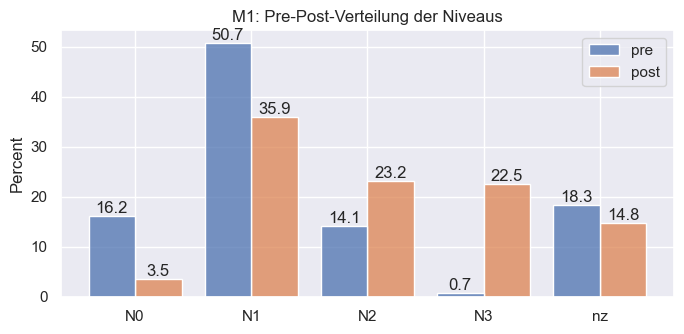

 10%|████▍                                       | 1/10 [00:00<00:01,  4.72it/s]/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Wilcoxon:
3474.0 1.0928875277073537e-11
Cohens d
0.96
p Bonferroni korrigiert:
1.0928875277073538e-10
Spearman R mit Tabelle im long format:
0.447
Mittlerer Effekt.


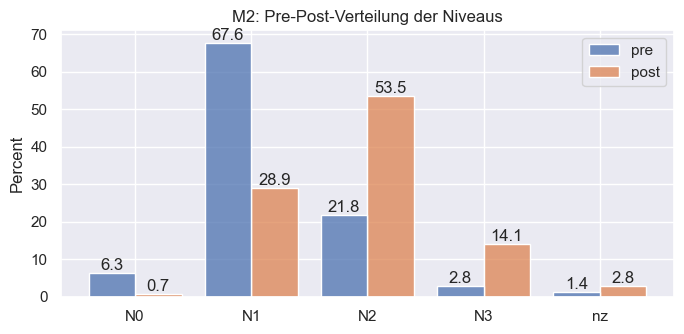

 20%|████████▊                                   | 2/10 [00:00<00:01,  4.58it/s]/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Wilcoxon:
3256.0 8.878240090512064e-13
Cohens d
0.945
p Bonferroni korrigiert:
8.878240090512063e-12
Spearman R mit Tabelle im long format:
0.416
Mittlerer Effekt.


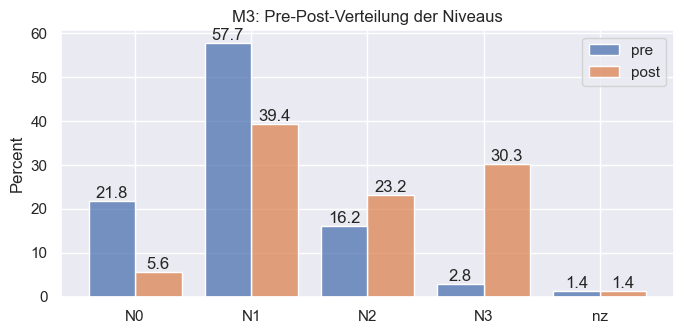

 30%|█████████████▏                              | 3/10 [00:00<00:01,  3.92it/s]/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Wilcoxon:
2992.0 1.4796155317984354e-12
Cohens d
0.893
p Bonferroni korrigiert:
1.4796155317984354e-11
Spearman R mit Tabelle im long format:
0.414
Mittlerer Effekt.


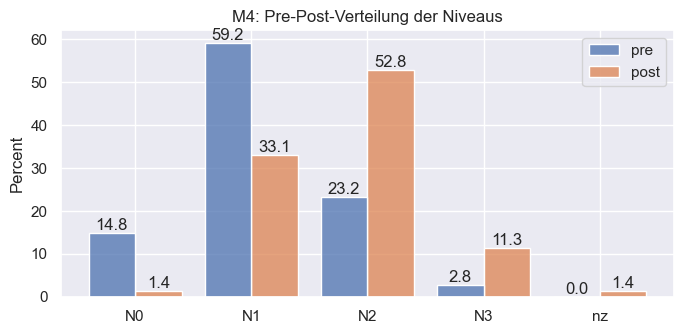

 40%|█████████████████▌                          | 4/10 [00:00<00:01,  4.23it/s]/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Wilcoxon:
6053.0 3.766598042955496e-18
Cohens d
1.684
p Bonferroni korrigiert:
3.766598042955496e-17
Spearman R mit Tabelle im long format:
0.654
Großer Effekt.


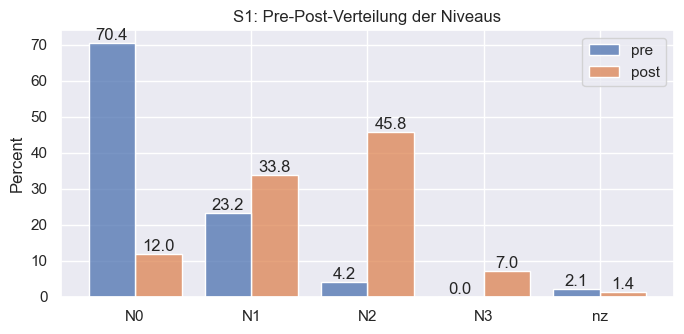

 50%|██████████████████████                      | 5/10 [00:01<00:01,  4.28it/s]/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Wilcoxon:
5668.5 3.1815474772947114e-16
Cohens d
1.327
p Bonferroni korrigiert:
3.1815474772947114e-15
Spearman R mit Tabelle im long format:
0.567
Großer Effekt.


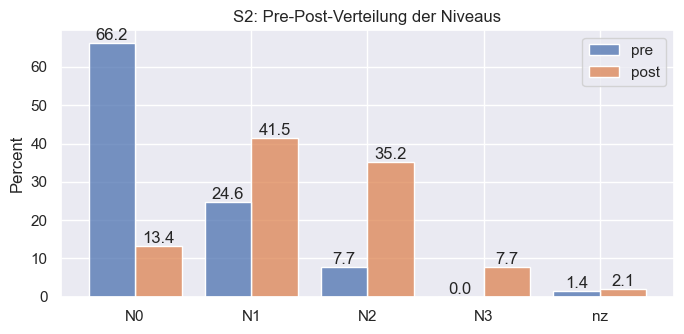

 60%|██████████████████████████▍                 | 6/10 [00:01<00:00,  4.29it/s]/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Wilcoxon:
3510.5 1.399623455418817e-14
Cohens d
1.494
p Bonferroni korrigiert:
1.399623455418817e-13
Spearman R mit Tabelle im long format:
0.608
Großer Effekt.


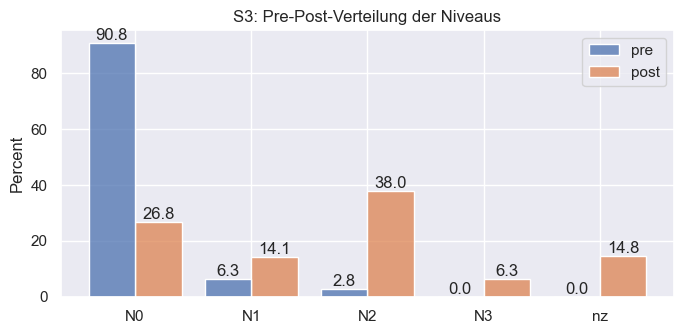

 70%|██████████████████████████████▊             | 7/10 [00:01<00:00,  4.39it/s]/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Wilcoxon:
5936.5 9.106257171882788e-20
Cohens d
2.078
p Bonferroni korrigiert:
9.106257171882787e-19
Spearman R mit Tabelle im long format:
0.721
Großer Effekt.


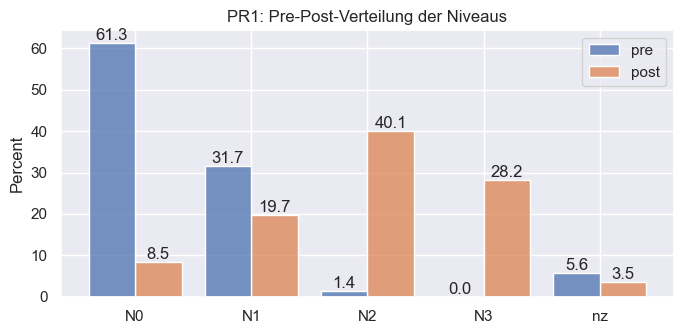

 80%|███████████████████████████████████▏        | 8/10 [00:01<00:00,  4.54it/s]/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Wilcoxon:
5449.0 1.5863610064036628e-20
Cohens d
2.068
p Bonferroni korrigiert:
1.5863610064036629e-19
Spearman R mit Tabelle im long format:
0.716
Großer Effekt.


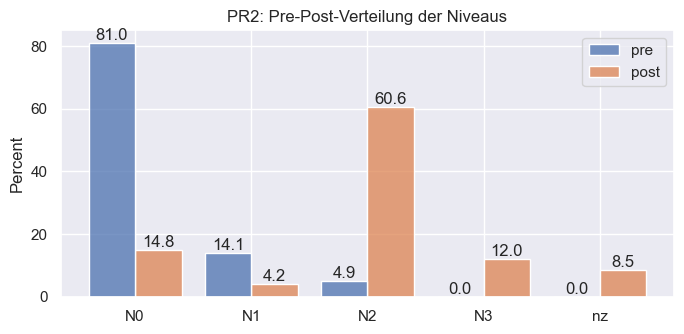

 90%|███████████████████████████████████████▌    | 9/10 [00:02<00:00,  4.64it/s]/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Wilcoxon:
4199.0 7.0014206271517e-17
Cohens d
1.566
p Bonferroni korrigiert:
7.001420627151701e-16
Spearman R mit Tabelle im long format:
0.62
Großer Effekt.


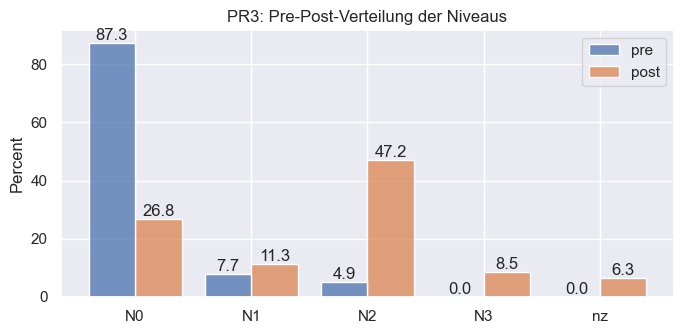

100%|███████████████████████████████████████████| 10/10 [00:02<00:00,  4.44it/s]


In [111]:
# Ein Dataframe anlegen, in dem am Ende alle statistischen Größen notiert werden:
df_stats = pd.DataFrame(index = ["Wilcoxons p", "Bonferroni p", "Spearman R", "Cohens d", "N"])

# Testgruppe:
codes_test = ["PR2"]

# Schleife über alle Codes für die Auswertung:
for code in tqdm(codes):
    
    # Die aus MaxQDA exportierten Kreuztabellen einlesen:
    df1 = read_prepare_Kreuztabelle(Ordner_Quelle, "Kreuztabelle_" + code + "_pre_142einzeln.xlsx", "pre")
    df2 = read_prepare_Kreuztabelle(Ordner_Quelle, "Kreuztabelle_" + code + "_post_142einzeln.xlsx", "post")
    
    # Nun die Niveaus aus den inhaltlichen Kategorien bilden:
    df1_niv = niveaus_aus_kategorien(df1, code, N3_Schwellen)
    df2_niv = niveaus_aus_kategorien(df2, code, N3_Schwellen)
       
    
    ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### #####
    ##### Nun ein Dataframe mit den ermittelten Niveaus speichern: #####
    ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### #####
    
    # Bilde ein neues Dataframe, in dem die Pre-Post-Niveaus der Testpersonen notiert sind.
    df_Niveaus = pd.DataFrame(index = df1.index)
    df_Niveaus["pre"] = df1_niv["Niveau"]
    df_Niveaus["post"] = df2_niv["Niveau"]

    # save data:
    df1_niv.to_excel(Ordner_Ziel_Daten + "/" + code + "KatNiveau_Pre.xlsx")
    df2_niv.to_excel(Ordner_Ziel_Daten + "/" + code + "KatNiveau_Post.xlsx")
    df_Niveaus.to_excel(Ordner_Ziel_Daten + "/" + code + "NiveausPrePost.xlsx")
    
    # get df in which rows with 9 = "nicht zuordenbar" are dropped:
    filtered_df = df_Niveaus[(df_Niveaus['pre'] != 4) & (df_Niveaus['post'] != 4)]
    N_filtered = filtered_df.shape[0]
    
    filtered_df.to_excel(Ordner_Ziel_Daten + "/" + code + "NiveausPrePost_filtered.xlsx")
    filtered_df.to_pickle(Ordner_Ziel_Daten + "/" + code + "NiveausPrePost_filtered.pkl")
    
    ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### #####
    ##### Die statistischen Größen berechnen: #####
    ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### #####
    
    # Wilcoxon-Test, Bonferroni, Spearman:
    #Wilcoxon Test:
    # see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html
    TestEinZweiSeitig = "greater"
    res    = wilcoxon(x = filtered_df["post"], y=filtered_df["pre"], alternative=TestEinZweiSeitig,  method = 'approx') # "mode" ist alt, in der aktuellen Version heißt es "method"
    stat   = res.statistic
    p_Wert = res.pvalue

    print("Wilcoxon:")
    print(stat, p_Wert)
    str_p_Wert = '%.3E' % Decimal(p_Wert)

    # Cohens d
    # Herausholen der x-,y-Daten:
    pre_data = filtered_df["pre"].values
    post_data = filtered_df["post"].values
    d_Cohen = cohens_d(post_data, pre_data)
    str_d = str(np.round(d_Cohen,3))
    print("Cohens d")
    print(str_d)
    
    # Bonferroni Correction:
    N_tests = 10
    p_Bonferroni = p_Wert * N_tests

    print("p Bonferroni korrigiert:")
    print(p_Bonferroni)
    
    # Melt the DataFrame to long format
    melted_df = pd.melt(filtered_df, value_vars=['pre', 'post'], var_name='condition', value_name='value')
    # Add a column to represent 'pre' as 1 and 'post' as 2
    melted_df['condition'] = melted_df['condition'].apply(lambda x: 1 if x == 'pre' else 2)

    corr_mat = melted_df.corr(method='spearman')
    r_Spearman = corr_mat.iloc[1,0]
    str_r = str(np.round(r_Spearman,3))
    # interpretation: nach [1] ist es ab 0.1 eine schwache, ab 0.3 eine mittlere und ab 0.5 eine starker Effekt
    # [1] https://statistikguru.de/spss/spearman-korrelation/ergebnisse-interpretieren-2.html

    df_stats[code] = [p_Wert, p_Bonferroni, r_Spearman, d_Cohen, N_filtered]
    print("Spearman R mit Tabelle im long format:")
    print(str_r)
    
    if r_Spearman < 0.1:
        print("Kein oder negativer Effekt.")
    elif r_Spearman < 0.3:
        print("Kleiner Effekt.")
    elif r_Spearman < 0.5:
        print("Mittlerer Effekt.")
    else:
        print("Großer Effekt.")
        
        
    ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### #####
    ##### Das Histogramm der Niveauverteilung für diese spezielle Frage plotten:
    ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### #####
    
    # Plot histogram with relative frequencies on y-axis:
    sns.set(style="darkgrid", rc={'figure.figsize':(7,3.5)})
    fig = sns.histplot(data=df_Niveaus, bins = 4, color="skyblue", multiple = "dodge", shrink = 0.8, discrete = True, stat="percent", common_norm=False)#, legend=True)
    fig.set_title(code + ": Pre-Post-Verteilung der Niveaus")
    fig.set_xticks([0, 1, 2, 3, 4], labels=['N0','N1','N2','N3', 'nz'])

    # show values above bars:
    for i in fig.containers:
        fig.bar_label(i, label_type='edge', fmt='%1.1f') #label_type='center'

    plt.tight_layout()

   
    plt.savefig(Ordner_Ziel_Abbildungen + code + "_hist.pdf")
    plt.savefig(Ordner_Ziel_Abbildungen + code + "_hist.png")
    plt.show()
    plt.close()
    


# Speichern der Tabelle mit der Statistik:    
df_stats.to_excel(Ordner_Ziel_Daten + "/df_stats.xlsx")
df_stats.to_pickle(Ordner_Ziel_Daten + "/df_stats.pkl")



    

### Tabelle mit den statistischen Kenngrößen formatieren und als latex-Tabelle ausgeben: 

In [113]:
df_stats

,M1,M2,M3,M4,S1,S2,S3,PR1,PR2,PR3
Wilcoxons p,9.545199e-10,1.092888e-11,8.878240e-13,1.479616e-12,3.766598e-18,3.181547e-16,1.399623e-14,9.106257e-20,1.586361e-20,7.001421e-17
Bonferroni p,9.545199e-09,1.092888e-10,8.878240e-12,1.479616e-11,3.766598e-17,3.181547e-15,1.399623e-13,9.106257e-19,1.586361e-19,7.001421e-16
Spearman R,4.345007e-01,4.466585e-01,4.162097e-01,4.141723e-01,6.543051e-01,5.668645e-01,6.082337e-01,7.212660e-01,7.161867e-01,6.202750e-01
Cohens d,1.001645e+00,9.595536e-01,9.447770e-01,8.931302e-01,1.684211e+00,1.327449e+00,1.493835e+00,2.077693e+00,2.067745e+00,1.566077e+00
N,1.030000e+02,1.370000e+02,1.380000e+02,1.400000e+02,1.380000e+02,1.380000e+02,1.210000e+02,1.290000e+02,1.300000e+02,1.330000e+02


In [197]:
# write df_stats as tex table:

# Ordner für Ziel erzeugen:
Ordner_out = Ordner_Ziel_Daten
dateiname_latex = "df_stats.tex"
pfad = Ordner_out + "/" + dateiname_latex

# Bezeichnungen der Tabelle: 
my_label = "tab:df_stats"
my_caption = "Kenngrößen der quantitativen Verschiebung: p-Wert nach Wilcoxon, p Bonferroni korrigiert, R nach Spearman, effektiver Stichprobenumfang N der jeweiligen Berechnung. Details s. Text."
my_column_format = "l | l l l l l l l l l l"


# Define a custom format function
def format_sci_notation(value):
    if value < 0.001:
        return "{:.2e}".format(value)
    elif value < 1:
        return "{:.2f}".format(value)
    else:
        return int(value)

# Use to_latex with float_format
latex_str = df_stats.to_latex(float_format=format_sci_notation, label = my_label, position = "ht", caption = my_caption, column_format = my_column_format)

# Print the LaTeX string
print(latex_str)

# save the latex string:

# Open the file in write mode and write the LaTeX string
with open(pfad, 'w', encoding='utf-8') as file:
    file.write(latex_str)

print(f"LaTeX string has been saved to '{pfad}'.")

\begin{table}[ht]
\caption{Kenngrößen der quantitativen Verschiebung: p-Wert nach Wilcoxon, p Bonferroni korrigiert, R nach Spearman, effektiver Stichprobenumfang N der jeweiligen Berechnung. Details s. Text.}
\label{tab:df_stats}
\begin{tabular}{l | l l l l l l l l l l}
\toprule
 & M1 & M2 & M3 & M4 & S1 & S2 & S3 & PR1 & PR2 & PR3 \\
\midrule
Wilcoxons p & 9.55e-10 & 1.09e-11 & 8.88e-13 & 1.48e-12 & 3.77e-18 & 3.18e-16 & 1.40e-14 & 9.11e-20 & 1.59e-20 & 7.00e-17 \\
Bonferroni p & 9.55e-09 & 1.09e-10 & 8.88e-12 & 1.48e-11 & 3.77e-17 & 3.18e-15 & 1.40e-13 & 9.11e-19 & 1.59e-19 & 7.00e-16 \\
Spearman R & 0.43 & 0.45 & 0.42 & 0.41 & 0.65 & 0.57 & 0.61 & 0.72 & 0.72 & 0.62 \\
N & 103 & 137 & 138 & 140 & 138 & 138 & 121 & 129 & 130 & 133 \\
\bottomrule
\end{tabular}
\end{table}

LaTeX string has been saved to '/Users/janheysel/Documents/Promotion/EvaDiss_DatenNeu/df_stats.tex'.


## Erstellung des Datenarrays df_all

In [55]:
# Dataframe erzeugen
df_all = pd.DataFrame()

# Daten zu Pre- und Posttest einlesen:
Ordner_Quelle = "/Users/janheysel/Documents/Promotion/EvaDiss_DatenBestehend"
df_pre  = pd.read_excel(Ordner_Quelle + "/FF1_A-" + "pre"  + "_Rohdaten_AnonymUndSortiert.xlsx")
df_post = pd.read_excel(Ordner_Quelle + "/FF1_A-" + "post" + "_Rohdaten_AnonymUndSortiert.xlsx")

# Nun die Informationen aus Pretest und Posttest in die Gesamttabelle schreiben:
# Personennummer:
df_all["P"] = df_pre["P"]

# Selbsteinschätzung zur Sicherheit - pre:
df_all["M1_pre_Sicherheit"]  = df_pre["MS1"]
df_all["M2_pre_Sicherheit"]  = df_pre["MS2"]
df_all["M3_pre_Sicherheit"]  = df_pre["MS3"]
df_all["M4_pre_Sicherheit"]  = df_pre["MS4"]
df_all["S1_pre_Sicherheit"]  = df_pre["SS1"]
df_all["S2_pre_Sicherheit"]  = df_pre["SS2"]
df_all["S3_pre_Sicherheit"]  = df_pre["SS3"]
df_all["PR1_pre_Sicherheit"] = df_pre["PRS1"]
df_all["PR2_pre_Sicherheit"] = df_pre["PRS2"]

# Selbsteinschätzung zur Sicherheit - post:
df_all["M1_post_Sicherheit"]  = df_post["MS1"]
df_all["M2_post_Sicherheit"]  = df_post["MS2"]
df_all["M3_post_Sicherheit"]  = df_post["MS3"]
df_all["M4_post_Sicherheit"]  = df_post["MS4"]
df_all["S1_post_Sicherheit"]  = df_post["SS1"]
df_all["S2_post_Sicherheit"]  = df_post["SS2"]
df_all["S3_post_Sicherheit"]  = df_post["SS3"]
df_all["PR1_post_Sicherheit"] = df_post["PRS1"]
df_all["PR2_post_Sicherheit"] = df_post["PRS2"]

# Alter, Geschlecht, Sternebewertung, Zeitpunkt post:
df_all["Alter"]  = df_post["Alter"]
df_all["Geschlecht"]  = df_post["Geschlecht"]
df_all["Sterne"]  = df_post["Sterne"]
df_all["Zeitpunkt_pre"]  = df_pre["Zeit"]
df_all["Zeitpunkt_post"]  = df_post["Zeit"]

In [57]:
# Nun die Niveaus aus Pretest und Posttest für die zehn Fragen hinzufügen: 
for code in codes:
    #print(code)
    df_niv = pd.read_excel(Ordner_Ziel_Daten + "/" + code + "NiveausPrePost.xlsx")
    #df_niv = df.drop(columns=["Unnamed: 0"])
    
    df_all[code + "Niv_pre"]  = df_niv["pre"]
    df_all[code + "Niv_post"] = df_niv["post"]  

In [59]:
# Niveausteigeung post - pre für alle 10 Fragen hinzufügen:
for code in codes:
    #print(code)
    df_all[code + "Niv_Diff"] = df_all[code + "Niv_post"] - df_all[code + "Niv_pre"]
    
# Test, ob es richtig ist:
# df_all["M1Niv_Diff"].values - (df_all["M1Niv_post"].values - df_all["M1Niv_pre"].values)

In [63]:
# Auch Mediane über die sets (dict_sets s. oben) für Pre, Post und die Differenz berechnen und hinzufügen: 

for key in dict_sets:
    
    key_list = dict_sets[key]
    
    # Median je pre und post separat:
    # erstelle Liste der Spalten, über die der Median berechnet werden soll: 
    codes_median_pre = [code + 'Niv_pre' for code in key_list]
    # Nun das Subset Dataframe erstellen: 
    df_median_pre = df_all[codes_median_pre]
    # Nun den Median berechnen und als neue Spalte df_all hinzufügen:
    df_all[key + '_median_pre'] = df_median_pre.median(axis=1)
    
    # gleiches für post:
    codes_median_post = [code + 'Niv_post' for code in key_list]
    df_median_post = df_all[codes_median_post]
    df_all[key + '_median_post'] = df_median_post.median(axis=1)
    
    # Median über Differenzen:
    codes_median_diff = [code + 'Niv_Diff' for code in key_list]
    df_median_diff = df_all[codes_median_diff]
    df_all[key + '_median_diff'] = df_median_diff.median(axis=1)  

In [65]:
df_all.columns

Index(['P', 'M1_pre_Sicherheit', 'M2_pre_Sicherheit', 'M3_pre_Sicherheit',
       'M4_pre_Sicherheit', 'S1_pre_Sicherheit', 'S2_pre_Sicherheit',
       'S3_pre_Sicherheit', 'PR1_pre_Sicherheit', 'PR2_pre_Sicherheit',
       'M1_post_Sicherheit', 'M2_post_Sicherheit', 'M3_post_Sicherheit',
       'M4_post_Sicherheit', 'S1_post_Sicherheit', 'S2_post_Sicherheit',
       'S3_post_Sicherheit', 'PR1_post_Sicherheit', 'PR2_post_Sicherheit',
       'Alter', 'Geschlecht', 'Sterne', 'Zeitpunkt_pre', 'Zeitpunkt_post',
       'M1Niv_pre', 'M1Niv_post', 'M2Niv_pre', 'M2Niv_post', 'M3Niv_pre',
       'M3Niv_post', 'M4Niv_pre', 'M4Niv_post', 'S1Niv_pre', 'S1Niv_post',
       'S2Niv_pre', 'S2Niv_post', 'S3Niv_pre', 'S3Niv_post', 'PR1Niv_pre',
       'PR1Niv_post', 'PR2Niv_pre', 'PR2Niv_post', 'PR3Niv_pre', 'PR3Niv_post',
       'M1Niv_Diff', 'M2Niv_Diff', 'M3Niv_Diff', 'M4Niv_Diff', 'S1Niv_Diff',
       'S2Niv_Diff', 'S3Niv_Diff', 'PR1Niv_Diff', 'PR2Niv_Diff', 'PR3Niv_Diff',
       'global_median_pre'

In [67]:
# Hier ist die Erstellung der Gesamttabelle fertig. Die Tabelle nun speichern. 
# die Gesamttabelle speichern:

df_all.to_excel(Ordner_Ziel_Daten + "/" + "AlleDatenQuant.xlsx", index=False)
df_all.to_pickle(Ordner_Ziel_Daten + "/" + "AlleDatenQuant.pkl")

## df_all und df_stats einlesen bei Neustart des Notebooks

In [15]:
df_all   = pd.read_pickle(Ordner_Ziel_Daten + "/" + "AlleDatenQuant.pkl")
df_stats = pd.read_pickle(Ordner_Ziel_Daten + "/df_stats.pkl")
df_stats_all = df_stats.copy(deep=True)

In [17]:
df_all.columns

Index(['P', 'M1_pre_Sicherheit', 'M2_pre_Sicherheit', 'M3_pre_Sicherheit',
       'M4_pre_Sicherheit', 'S1_pre_Sicherheit', 'S2_pre_Sicherheit',
       'S3_pre_Sicherheit', 'PR1_pre_Sicherheit', 'PR2_pre_Sicherheit',
       'M1_post_Sicherheit', 'M2_post_Sicherheit', 'M3_post_Sicherheit',
       'M4_post_Sicherheit', 'S1_post_Sicherheit', 'S2_post_Sicherheit',
       'S3_post_Sicherheit', 'PR1_post_Sicherheit', 'PR2_post_Sicherheit',
       'Alter', 'Geschlecht', 'Sterne', 'Zeitpunkt_pre', 'Zeitpunkt_post',
       'M1Niv_pre', 'M1Niv_post', 'M2Niv_pre', 'M2Niv_post', 'M3Niv_pre',
       'M3Niv_post', 'M4Niv_pre', 'M4Niv_post', 'S1Niv_pre', 'S1Niv_post',
       'S2Niv_pre', 'S2Niv_post', 'S3Niv_pre', 'S3Niv_post', 'PR1Niv_pre',
       'PR1Niv_post', 'PR2Niv_pre', 'PR2Niv_post', 'PR3Niv_pre', 'PR3Niv_post',
       'M1Niv_Diff', 'M2Niv_Diff', 'M3Niv_Diff', 'M4Niv_Diff', 'S1Niv_Diff',
       'S2Niv_Diff', 'S3Niv_Diff', 'PR1Niv_Diff', 'PR2Niv_Diff', 'PR3Niv_Diff',
       'global_median_pre'

## Niveaus einlesen

In [89]:
# Einblick: eingelesen werden die Niveaudaten, aus denen "nicht zuordenbar" bereits herausgefiltert wurde: 
code = "S3"
df_Niveaus = pd.read_pickle(Ordner_Ziel_Daten + "/" + code + "NiveausPrePost_filtered.pkl")
subset_N3 = df_Niveaus[df_Niveaus['post'].isin([3])]

In [91]:
df_Niveaus

,pre,post
1,0.0,1.0
3,0.0,2.0
4,1.0,0.0
5,0.0,1.0
6,1.0,2.0
...,...,...
135,0.0,2.0
136,0.0,2.0
137,0.0,0.0
140,0.0,0.0


## Sankey-Diagramme

### Information:

Documentation zum Sanky Diagram: https://github.com/SZJShuffle/pySankey2/blob/master/example/pySankey2_demo.ipynb

### Allgemeine Angaben und Vorbereitungen für die Sankey-Diagramme:

In [6]:
# Farben:
# genutzt: https://color.adobe.com/de/create/color-wheel
#color_N0 = '#566691'
#color_N1 = '#A3E63C' 
#color_N2 = '#E65B3C' 
#color_N3 = '#3C6CE6' 

#die ersten vier Farben von seaborn colorblind:
#'#006BA4', '#FF800E', '#ABABAB', '#595959'
color_N0 = '#006BA4'
color_N1 = '#FF800E' 
color_N2 = '#ABABAB' 
color_N3 = '#595959' 


cls_map = {"N0": color_N0, "N1": color_N1, "N2": color_N2, "N3": color_N3}

# Ein Dataframe anlegen, in dem am Ende alle Niveauverteilungen notiert werden:
df_NivSankey = pd.DataFrame(columns = ["N0pre", "N1pre","N2pre","N3pre", "N0post", "N1post","N2post","N3post", "N_filtered"])


### Erstellen eines einzelnen Sankey-Diagramms zu einer Oberkategorie (code):

4


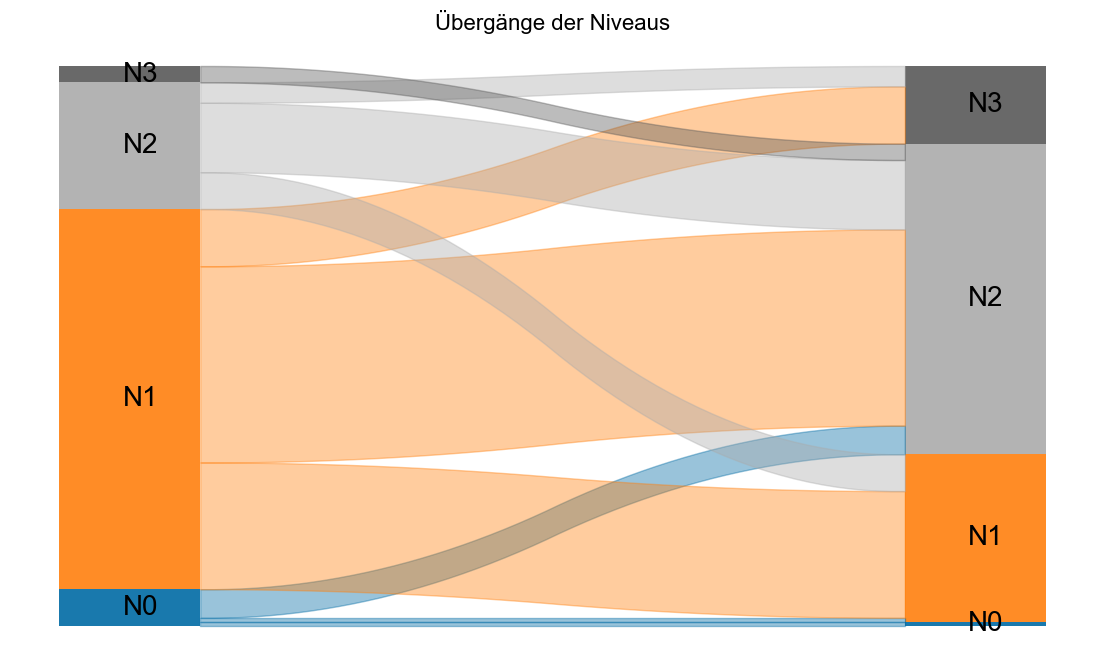

In [9]:
code = "M2"

col1 = code + "Niv_pre"
col2 = code + "Niv_post"
titel_col1 = "pre"
titel_col2 = "post"
kuerzel = code
df_Sankey, N_filtered = make_df_Sankey_from_df_all(col1, col2, df_all)

subset_N3 = df_Sankey[df_Sankey['layer1'].isin(["N3"])]
if len(subset_N3) > 0:
    layer_labels= {"layer1":["N0", "N1", "N2", "N3"],"layer2":["N0", "N1", "N2", "N3"]}
else:
    layer_labels= {"layer1":["N0", "N1", "N2"],"layer2":["N0", "N1", "N2", "N3"]}
print(len(subset_N3))

# Create the Sanky object:
sky = Sankey(df_Sankey, colorMode="global", colorDict=cls_map, stripColor='left', layerLabels = layer_labels)

# plot:
fig,ax = sky.plot(
    figSize=(14,8), ## set the figure size
    fontSize=20,   ## font size
    fontPos=(0.7,0.5), ## font position relative to the box ,0.05: 5% to the right of each box, 0.5: 50% to the bottom of each box
    boxInterv=0,    ## set zero gap between boxes   
    )
#plt.title("Übergänge der Median-Niveaus zum Teil: " + kuerzel, fontsize=16)
plt.title("Übergänge der Niveaus", fontsize=16)

fig.savefig(Ordner_Ziel_Abbildungen + "Sankey_einzeln_" + code + ".pdf",bbox_inches="tight")

### Je ein breites Sankey-Diagramm für eine Oberkategorie (Code), Schleife über alle Codes

1
4
4
4
0
0
0
0
0
0


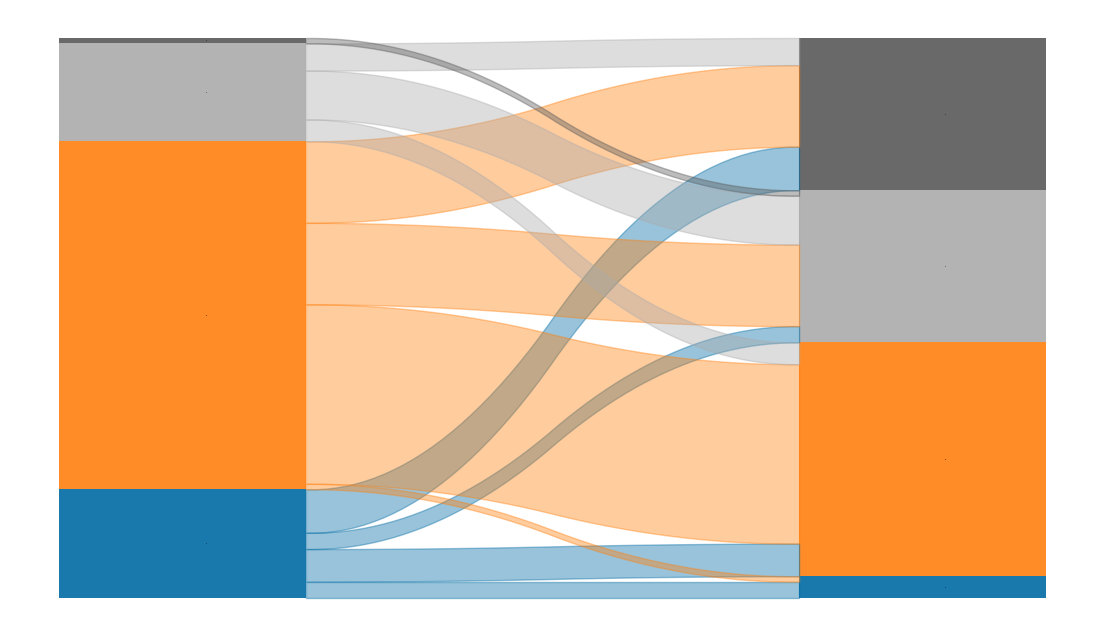

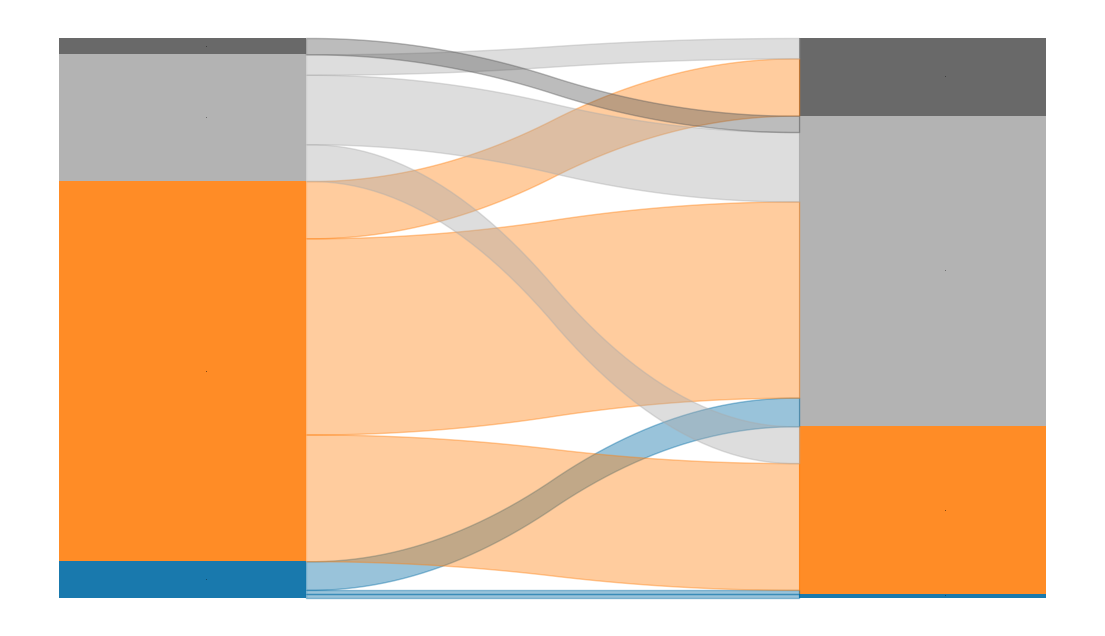

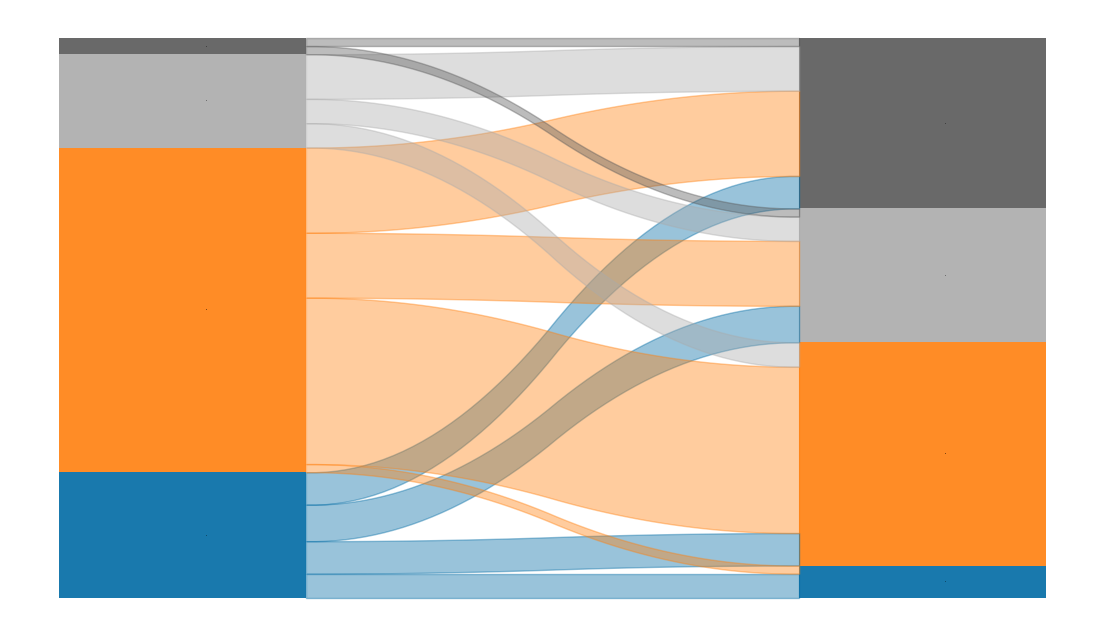

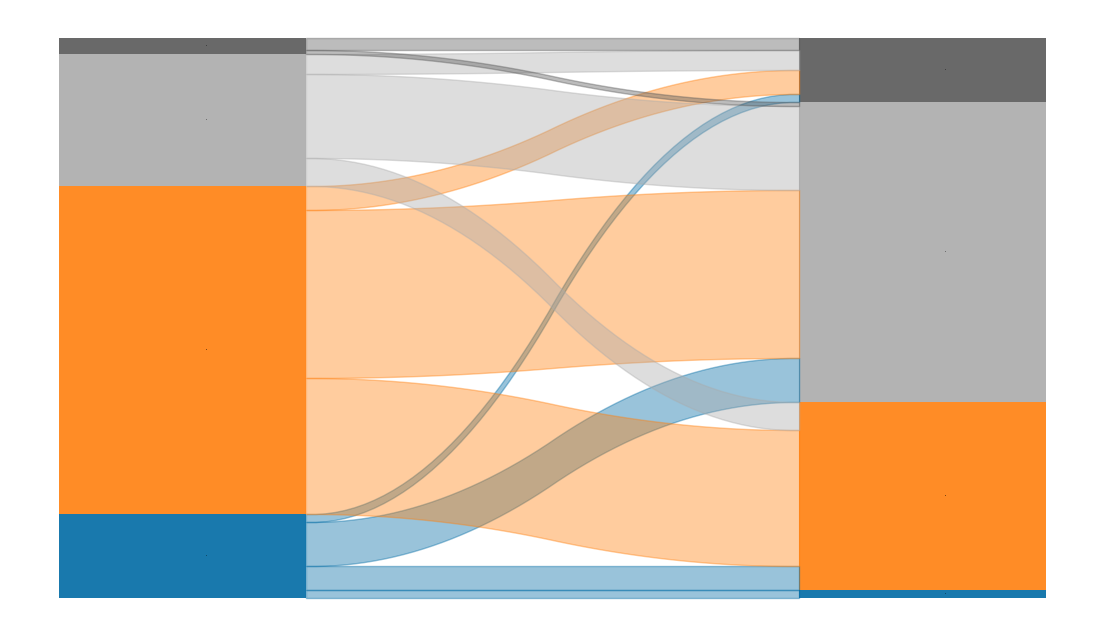

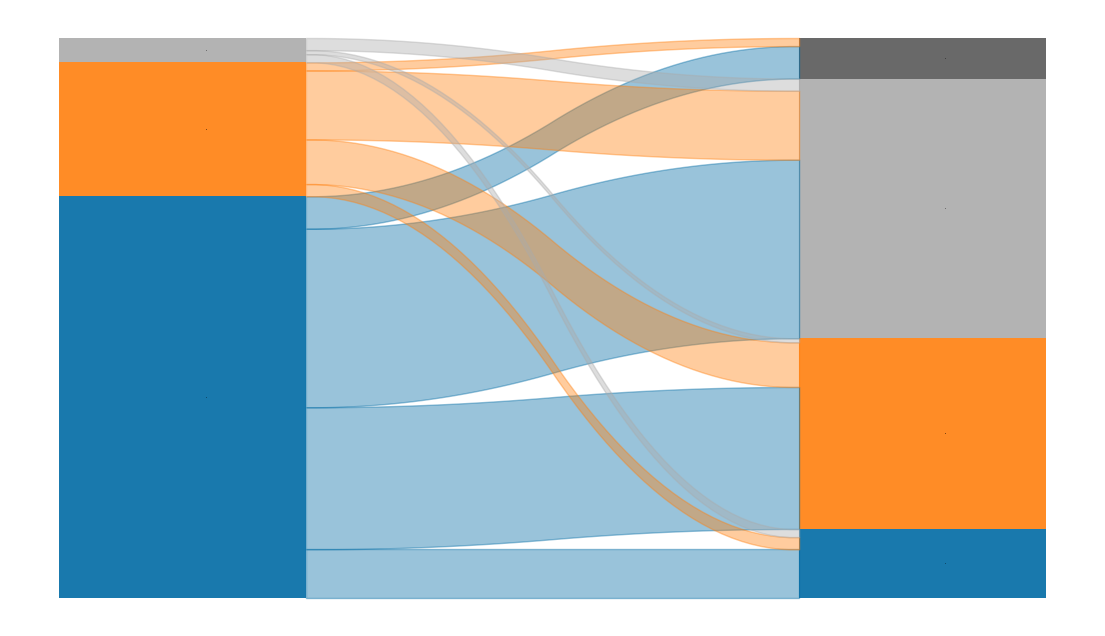

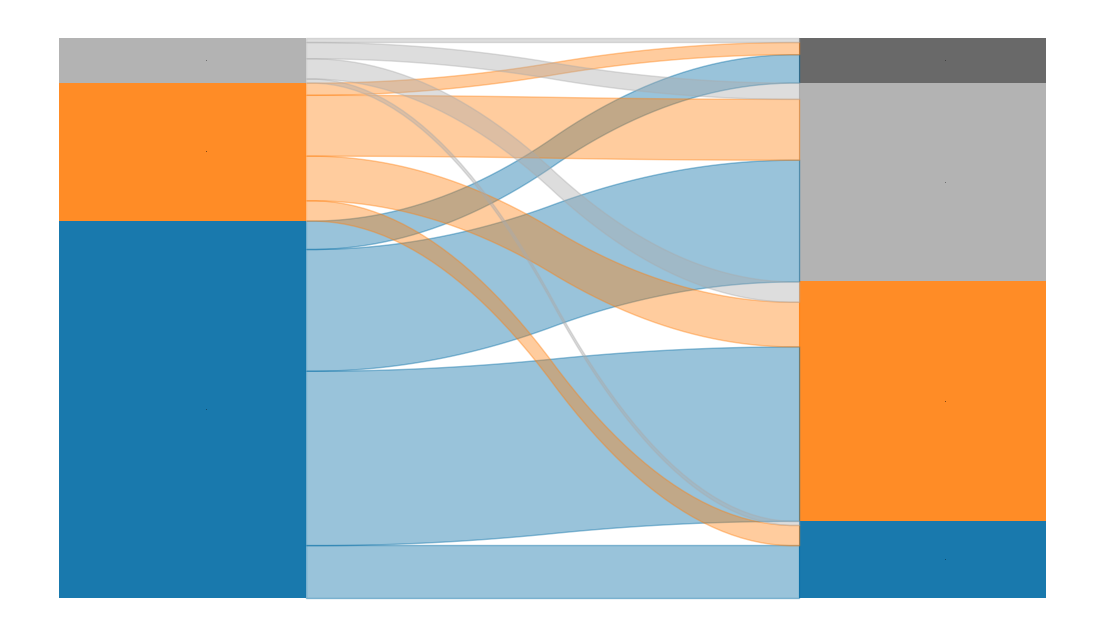

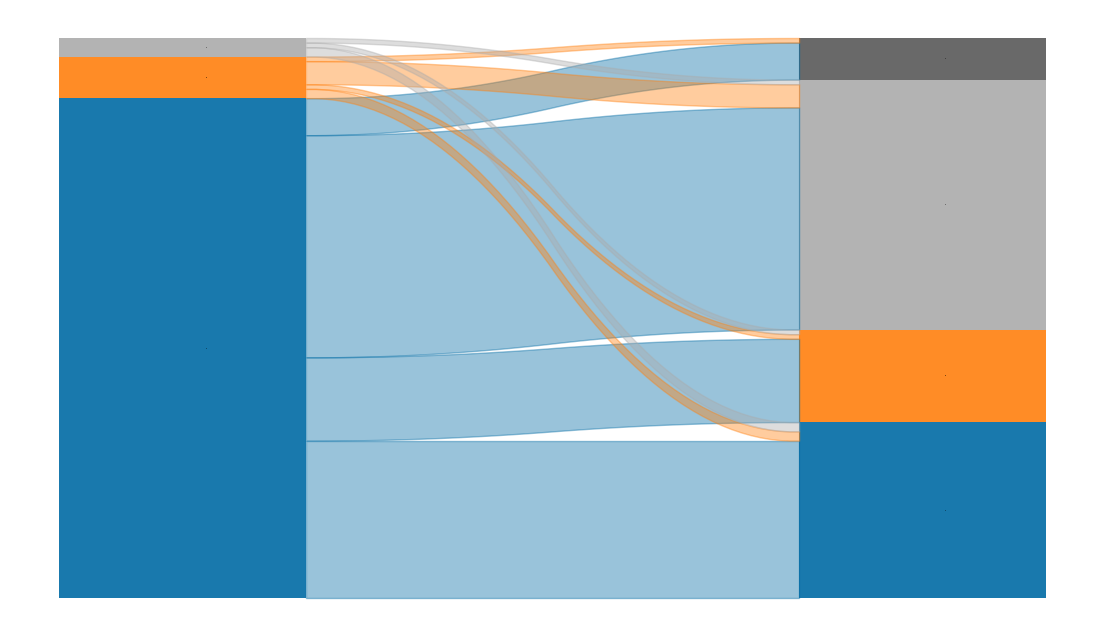

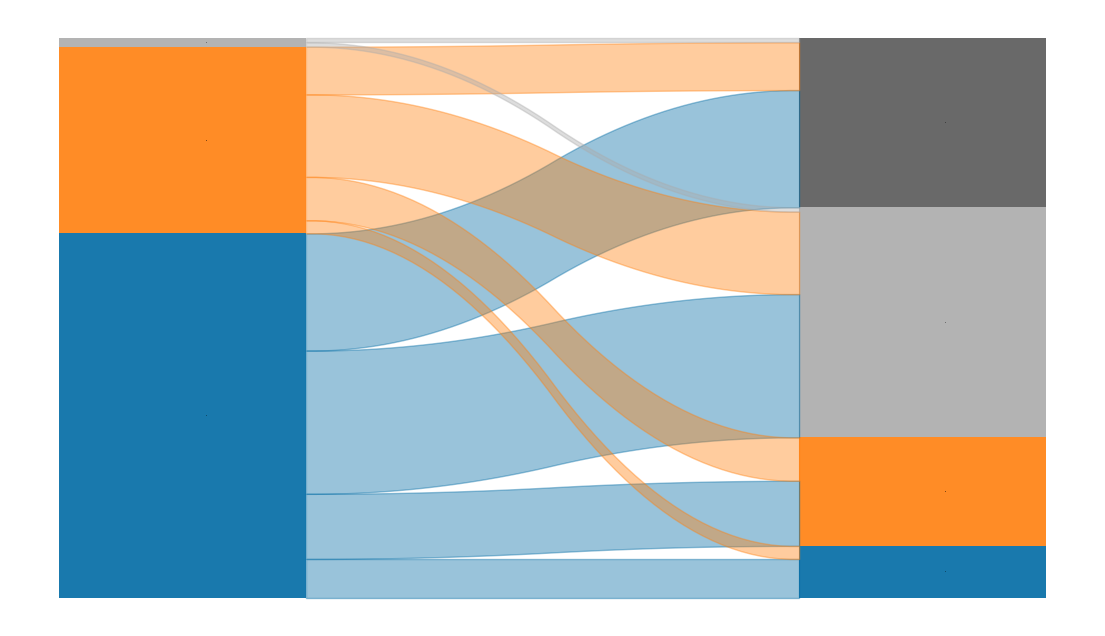

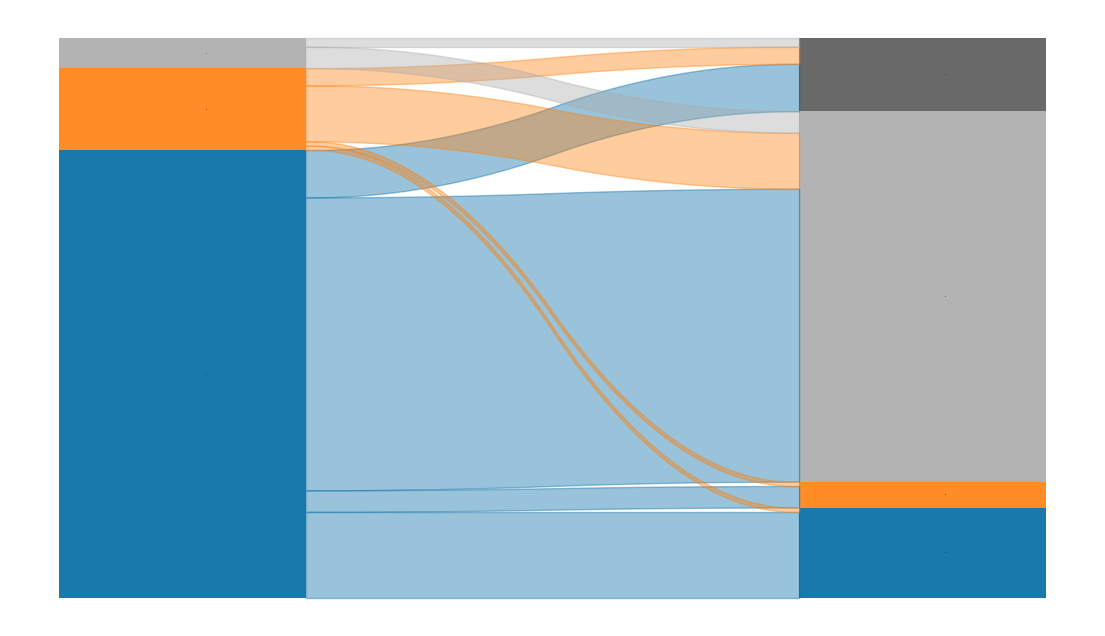

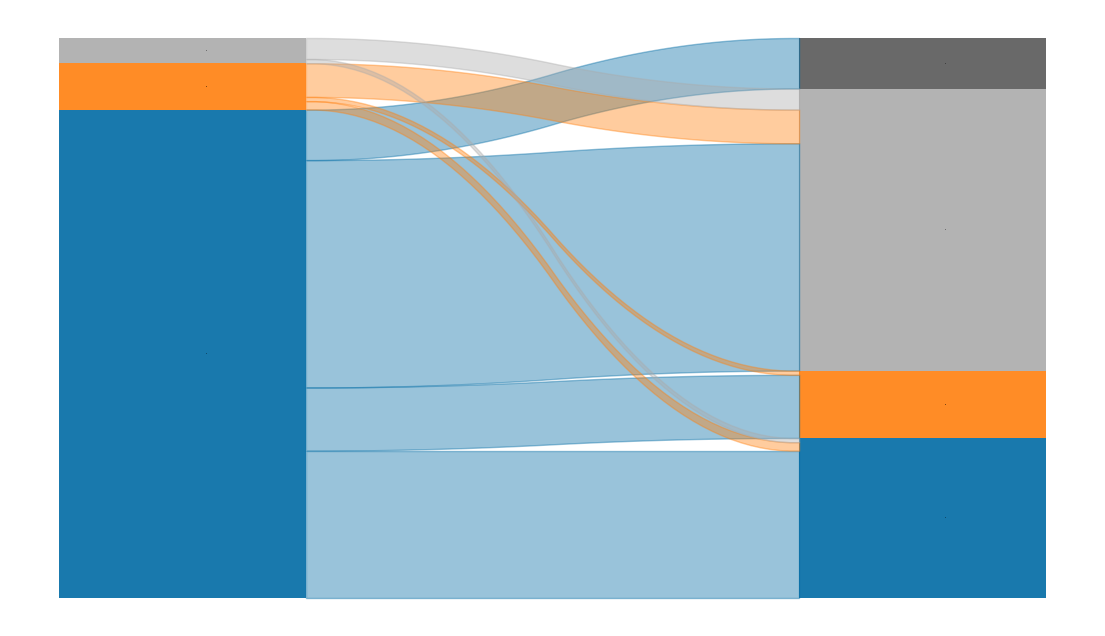

In [132]:
for code in codes:

    col1 = code + "Niv_pre"
    col2 = code + "Niv_post"
    titel_col1 = "pre"
    titel_col2 = "post"
    kuerzel = code
    df_Sankey, N_filtered = make_df_Sankey_from_df_all(col1, col2, df_all)
    
    subset_N3 = df_Sankey[df_Sankey['layer1'].isin(["N3"])]
    if len(subset_N3) > 0:
        layer_labels= {"layer1":["N0", "N1", "N2", "N3"],"layer2":["N0", "N1", "N2", "N3"]}
    else:
        layer_labels= {"layer1":["N0", "N1", "N2"],"layer2":["N0", "N1", "N2", "N3"]}
    print(len(subset_N3))
    
    # Create the Sanky object:
    sky = Sankey(df_Sankey, colorMode="global", colorDict=cls_map, stripColor='left', layerLabels = layer_labels)
    
    # plot:
    fig,ax = sky.plot(
        figSize=(14,8), ## set the figure size
        fontSize=1,   ## font size
        fontPos=(0.6,0.5), ## font position relative to the box ,0.05: 5% to the right of each box, 0.5: 50% to the bottom of each box
        boxInterv=0,    ## set zero gap between boxes 
        boxWidth=5
        )
    #plt.title("Übergänge der Median-Niveaus zum Teil: " + kuerzel, fontsize=16)
    #plt.title("Pre- und Postverteilungen der Niveaustufen in Oberkategorie " + code + " und Übergänge dazwischen", fontsize=17)
    
    fig.savefig(Ordner_Ziel_Abbildungen + "Sankey_einzeln_" + code + ".pdf",bbox_inches="tight")

### Schleife über alle Codes, die zu jedem Code ein *schmales* Sankey-Diagramm erzeugt. 

Von diesen schmalen Sankey-Diagrammen können in Latex dann mehrere nebeneinander gesetzt werden. 

1
4
4
4
0
0
0
0
0
0


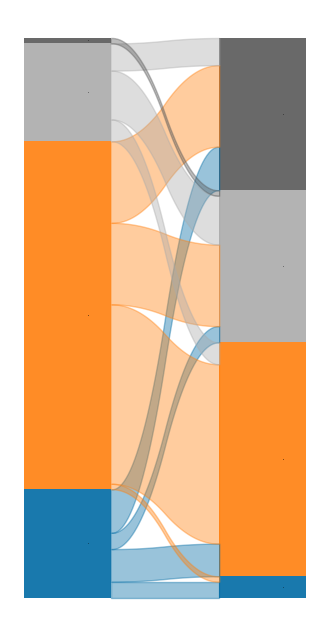

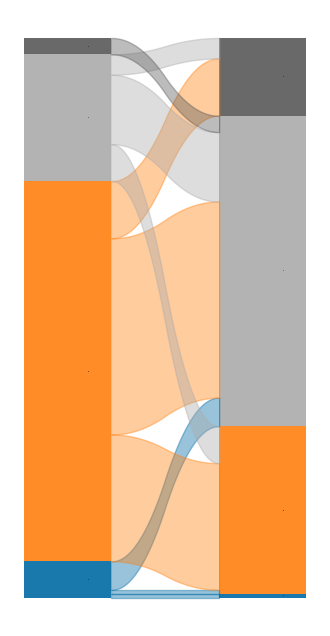

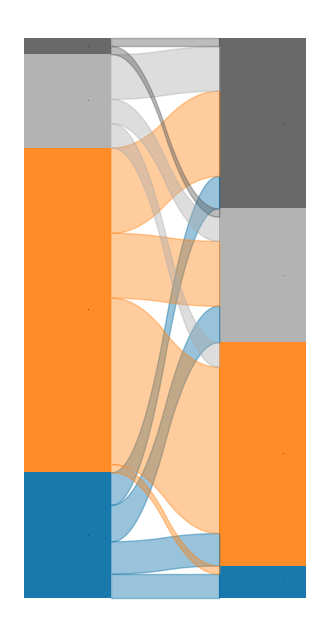

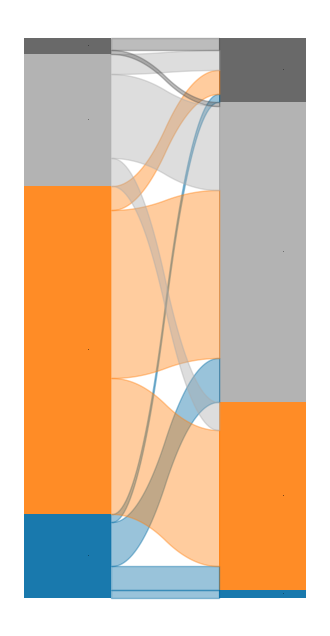

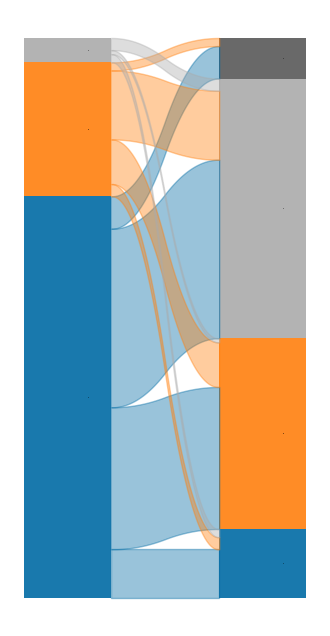

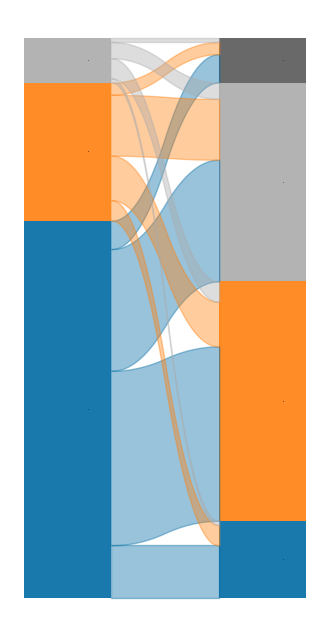

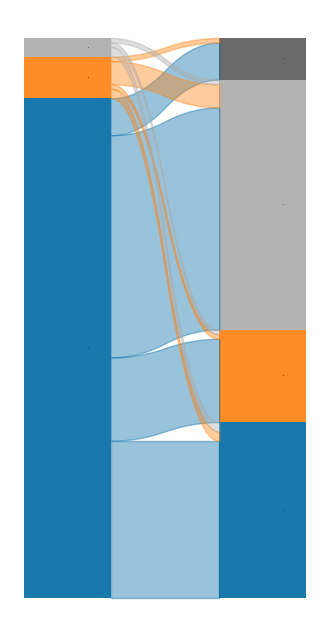

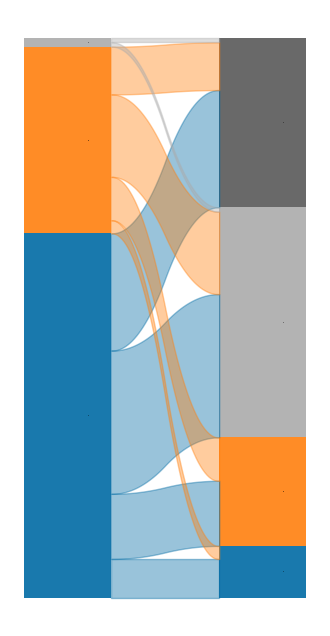

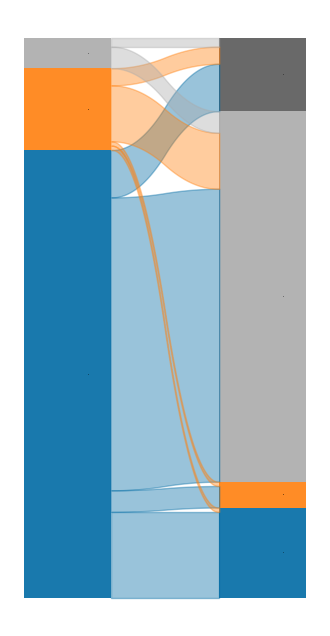

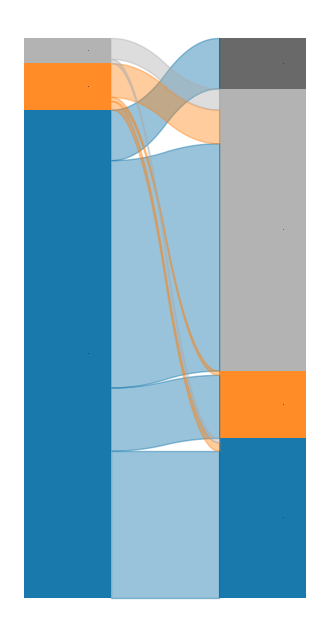

In [11]:
for code in codes:

    col1 = code + "Niv_pre"
    col2 = code + "Niv_post"
    titel_col1 = "pre"
    titel_col2 = "post"
    kuerzel = code
    df_Sankey, N_filtered = make_df_Sankey_from_df_all(col1, col2, df_all)
    
    subset_N3 = df_Sankey[df_Sankey['layer1'].isin(["N3"])]
    if len(subset_N3) > 0:
        layer_labels= {"layer1":["N0", "N1", "N2", "N3"],"layer2":["N0", "N1", "N2", "N3"]}
    else:
        layer_labels= {"layer1":["N0", "N1", "N2"],"layer2":["N0", "N1", "N2", "N3"]}
    print(len(subset_N3))
    
    # Create the Sanky object:
    sky = Sankey(df_Sankey, colorMode="global", colorDict=cls_map, stripColor='left', layerLabels = layer_labels)
    
    # plot:
    fig,ax = sky.plot(
        figSize=(4,8), ## set the figure size
        fontSize=1,   ## font size
        fontPos=(0.75,0.5), ## font position relative to the box ,0.05: 5% to the right of each box, 0.5: 50% to the bottom of each box
        boxInterv=0,    ## set zero gap between boxes
        boxWidth=8
        )
    #plt.title("Übergänge der Median-Niveaus zum Teil: " + kuerzel, fontsize=16)
    #plt.title("Niveaus " + code, fontsize=30)

    # Nun noch die Daten in das dataframe schreiben: 
    row_Sankey = calc_freq_Sankey(df_Sankey)
    df_NivSankey.loc[code] = row_Sankey
    
    fig.savefig(Ordner_Ziel_Abbildungen + "Sankey_einzeln_eng_" + code + ".pdf",bbox_inches="tight")

### Eine Legende erzeugen:

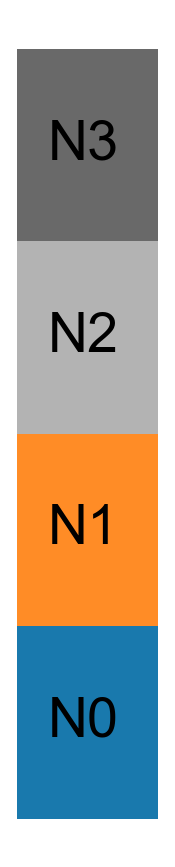

In [98]:
data = {'layer1': ["N0", "N1", "N2", "N3"]}
df_Sankey = pd.DataFrame(data)
layer_labels= {"layer1":["N0", "N1", "N2", "N3"]}

sky = Sankey(df_Sankey, colorMode="global", colorDict=cls_map, stripColor='left', layerLabels = layer_labels)
    
# plot:
fig,ax = sky.plot(
    figSize=(2,11), ## set the figure size
    fontSize=40,   ## font size
    fontPos=(0.72,0.5), ## font position relative to the box ,0.05: 5% to the right of each box, 0.5: 50% to the bottom of each box
    boxInterv=0,    ## set zero gap between boxes
    boxWidth=4
    )
#plt.title("Übergänge der Median-Niveaus zum Teil: " + kuerzel, fontsize=16)
#plt.title("Legende", fontsize=30)

fig.savefig(Ordner_Ziel_Abbildungen + "Legende_Sankey.pdf",bbox_inches="tight")

### Sankey-Diagramme der Cluster M, SPR und ALLE

In [20]:
'M_median_pre', 'M_median_post'
'SPR_median_pre', 'SPR_median_post'
'global_median_pre', 'global_median_post'

('global_median_pre', 'global_median_post')

0
0
0


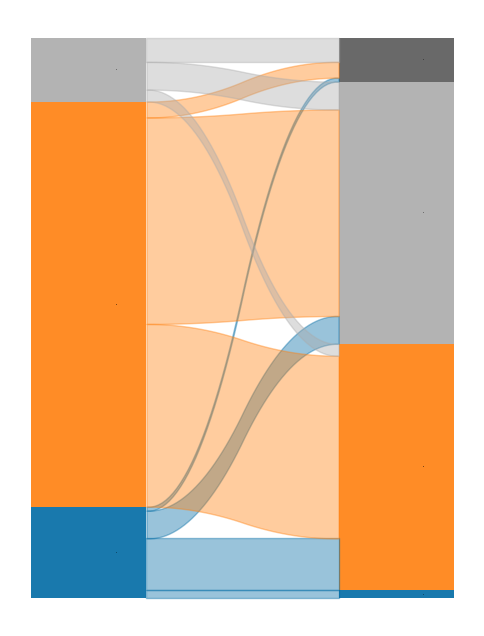

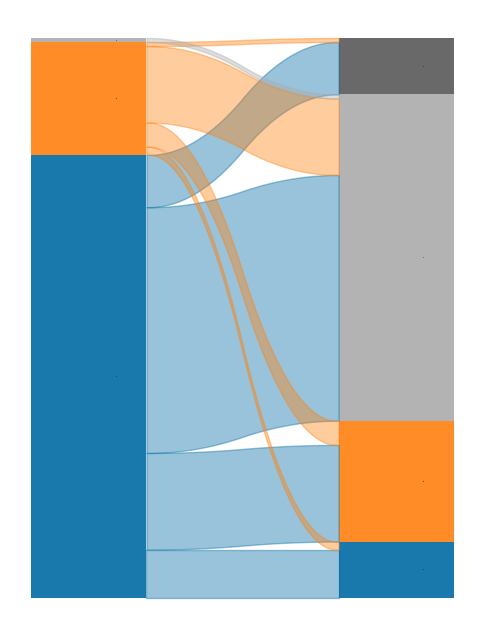

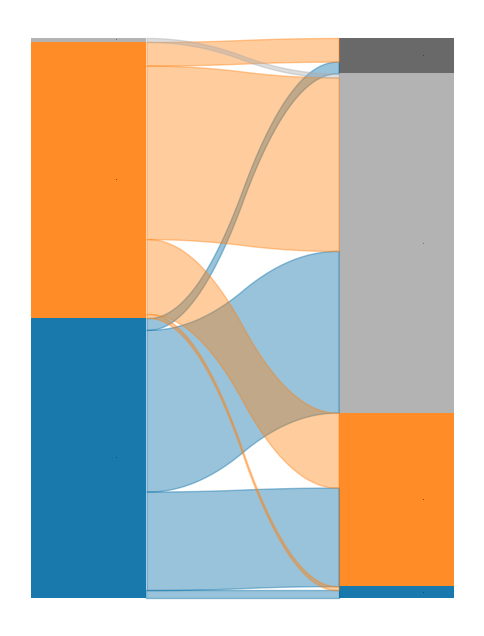

In [32]:
for code in cluster:

    col1 = code + "_median_pre"
    col2 = code + "_median_post"
    titel_col1 = "pre"
    titel_col2 = "post"
    kuerzel = code
    df_Sankey, N_filtered = make_df_Sankey_from_df_all(col1, col2, df_all)
    
    subset_N3 = df_Sankey[df_Sankey['layer1'].isin(["N3"])]
    if len(subset_N3) > 0:
        layer_labels= {"layer1":["N0", "N1", "N2", "N3"],"layer2":["N0", "N1", "N2", "N3"]}
    else:
        layer_labels= {"layer1":["N0", "N1", "N2"],"layer2":["N0", "N1", "N2", "N3"]}
    print(len(subset_N3))
    
    # Create the Sanky object:
    sky = Sankey(df_Sankey, colorMode="global", colorDict=cls_map, stripColor='left', layerLabels = layer_labels)
    
    # plot:
    fig,ax = sky.plot(
        figSize=(6,8), ## set the figure size
        fontSize=1,   ## font size
        fontPos=(0.75,0.5), ## font position relative to the box ,0.05: 5% to the right of each box, 0.5: 50% to the bottom of each box
        boxInterv=0,    ## set zero gap between boxes
        boxWidth=6
        )
    #plt.title("Übergänge der Median-Niveaus zum Teil: " + kuerzel, fontsize=16)
    #plt.title("Cluster " + code, fontsize=30)

    # Nun noch die Daten in das dataframe schreiben: 
    row_Sankey = calc_freq_Sankey(df_Sankey)
    df_NivSankey.loc[code] = row_Sankey
    
    fig.savefig(Ordner_Ziel_Abbildungen + "Sankey_cluster_" + code + ".pdf",bbox_inches="tight")

### Tabelle mit den Zahlenwerten der relativen Häufigkeiten ausgeben

In [16]:
df_NivSankey

,N0pre,N1pre,N2pre,N3pre,N0post,N1post,N2post,N3post,N_filtered


In [51]:
df_NivSankey['N_filtered'] = df_NivSankey['N_filtered'].astype(int)

In [59]:
df_NivSankey.to_excel(Ordner_Ziel_Daten + "/" + "df_NivSankey.xlsx")
df_NivSankey.to_pickle(Ordner_Ziel_Daten + "/" + "df_NivSankey.pkl")
df_NivSankey.to_latex(Ordner_Ziel_Daten + "/" + "df_NivSankey.tex", float_format="%.1f")  # index=False to avoid row numbers

In [ ]:
# write df_stats as tex table:

# Ordner für Ziel erzeugen:
Ordner_out = Ordner_Ziel_Daten
dateiname_latex = "df_stats.tex"
pfad = Ordner_out + "/" + dateiname_latex

# Bezeichnungen der Tabelle: 
my_label = "tab:df_stats"
my_caption = "Kenngrößen der quantitativen Verschiebung: p-Wert nach Wilcoxon, p Bonferroni korrigiert, R nach Spearman, effektiver Stichprobenumfang N der jeweiligen Berechnung. Details s. Text."
my_column_format = "l | l l l l l l l l l l"


# Define a custom format function
def format_sci_notation(value):
    if value < 0.001:
        return "{:.2e}".format(value)
    elif value < 1:
        return "{:.2f}".format(value)
    else:
        return int(value)

# Use to_latex with float_format
latex_str = df_stats.to_latex(float_format=format_sci_notation, label = my_label, position = "ht", caption = my_caption, column_format = my_column_format)

# Print the LaTeX string
print(latex_str)

# save the latex string:

# Open the file in write mode and write the LaTeX string
with open(pfad, 'w', encoding='utf-8') as file:
    file.write(latex_str)

## Konstruktvalidität: Vergleich Interviews - Texte

Hier wird untersucht, ob die Niveauzuordnung zu einer Oberkategorie einer Person auf Basis der Textantworten sich mit der auf Basis der Interviewantworten deckt. 
Hierzu wird (a) Cohens Kappa berechnet und (b) werden die Differenzen in der Niveauzuordnung bestimmt. 
Diese Berechnungen werden in Abschnitt 12.4 meiner Diss dargestellt, wo sie auch genauer beschrieben sind. 

In [19]:
df_stats_all
# hier weitere Daten anhängen! 

,M1,M2,M3,M4,S1,S2,S3,PR1,PR2,PR3
Wilcoxons p,9.545199e-10,1.092888e-11,8.878240e-13,1.479616e-12,3.766598e-18,3.181547e-16,1.399623e-14,9.106257e-20,1.586361e-20,7.001421e-17
Bonferroni p,9.545199e-09,1.092888e-10,8.878240e-12,1.479616e-11,3.766598e-17,3.181547e-15,1.399623e-13,9.106257e-19,1.586361e-19,7.001421e-16
Spearman R,4.345007e-01,4.466585e-01,4.162097e-01,4.141723e-01,6.543051e-01,5.668645e-01,6.082337e-01,7.212660e-01,7.161867e-01,6.202750e-01
N,1.030000e+02,1.370000e+02,1.380000e+02,1.400000e+02,1.380000e+02,1.380000e+02,1.210000e+02,1.290000e+02,1.300000e+02,1.330000e+02


### Cohens Kappa berechnen

In [22]:
# evtl: Ordner_Quelle = Ordner_Ziel_Daten # falls bestehende Daten genutzt werden sollen

# dataframe für die Ergebnisse erzeugen:
df_results_kappa = pd.DataFrame(index=codes, columns=["kappa Kategorien", "kappa Niveaus"])

In [24]:
# Schleife, die alle Codes durchgeht:
for code in codes:
    
    print("*** Code: " + code + " ***")
    ### Einlesen der Kreuztabellen: ###

    if code in codes_M:
        df_Inte = read_prepare_Kreuztabelle(Ordner_Quelle, "Kreuztabelle_InterviewsModelle_" + code + ".xlsx", "post")
        df_Zoho = read_prepare_Kreuztabelle(Ordner_Quelle, "Kreuztabelle_Textezu_InterviewsModelle_" + code + ".xlsx", "post")
    else:
        df_Inte = read_prepare_Kreuztabelle(Ordner_Quelle, "Kreuztabelle_Interviews_" + code + ".xlsx", "post")
        df_Zoho = read_prepare_Kreuztabelle(Ordner_Quelle, "Kreuztabelle_Textezu_Interviews_" + code + ".xlsx", "post")
        
    if not df_Zoho.index.equals(df_Inte.index):
        print("EIN FEHLER!!! DIE PERSONEN SIND NICHT IDENTISCH!!")
    
    # Nun die Antworten aussortierren, die im Text-Fragebogen nicht zuordenbar waren. Leider heißt die Kategorie unterschiedlich:
    try:
        # drop all Persons, who have "nicht zuordenbar" in one of the arrays!
        # Identify rows where 'col' value is 4
        rows_to_drop = df_Inte[df_Inte['nicht zuordenbar (nz, 4)'] == 1].index.tolist() + df_Zoho[df_Zoho['nicht zuordenbar (nz, 4)'] == 1].index.tolist()

        # Drop identified rows in both DataFrames
        df_Inte = df_Inte.drop(rows_to_drop)
        df_Zoho = df_Zoho.drop(rows_to_drop)
    except:
        nonsense = 42
        
    try:
        # drop all Persons, who have "nicht zuordenbar" in one of the arrays!
        # Identify rows where 'col' value is 4
        rows_to_drop = df_Inte[df_Inte['nicht zuordenbar (nz,4)'] == 1].index.tolist() + df_Zoho[df_Zoho['nicht zuordenbar (nz,4)'] == 1].index.tolist()

        # Drop identified rows in both DataFrames
        df_Inte = df_Inte.drop(rows_to_drop)
        df_Zoho = df_Zoho.drop(rows_to_drop)
    except:
        nonsense = 42
        
    try:
        # drop all Persons, who have "nicht zuordenbar" in one of the arrays!
        # Identify rows where 'col' value is 4
        rows_to_drop = df_Inte[df_Inte['keine inhaltliche Vorstellung erschließbar (nz, 4)'] == 1].index.tolist() + df_Zoho[df_Zoho['keine inhaltliche Vorstellung erschließbar (nz, 4)'] == 1].index.tolist()

        # Drop identified rows in both DataFrames
        df_Inte = df_Inte.drop(rows_to_drop)
        df_Zoho = df_Zoho.drop(rows_to_drop)
    except:
        nonsense = 42
        
    
   
    ### Preparation of the dataframes: ###
    
    # index und Diskussion dropen:
    df_Zoho = df_Zoho.drop(columns=["SUMME", "N = Dokumente/Sprecher", " "])
    df_Inte = df_Inte.drop(columns=["SUMME", "N = Dokumente/Sprecher", " "])
    
    try: 
        df_Zoho = df_Zoho.drop(columns=[code])
        df_Inte = df_Inte.drop(columns=[code])
    except: # bei Modellen sind die codes nicht angegeben. 
        nonsense = 42 

    # cast all entries to int:
    df_Zoho = df_Zoho.astype(int)
    df_Inte = df_Inte.astype(int)

    # Replace all numbers larger than 1 with 1
    df_Zoho = df_Zoho.applymap(lambda x: 1 if x > 1 else x)
    df_Inte = df_Inte.applymap(lambda x: 1 if x > 1 else x)
    
    # drop lines, in which there is no "1" in the interview (= question was not asked in the interview, so there is no code corresponding to the question)
    # Identify rows with all zeros in df_Inte
    zero_rows = df_Inte.all(axis=1)

    # Drop rows with all zeros from both dataframes
    df_Zoho = df_Zoho[~zero_rows]
    df_Inte = df_Inte[~zero_rows]
    
    
    
    
    ### Computation of kappa: ###
    kappa_kat, a, b, c, n_codes, P_observed, P_chance = calc_kappa(df_Zoho, df_Inte)
    print(code + ":Kappa berechnet für Kategorien: " + str(kappa_kat))
    print("kappa_kat, a, b, c, n_codes, P_observed, P_chance")
    print(kappa_kat, a, b, c, n_codes, P_observed, P_chance)
    print("")

    # den Wert in die Tabelle schreiben:
    df_results_kappa.at[code, "kappa Kategorien"] = kappa_kat
    
    
    ### Nun die Berechnung der Niveaus ausführen: 
    df_Zoho_kat_niv = niveaus_aus_kategorien(df_Zoho, code, N3_Schwellen)
    df_Inte_kat_niv = niveaus_aus_kategorien(df_Inte, code, N3_Schwellen)
    
    df_Zoho_niv = df_Zoho_kat_niv["Niveau"]
    df_Inte_niv = df_Inte_kat_niv["Niveau"]
    
    ### Die beiden Tabellen speichern:
    df_Zoho_niv.to_pickle(Ordner_Ziel_Daten + "/df_Zoho_niv_" + code + ".pkl")
    df_Inte_niv.to_pickle(Ordner_Ziel_Daten + "/df_Inte_niv_" + code + ".pkl")
    
    
    ### Nun kappa für die Niveaus berechnen: 
    kappa_niv, a, b, c, n_codes, P_observed, P_chance = calc_kappa_niveau(df_Zoho_niv, df_Inte_niv)
    print(code + ":Kappa berechnet für Niveaus: " + str(kappa_niv))
    print("kappa_niv, a, b, c, n_codes, P_observed, P_chance")
    print(kappa_niv, a, b, c, n_codes, P_observed, P_chance)
    print("")

    df_results_kappa.at[code, "kappa Niveaus"] = kappa_niv   

*** Code: M1 ***
M1:Kappa berechnet für Kategorien: 0.7941176470588235
kappa_kat, a, b, c, n_codes, P_observed, P_chance
0.7941176470588235 28 0 6 7 0.8235294117647058 0.14285714285714285

M1:Kappa berechnet für Niveaus: 0.8974358974358975
kappa_niv, a, b, c, n_codes, P_observed, P_chance
0.8974358974358975 24 0 2 4 0.9230769230769231 0.25

*** Code: M2 ***
M2:Kappa berechnet für Kategorien: 0.7228682170542635
kappa_kat, a, b, c, n_codes, P_observed, P_chance
0.7228682170542635 32 5 6 13 0.7441860465116279 0.07692307692307693

M2:Kappa berechnet für Niveaus: 0.9540229885057472
kappa_niv, a, b, c, n_codes, P_observed, P_chance
0.9540229885057472 28 0 1 4 0.9655172413793104 0.25

*** Code: M3 ***
M3:Kappa berechnet für Kategorien: 0.7066666666666666
kappa_kat, a, b, c, n_codes, P_observed, P_chance
0.7066666666666666 22 4 4 11 0.7333333333333333 0.09090909090909091

M3:Kappa berechnet für Niveaus: 0.7948717948717948
kappa_niv, a, b, c, n_codes, P_observed, P_chance
0.7948717948717948 22 

/var/folders/fs/cyks00g55gx2y9wppgsj4rjw0000gn/T/ipykernel_1509/1873224840.py:70: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_Zoho = df_Zoho.applymap(lambda x: 1 if x > 1 else x)
/var/folders/fs/cyks00g55gx2y9wppgsj4rjw0000gn/T/ipykernel_1509/1873224840.py:71: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_Inte = df_Inte.applymap(lambda x: 1 if x > 1 else x)
/var/folders/fs/cyks00g55gx2y9wppgsj4rjw0000gn/T/ipykernel_1509/1873224840.py:70: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_Zoho = df_Zoho.applymap(lambda x: 1 if x > 1 else x)
/var/folders/fs/cyks00g55gx2y9wppgsj4rjw0000gn/T/ipykernel_1509/1873224840.py:71: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_Inte = df_Inte.applymap(lambda x: 1 if x > 1 else x)
/var/folders/fs/cyks00g55gx2y9wppgsj4rjw0000gn/T/ipykernel_1509/1873224840.py:70: FutureWarning: DataFrame.apply

In [26]:
df_results_kappa

,kappa Kategorien,kappa Niveaus
M1,0.794118,0.897436
M2,0.722868,0.954023
M3,0.706667,0.794872
M4,0.808429,0.954023
S1,0.805556,0.866667
S2,0.578704,0.936508
S3,0.62963,0.878788
PR1,0.567901,0.809524
PR2,0.680645,0.942029
PR3,0.333333,0.466667


In [28]:
df_stats_all

,M1,M2,M3,M4,S1,S2,S3,PR1,PR2,PR3
Wilcoxons p,9.545199e-10,1.092888e-11,8.878240e-13,1.479616e-12,3.766598e-18,3.181547e-16,1.399623e-14,9.106257e-20,1.586361e-20,7.001421e-17
Bonferroni p,9.545199e-09,1.092888e-10,8.878240e-12,1.479616e-11,3.766598e-17,3.181547e-15,1.399623e-13,9.106257e-19,1.586361e-19,7.001421e-16
Spearman R,4.345007e-01,4.466585e-01,4.162097e-01,4.141723e-01,6.543051e-01,5.668645e-01,6.082337e-01,7.212660e-01,7.161867e-01,6.202750e-01
N,1.030000e+02,1.370000e+02,1.380000e+02,1.400000e+02,1.380000e+02,1.380000e+02,1.210000e+02,1.290000e+02,1.300000e+02,1.330000e+02


### Kappa der Niveaus im Vergleich Text-Interview zu df_stats_all zusammenfügen
Hierbei auch die Werte der ICR hinzufügen

In [31]:
# Für stats_all Noch die Werte der ICR Greta und Jan hinzufügen:
ICR_values = [0.90, 0.91, 0.79, 0.80, 0.88, 0.88, 0.80, 0.80, 0.87, 0.89]
df_results_kappa["ICR"] = ICR_values
#df_results_kappa = df_results_kappa[["ICR", "kappa Kategorien", "kappa Niveaus"]]
#df_results_kappa = df_results_kappa.rename(columns={'ICR': '$\kappa$ ICR'})
#df_results_kappa = df_results_kappa.rename(columns={'kappa Kategorien': '$\kappa$ Kategorien'})
#df_results_kappa = df_results_kappa.rename(columns={'kappa Niveaus': '$\kappa$ Niveaus'})


# Transpose df_results_kappa (invert rows and columns)
df_results_kappa_transposed = df_results_kappa.T

# Append the transposed DataFrame to df_stats_all
df_stats_all = pd.concat([df_stats_all, df_results_kappa_transposed])

# Merke: Formatierung erst ganz am Ende!! Dann transponieren, um spaltenweise zu formatieren. Dann rücktransponieren. Und alles und einzelne Zeilen exportieren. 

In [33]:
df_stats_all

,M1,M2,M3,M4,S1,S2,S3,PR1,PR2,PR3
Wilcoxons p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bonferroni p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Spearman R,0.434501,0.446659,0.41621,0.414172,0.654305,0.566864,0.608234,0.721266,0.716187,0.620275
N,103.0,137.0,138.0,140.0,138.0,138.0,121.0,129.0,130.0,133.0
kappa Kategorien,0.794118,0.722868,0.706667,0.808429,0.805556,0.578704,0.62963,0.567901,0.680645,0.333333
kappa Niveaus,0.897436,0.954023,0.794872,0.954023,0.866667,0.936508,0.878788,0.809524,0.942029,0.466667
ICR,0.9,0.91,0.79,0.8,0.88,0.88,0.8,0.8,0.87,0.89


### Nun die Abweichungen als Differenzwerte bestimmen

In [36]:
# Ein df anlegen, in dem später die Werte des histograms gespeichert werden (codes = columns):
df_hist = pd.DataFrame()
df_hist.index = [-2, -1, 0, 1, 2]

df_hist_abs = pd.DataFrame()
df_hist_abs.index = [-2, -1, 0, 1, 2]

# Sowie eins, in dem N, mean, std gespeichert werden: 
df_NMeanStd = pd.DataFrame()
df_NMeanStd.index = ["N_Int", "mean", "std"]

In [38]:
all_values = []

for code in codes:
    df_Zoho_niv = pd.read_pickle(Ordner_Ziel_Daten + "/df_Zoho_niv_" + code + ".pkl")
    df_Inte_niv = pd.read_pickle(Ordner_Ziel_Daten + "/df_Inte_niv_" + code + ".pkl")
    
    df_niv_Text_Inte = pd.DataFrame()
    df_niv_Text_Inte["Text"] = df_Zoho_niv
    df_niv_Text_Inte["Inte"] = df_Inte_niv
    df_niv_Text_Inte.index = df_Zoho_niv.index
    
    # Differenz bilden:
    df_niv_Text_Inte["Diff"] = df_niv_Text_Inte["Text"] - df_niv_Text_Inte["Inte"]
    
    # Werte berechnen
    values = df_niv_Text_Inte["Diff"].values
    hist = np.histogram(values, bins=[-2.5, -1.5, -0.5, 0.5, 1.5, 2.5])[0]
    N = len(values)
    df_hist[code] = hist / N
    df_hist_abs[code] = hist
    
    #df_NMeanStd[code] = [int(N), np.mean(values), np.mean(np.abs(values)), np.std(values)]
    df_NMeanStd[code] = [int(N), np.mean(values), np.std(values)]
    
    if code != "PR3":
        all_values = np.concatenate([all_values, values])
    else:
        print("PR3 von globalen Kenngrößen ausgeschlossen.")

# hierunter könnte man noch die Zelle "Nun noch das ganze global ohne PR3 berechnen:" anschließen

PR3 von globalen Kenngrößen ausgeschlossen.


In [40]:
df_NMeanStd

,M1,M2,M3,M4,S1,S2,S3,PR1,PR2,PR3
N_Int,14.000000,15.000000,15.000000,15.000000,11.000000,11.000000,6.000000,12.000000,12.000000,7.000000
mean,-0.214286,-0.066667,-0.133333,0.133333,-0.181818,0.090909,-0.333333,-0.083333,-0.166667,-0.571429
std,0.557875,0.249444,0.498888,0.498888,0.385695,0.287480,0.745356,0.493007,0.552771,0.494872


In [42]:
# nun df_NMeanStd zu df_stats_all hinzufügen: 
# Append the transposed DataFrame to df_stats_all
df_stats_all = pd.concat([df_stats_all,df_NMeanStd])

In [44]:
df_stats_all

,M1,M2,M3,M4,S1,S2,S3,PR1,PR2,PR3
Wilcoxons p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bonferroni p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Spearman R,0.434501,0.446659,0.41621,0.414172,0.654305,0.566864,0.608234,0.721266,0.716187,0.620275
N,103.0,137.0,138.0,140.0,138.0,138.0,121.0,129.0,130.0,133.0
kappa Kategorien,0.794118,0.722868,0.706667,0.808429,0.805556,0.578704,0.62963,0.567901,0.680645,0.333333
kappa Niveaus,0.897436,0.954023,0.794872,0.954023,0.866667,0.936508,0.878788,0.809524,0.942029,0.466667
ICR,0.9,0.91,0.79,0.8,0.88,0.88,0.8,0.8,0.87,0.89
N_Int,14.0,15.0,15.0,15.0,11.0,11.0,6.0,12.0,12.0,7.0
mean,-0.214286,-0.066667,-0.133333,0.133333,-0.181818,0.090909,-0.333333,-0.083333,-0.166667,-0.571429
std,0.557875,0.249444,0.498888,0.498888,0.385695,0.28748,0.745356,0.493007,0.552771,0.494872


In [46]:
# Ausgabe als Latex-Code

df = df_hist
df_style = df.style.format(precision = 2)
latex_str = df_style.to_latex(label = "tab:df_hist", position = "ht", caption = "Verteilung der Abweichungen Text - Interview", column_format = "r|rrrrrrrrrr")
print(latex_str)

\begin{table}[ht]
\caption{Verteilung der Abweichungen Text - Interview}
\label{tab:df_hist}
\begin{tabular}{r|rrrrrrrrrr}
 & M1 & M2 & M3 & M4 & S1 & S2 & S3 & PR1 & PR2 & PR3 \\
-2 & 0.07 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.17 & 0.00 & 0.08 & 0.00 \\
-1 & 0.07 & 0.07 & 0.20 & 0.00 & 0.18 & 0.00 & 0.00 & 0.17 & 0.00 & 0.57 \\
0 & 0.86 & 0.93 & 0.73 & 0.93 & 0.82 & 0.91 & 0.83 & 0.75 & 0.92 & 0.43 \\
1 & 0.00 & 0.00 & 0.07 & 0.00 & 0.00 & 0.09 & 0.00 & 0.08 & 0.00 & 0.00 \\
2 & 0.00 & 0.00 & 0.00 & 0.07 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
\end{tabular}
\end{table}



In [48]:
df_hist

,M1,M2,M3,M4,S1,S2,S3,PR1,PR2,PR3
-2,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.083333,0.000000
-1,0.071429,0.066667,0.200000,0.000000,0.181818,0.000000,0.000000,0.166667,0.000000,0.571429
0,0.857143,0.933333,0.733333,0.933333,0.818182,0.909091,0.833333,0.750000,0.916667,0.428571
1,0.000000,0.000000,0.066667,0.000000,0.000000,0.090909,0.000000,0.083333,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Die Abweichungen als Histogramm plotten

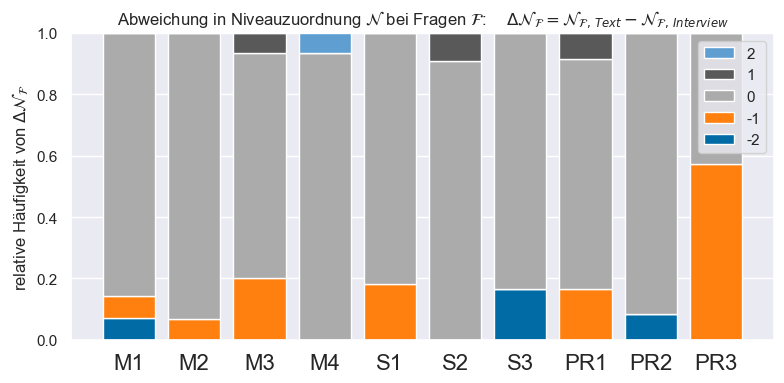

In [52]:
##### ##### ##### ##### ##### ##### ##### ##### ##### 
##### ##### #####   jetzt plotten   ##### ##### ##### 
##### ##### ##### ##### ##### ##### ##### ##### ##### 

df_print = df_hist.T

sns.set(style="darkgrid")

# Create the stacked bar chart using Matplotlib
plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(figsize=(8,4))

bar_width = .8
bar_positions = np.arange(10)

ax.bar(bar_positions, df_print[-2], width=bar_width, label='-2', align='center')
ax.bar(bar_positions, df_print[-1], width=bar_width, label='-1', align='center', bottom=df_print[-2])
ax.bar(bar_positions, df_print[0], width=bar_width, label='0', align='center', bottom=df_print[-2]+df_print[-1])
ax.bar(bar_positions, df_print[1], width=bar_width, label='1', align='center', bottom=df_print[-2]+df_print[-1]+df_print[0])
ax.bar(bar_positions, df_print[2], width=bar_width, label='2', align='center', bottom=df_print[-2]+df_print[-1]+df_print[0]+df_print[1])

#plt.xlabel('Pre-Post-Verteilungen der Subkategoriensysteme')
schriftgroesse =  12

plt.ylabel('relative Häufigkeit von $\Delta \mathcal{N}_\mathcal{F}$', fontsize = schriftgroesse)
#plt.title('Titel')#Abweichung in Niveauzuordnung: $\Delta \mathcal{N_F} = \mathcal{N}_{\mathcal{F},\, Text} - \mathcal{N}_{\mathcal{F}, Interview}$', fontsize = schriftgroesse)
plt.title('Abweichung in Niveauzuordnung $\mathcal{N}$ bei Fragen $\mathcal{F}$: $\quad \Delta \mathcal{N}_\mathcal{F} = \mathcal{N}_{\mathcal{F},\, Text} - \mathcal{N}_{\mathcal{F},\, Interview}$')#\mathcal{N}_{\mathcal{F}, Text} - \mathcal{N}_{\mathcal{F}, Interview}$', fontsize = schriftgroesse)

plt.xticks(bar_positions, codes, fontsize = 16)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper right')
fig.tight_layout()

plt.savefig(Ordner_Ziel_Abbildungen + "/Abweichungen_TexteInterviews.pdf")
plt.savefig(Ordner_Ziel_Abbildungen + "/Abweichungen_TexteInterviews.png")
plt.show()

### Nun df_stats_all speichern und als Gesamttabelle und Auszüge als Latextabelle speichern

In [22]:
df_stats_all

,M1,M2,M3,M4,S1,S2,S3,PR1,PR2,PR3
Wilcoxons p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bonferroni p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Spearman R,0.434501,0.446659,0.41621,0.414172,0.654305,0.566864,0.608234,0.721266,0.716187,0.620275
N,103.0,137.0,138.0,140.0,138.0,138.0,121.0,129.0,130.0,133.0
kappa Kategorien,0.794118,0.722868,0.706667,0.808429,0.805556,0.578704,0.62963,0.567901,0.680645,0.333333
kappa Niveaus,0.897436,0.954023,0.794872,0.954023,0.866667,0.936508,0.878788,0.809524,0.942029,0.466667
ICR,0.9,0.91,0.79,0.8,0.88,0.88,0.8,0.8,0.87,0.89
N_Int,14.0,15.0,15.0,15.0,11.0,11.0,6.0,12.0,12.0,7.0
mean,-0.214286,-0.066667,-0.133333,0.133333,-0.181818,0.090909,-0.333333,-0.083333,-0.166667,-0.571429
std,0.557875,0.249444,0.498888,0.498888,0.385695,0.28748,0.745356,0.493007,0.552771,0.494872


In [24]:
# speichern der statistischen Werte:
styled_df.to_excel(Ordner_Ziel_Daten + "/df_stats_all_transp_styled.xlsx", index=False)
df_stats_all.to_pickle(Ordner_Ziel_Daten + "/df_stats_all.pkl")

## Einlesen der statistischen Werte ohne neue Berechnung und dann Styling für Diss

In [8]:
def style_df_stats_all(df_stats_all):

    # Transponieren, weil pandas spaltenweise "denkt":
    df_stats_all_transp = df_stats_all.T

    # Reihenfolge anpassen: 
    df_stats_all_transp = df_stats_all_transp[["N", "N_Int", "ICR", "kappa Kategorien", "kappa Niveaus", "mean", "std", "Wilcoxons p", "Bonferroni p", "Spearman R"]]
    
    # N als int:
    df_stats_all_transp['N'] = df_stats_all_transp['N'].astype(int)
    df_stats_all_transp['N_Int'] = df_stats_all_transp['N_Int'].astype(int)

    # Format anpassen:
    styled_df = df_stats_all_transp.style.format({
        'ICR': '{:.2f}',
        'kappa Kategorien': '{:.2f}',  # Format column 'x' to 2 decimal places
        'kappa Niveaus': '{:.2f}',  # Format column 'x' to 2 decimal places
        'mean': '{:.2f}',  # Format column 'x' to 2 decimal places
        'std': '{:.2f}',  # Format column 'x' to 2 decimal places
        'Wilcoxons p': '{:.1e}',
        'Bonferroni p': '{:.1e}',
        'Spearman R': '{:.2f}'
    })
    
    return styled_df


In [27]:
df_stats_all = pd.read_pickle(Ordner_Ziel_Daten + "/df_stats_all.pkl")

In [29]:
df_stats_all

,M1,M2,M3,M4,S1,S2,S3,PR1,PR2,PR3
Wilcoxons p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bonferroni p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Spearman R,0.434501,0.446659,0.41621,0.414172,0.654305,0.566864,0.608234,0.721266,0.716187,0.620275
N,103.0,137.0,138.0,140.0,138.0,138.0,121.0,129.0,130.0,133.0
kappa Kategorien,0.794118,0.722868,0.706667,0.808429,0.805556,0.578704,0.62963,0.567901,0.680645,0.333333
kappa Niveaus,0.897436,0.954023,0.794872,0.954023,0.866667,0.936508,0.878788,0.809524,0.942029,0.466667
ICR,0.9,0.91,0.79,0.8,0.88,0.88,0.8,0.8,0.87,0.89
N_Int,14.0,15.0,15.0,15.0,11.0,11.0,6.0,12.0,12.0,7.0
mean,-0.214286,-0.066667,-0.133333,0.133333,-0.181818,0.090909,-0.333333,-0.083333,-0.166667,-0.571429
std,0.557875,0.249444,0.498888,0.498888,0.385695,0.28748,0.745356,0.493007,0.552771,0.494872


In [37]:
df_stats_all.T["Wilcoxons p"].values

array([9.545199026664249e-10, 1.0928875277073537e-11,
       8.878240090512064e-13, 1.4796155317984354e-12,
       3.766598042955496e-18, 3.1815474772947114e-16,
       1.399623455418817e-14, 9.106257171882788e-20,
       1.5863610064036628e-20, 7.0014206271517e-17], dtype=object)

In [31]:
styled_df = style_df_stats_all(df_stats_all)

In [33]:
styled_df

,N,N_Int,ICR,kappa Kategorien,kappa Niveaus,mean,std,Wilcoxons p,Bonferroni p,Spearman R
M1,103,14,0.90,0.79,0.90,-0.21,0.56,9.5e-10,9.5e-09,0.43
M2,137,15,0.91,0.72,0.95,-0.07,0.25,1.1e-11,1.1e-10,0.45
M3,138,15,0.79,0.71,0.79,-0.13,0.50,8.9e-13,8.9e-12,0.42
M4,140,15,0.80,0.81,0.95,0.13,0.50,1.5e-12,1.5e-11,0.41
S1,138,11,0.88,0.81,0.87,-0.18,0.39,3.8e-18,3.8e-17,0.65
S2,138,11,0.88,0.58,0.94,0.09,0.29,3.2e-16,3.2e-15,0.57
S3,121,6,0.80,0.63,0.88,-0.33,0.75,1.4e-14,1.4e-13,0.61
PR1,129,12,0.80,0.57,0.81,-0.08,0.49,9.1e-20,9.1e-19,0.72
PR2,130,12,0.87,0.68,0.94,-0.17,0.55,1.6e-20,1.6e-19,0.72
PR3,133,7,0.89,0.33,0.47,-0.57,0.49,7.0e-17,7.0e-16,0.62


In [20]:
# Ausgabe als Latex- und Excel-Tabelle:
styled_df.to_excel(Ordner_Ziel_Daten + "/df_stats_all_transp_styled.xlsx", index=False)
styled_df.to_latex(Ordner_Ziel_Daten + "/df_stats_all_transp.tex")

## Effektstäre revisitend

In diesem Abschnitt wird nochmal neu die Effektstärke berechnet. Und zwar auf vier Arten: 
- über Cohens d als Vergleich (auch wenn die Niveaus hierzu als intervallskaliert und normalverteilt angenommen werden müssen, was hypothetisch ist) --> wird in Diss deshalb doch nicht genutzt
- über Spearmans r zwischen den Größen Niveaus und Testzeitpunkt - also im Longformat
- über Kendalls tau
- über mein Maß Z des Zuwachses

Die Funktionen, die in der Schleife aufgerufen werden, sind in meiner Bibliothek definiert. 

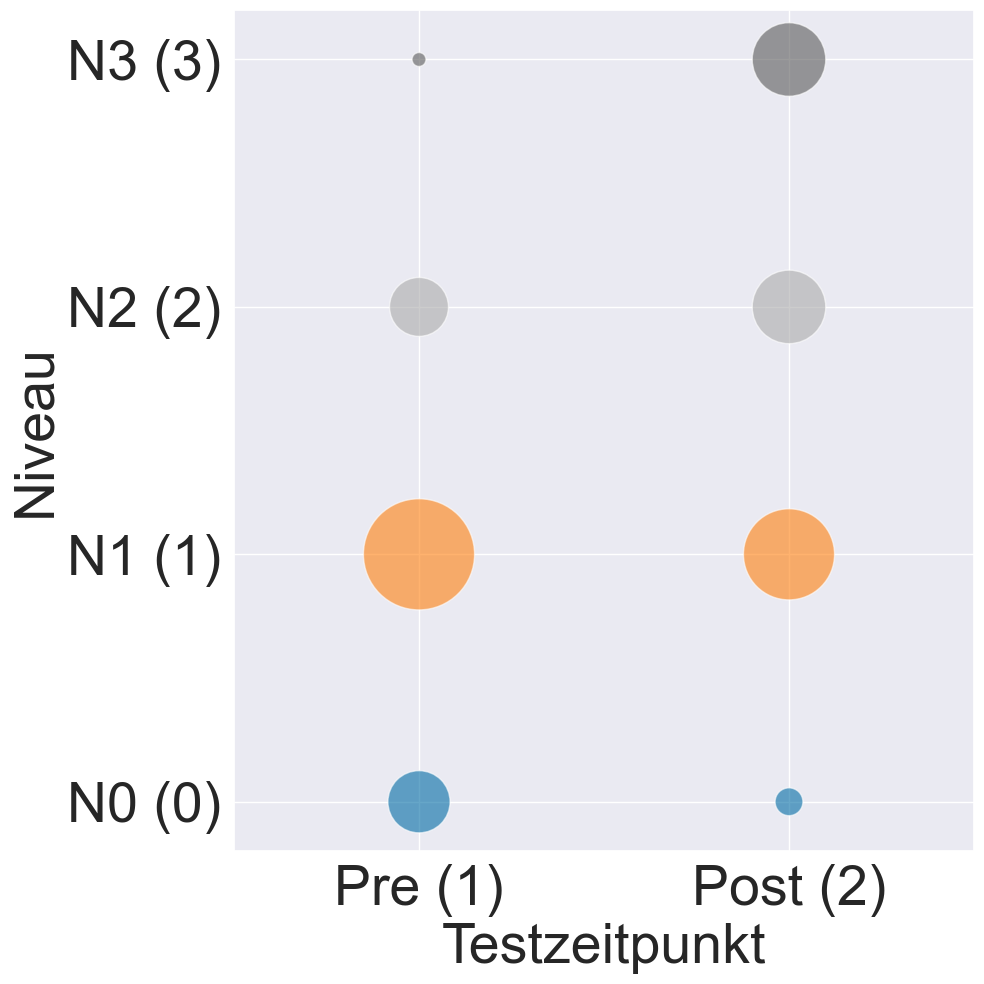

Korrelationsplot zu M1 gespeichert.


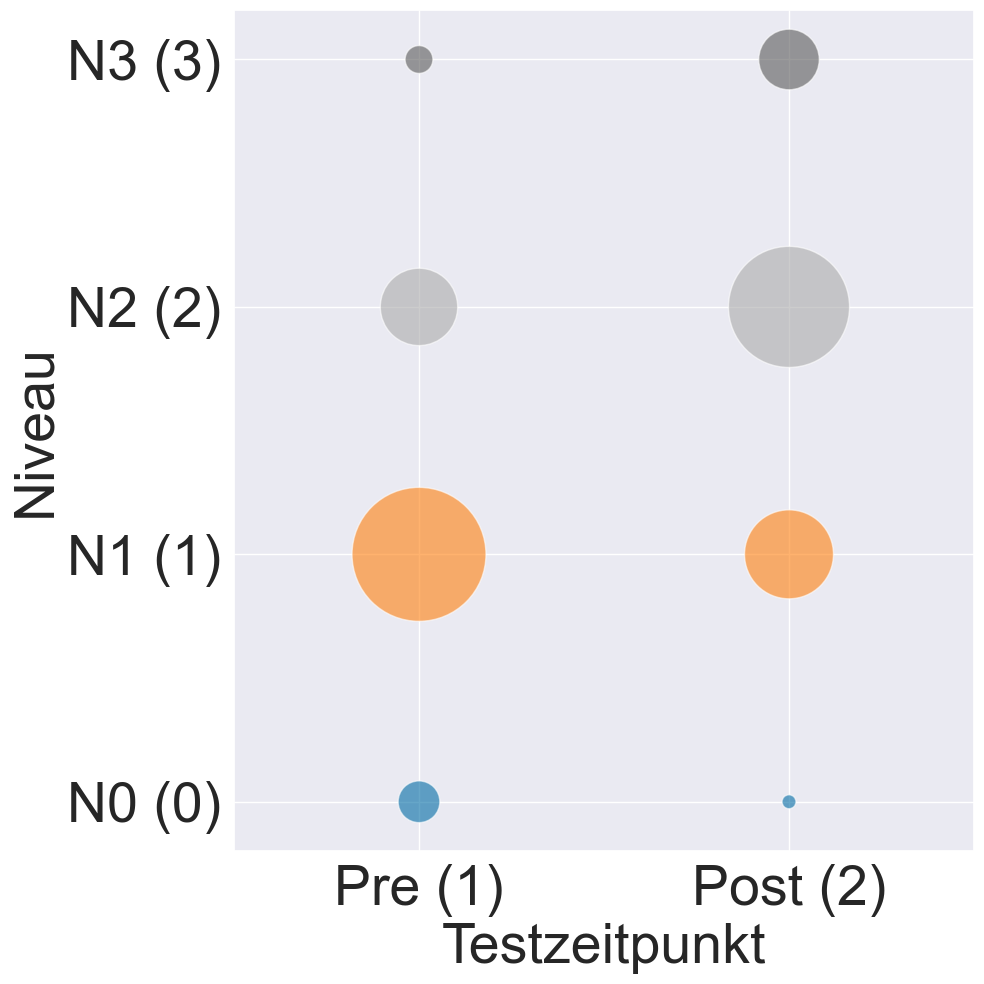

Korrelationsplot zu M2 gespeichert.


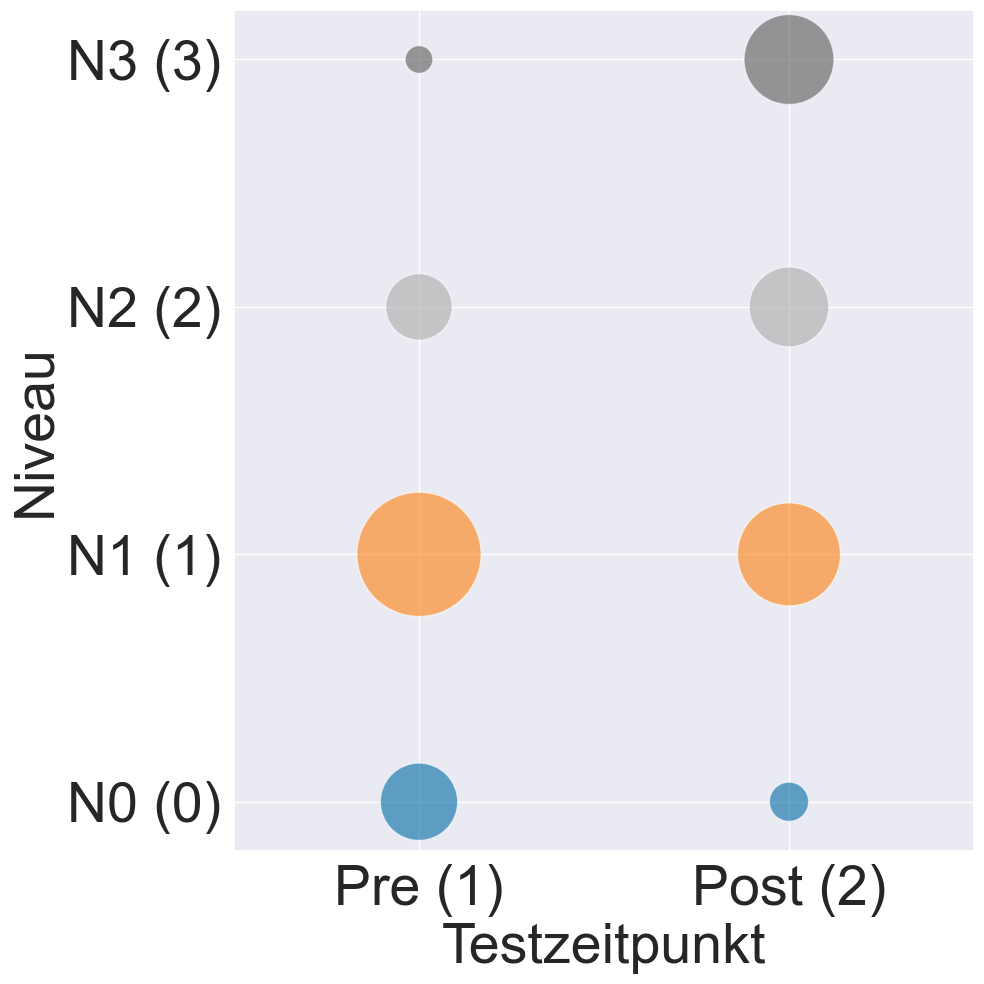

Korrelationsplot zu M3 gespeichert.


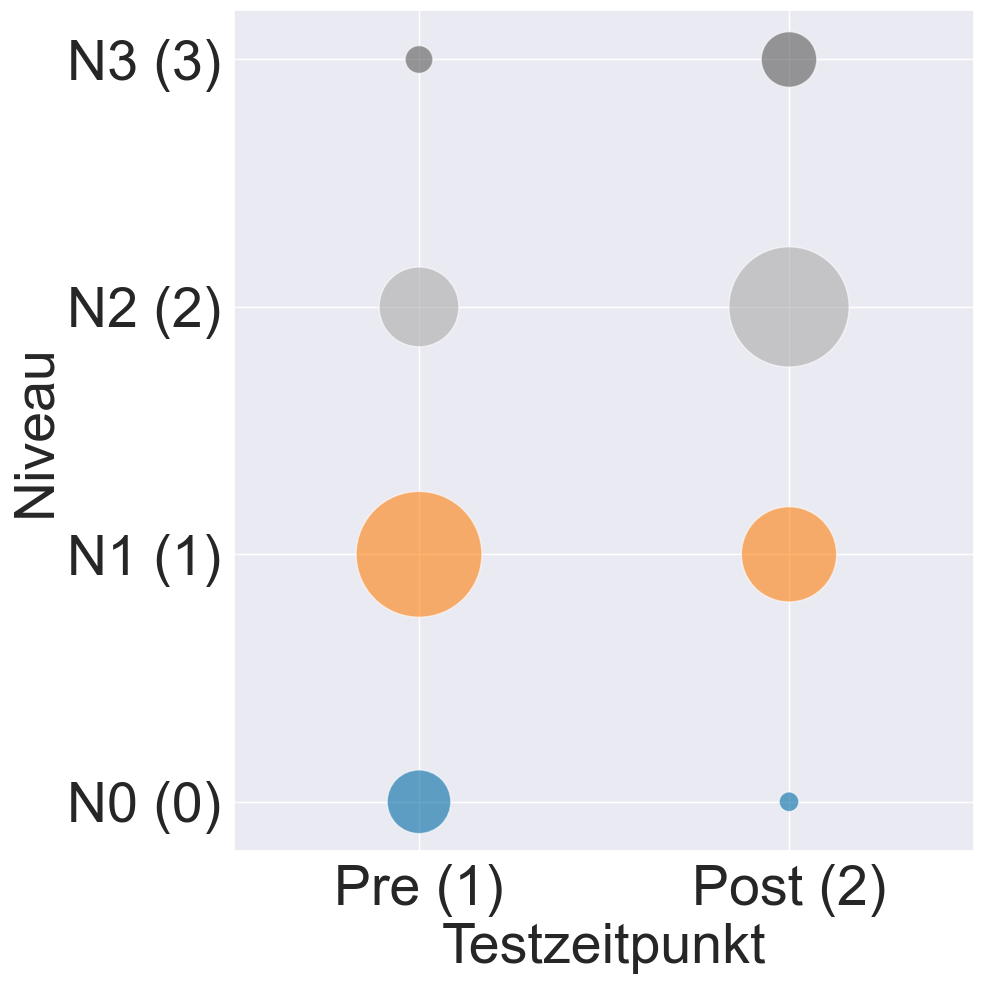

Korrelationsplot zu M4 gespeichert.


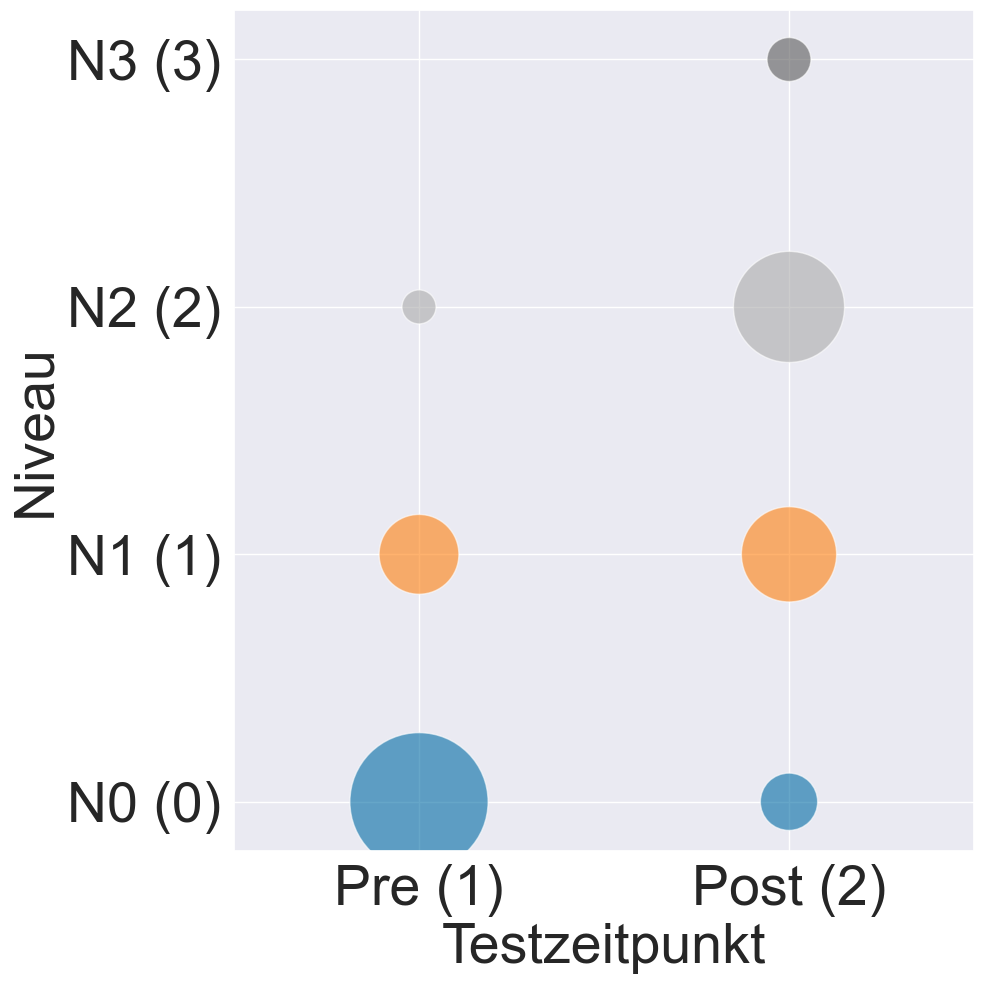

Korrelationsplot zu S1 gespeichert.


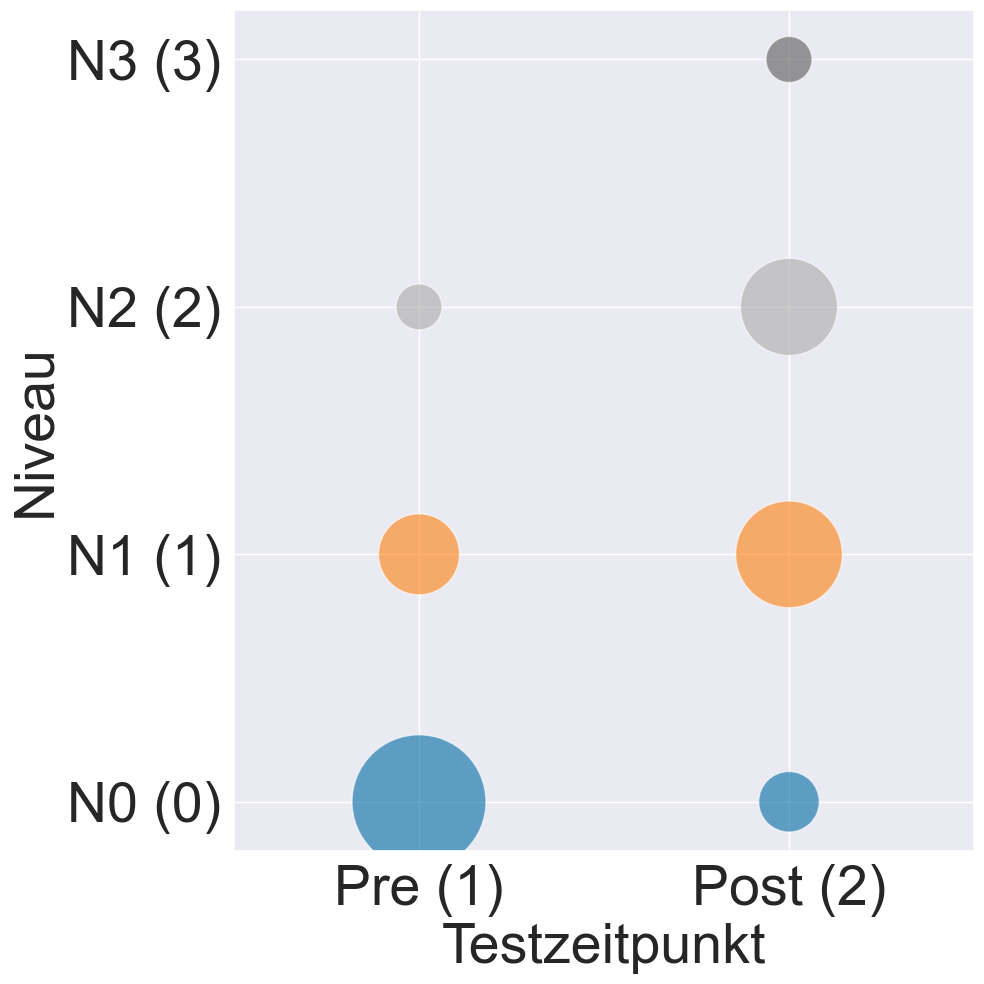

Korrelationsplot zu S2 gespeichert.


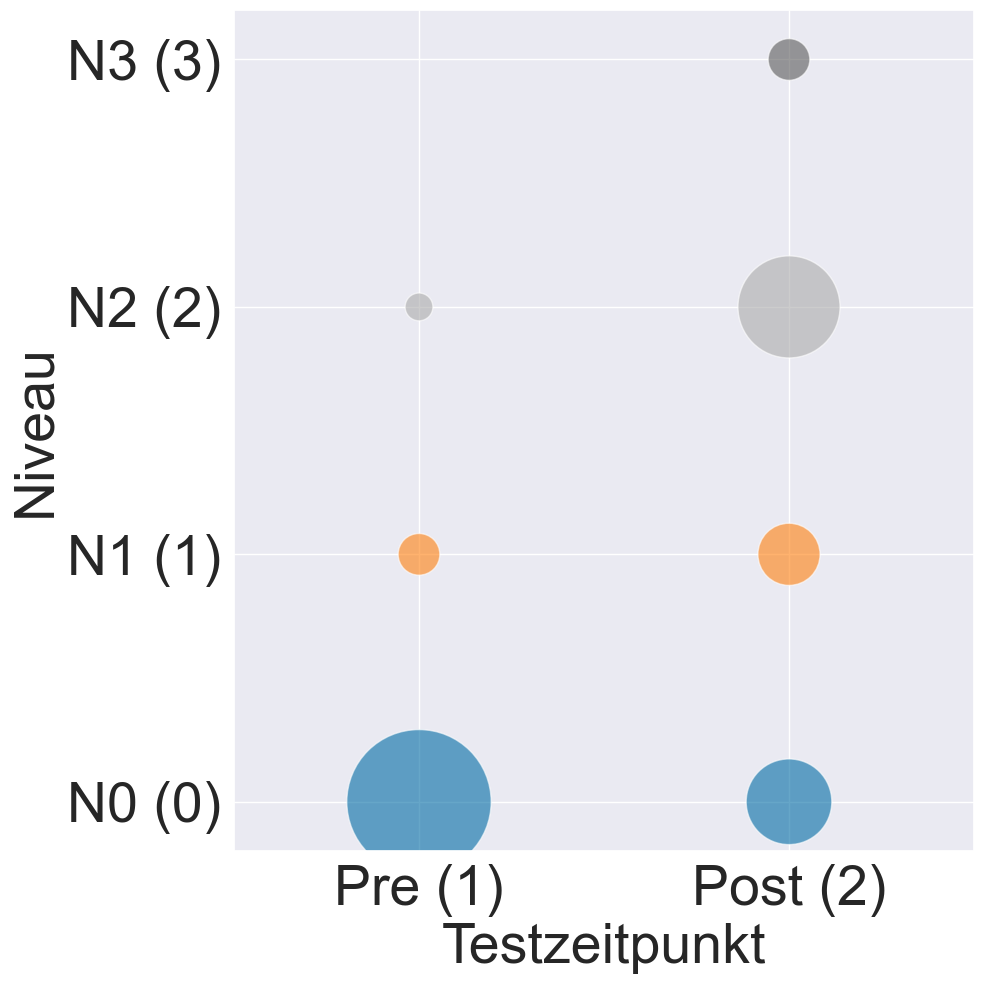

Korrelationsplot zu S3 gespeichert.


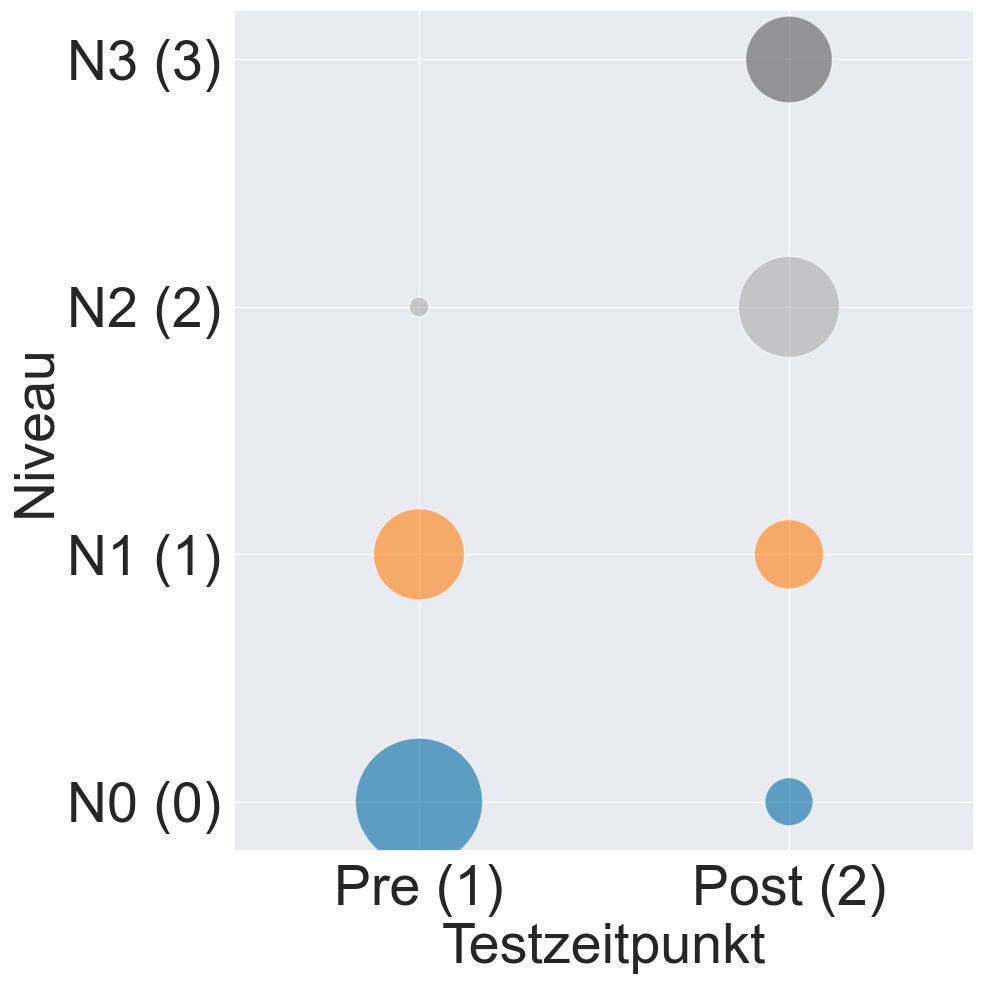

Korrelationsplot zu PR1 gespeichert.


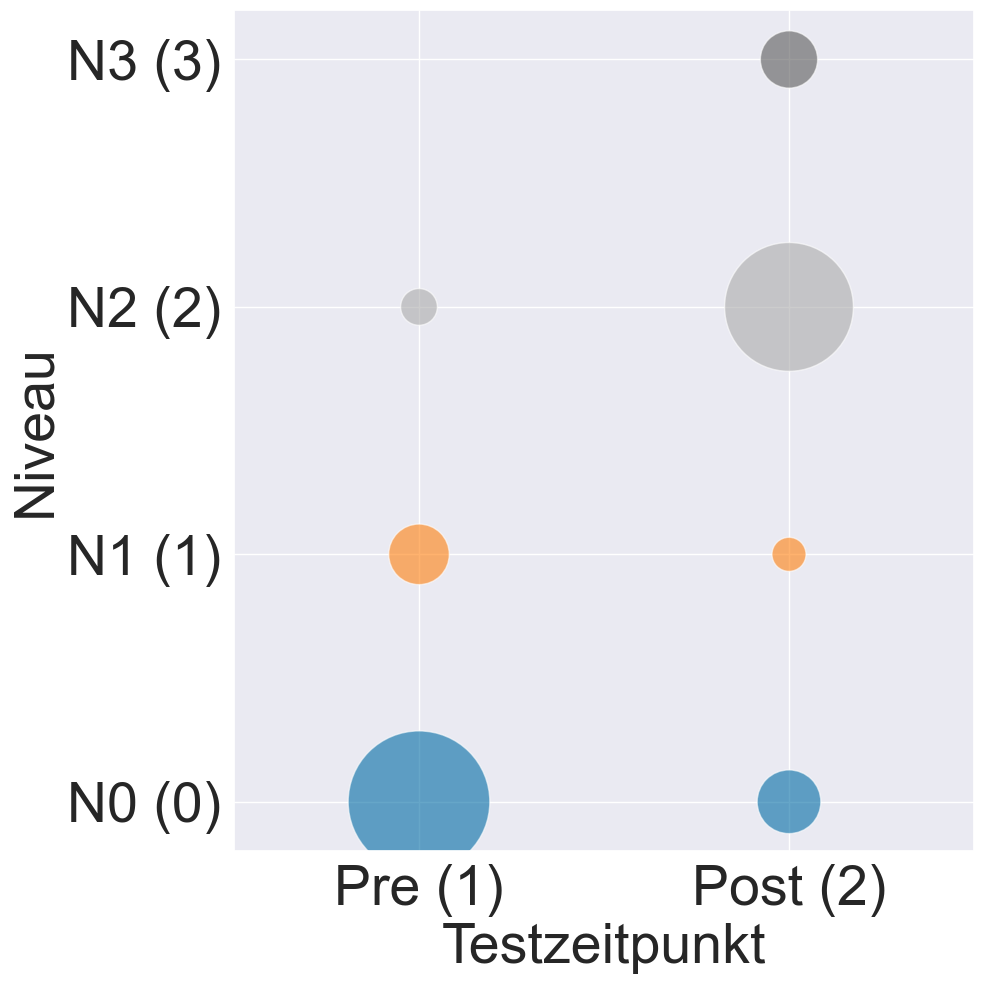

Korrelationsplot zu PR2 gespeichert.


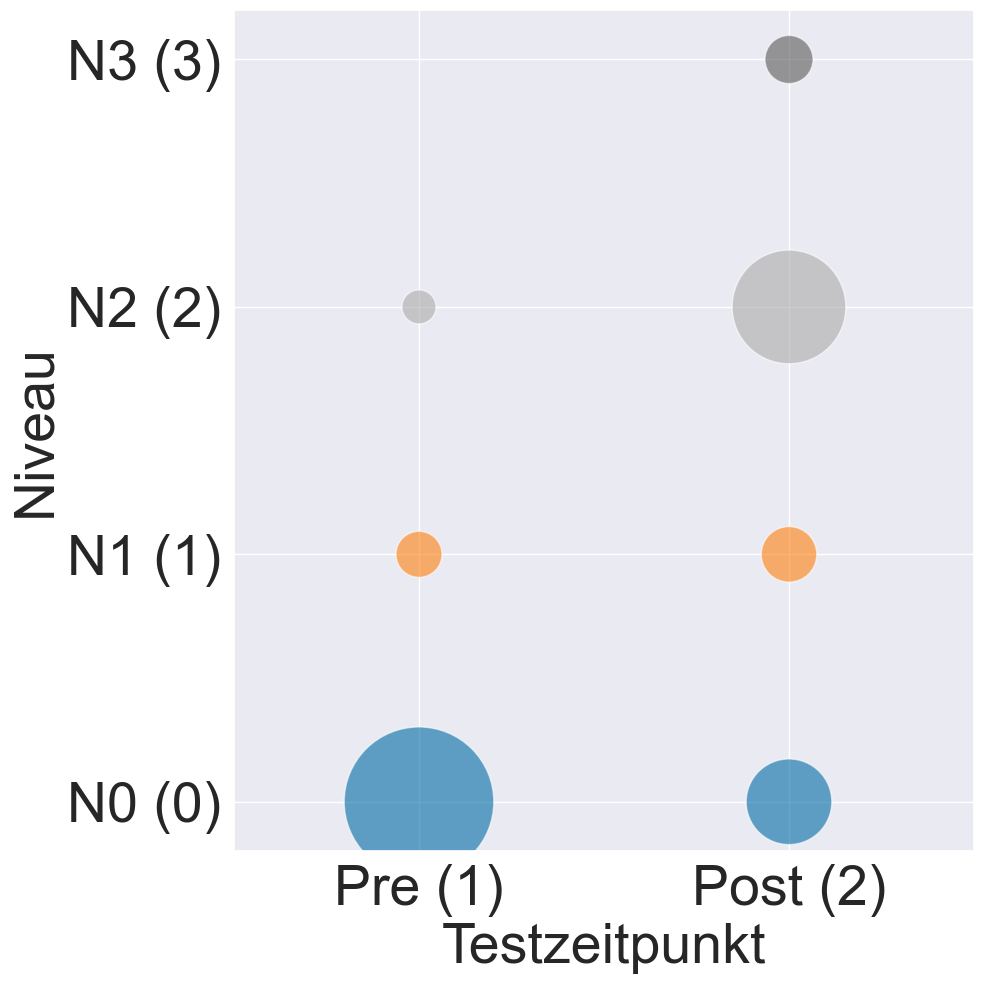

Korrelationsplot zu PR3 gespeichert.


In [6]:
# Schleife:
# erst die ersten beiden Zellen des Notebooks ausführen, um Bibliotheken einzulesen und statische Angaben zu übernehmen. 
# Auch die Zelle hierüber für die Funktionen. Diese später in die Bibliothek schreiben
# dann kann direkt dies ausgeführt werden: 

df_all   = pd.read_pickle(Ordner_Ziel_Daten + "/" + "AlleDatenQuant.pkl")
df_Effektstaerke = pd.DataFrame(index = ["p_Wil", "d", "r_S", "p_S", "Z", "tau_b", "p_tau", "N"])

#code = "M1" 
for code in codes:

    df, df_long, pre, post, N_filtered = Daten_aus_df_all_holen(code, df_all)
    
    Korrelationsplot_zeichnen_speichern(code, df_long, Ordner_Ziel_Abbildungen)
    
    d_Cohen = cohens_d(post, pre) # Funktion in Bibliothek, von mir definiert, Zähler: x-y, also post,pre angeben, damit Zuwachs positiv
    
    r_Spearman, p_Spearman= spearmanr(df_long["Testzeitpunkt"], df_long["Niveau"])
     
    z_Jan = berechne_z_Jan(df)

    #Wilcoxon Test:
    res    = wilcoxon(x = df["post"], y=df["pre"], alternative="greater",  method = 'approx') # "mode" ist alt, in der aktuellen Version heißt es "method"
    stat   = res.statistic
    p_Wil = res.pvalue

    # Kendals Tau b:
    res_tau_b = kendalltau(df_long["Testzeitpunkt"], df_long["Niveau"], alternative="two-sided", method='auto', variant='b')
    tau_b = res_tau_b.statistic
    p_tau = res_tau_b.pvalue
    
    df_Effektstaerke[code] = [p_Wil, d_Cohen, r_Spearman, p_Spearman, z_Jan, tau_b, p_tau, int(N_filtered)]

In [8]:
# Nun: das df mit den Ergebnissen formatieren:

df_T = df_Effektstaerke.T

# Format columns
df_T['p_Wil'] = df_T['p_Wil'].map('{:.1e}'.format)      # scientific notation with one digit
df_T['d']     = df_T['d'].map('{:.2f}'.format)          # float with two digits
df_T['r_S']   = df_T['r_S'].map('{:.2f}'.format)      # float with two digits
df_T['p_S']   = df_T['p_S'].map('{:.1e}'.format)      # scientific notation with one digit
df_T['Z']     = df_T['Z'].map('{:.2f}'.format)          # float with two digits
df_T['tau_b'] = df_T['tau_b'].map('{:.2f}'.format)      # float with two digits
df_T['p_tau'] = df_T['p_tau'].map('{:.1e}'.format)      # scientific notation with one digit
df_T['N']     = df_T['N'].astype(int)                   # integer

df_format = df_T.T

In [10]:
df_format

,M1,M2,M3,M4,S1,S2,S3,PR1,PR2,PR3
p_Wil,9.5e-10,1.1e-11,8.9e-13,1.5e-12,3.8e-18,3.2e-16,1.4e-14,9.1e-20,1.6e-20,7.0e-17
d,1.00,0.96,0.94,0.89,1.68,1.33,1.49,2.08,2.07,1.57
r_S,0.43,0.45,0.42,0.41,0.65,0.57,0.61,0.72,0.72,0.62
p_S,6.8e-11,7.7e-15,5.5e-13,5.0e-13,4.1e-35,7.3e-25,7.1e-26,1.0e-42,3.5e-42,1.1e-29
Z,0.39,0.34,0.39,0.33,0.43,0.37,0.40,0.59,0.55,0.43
tau_b,0.41,0.43,0.39,0.39,0.61,0.53,0.58,0.66,0.68,0.59
p_tau,4.9e-10,1.6e-13,5.1e-12,4.6e-12,2.0e-27,5.4e-21,3.6e-21,6.4e-31,9.8e-31,5.7e-24
N,103,137,138,140,138,138,121,129,130,133


In [12]:
# die Ergebnisse speichern und als Latex-Tabelle ausgeben: 
df_format.to_excel(Ordner_Ziel_Daten + "/df_Effektstaerke_formated.xlsx")
df_format.to_pickle(Ordner_Ziel_Daten + "/df_Effektstaerke_formated.pkl")
df_format.to_latex(Ordner_Ziel_Daten + "/df_Effektstaerke_formated.tex")

df_Effektstaerke.to_pickle(Ordner_Ziel_Daten + "/df_Effektstaerke.pkl")

## Korrelationsanalyse der Items

### Die Korrelation der Niveaus der verschiedenen Subsets berechnen (je pre und post getrennt)

In [62]:
# zunächst die Sets bilden:

# SubDataframe mit den Niveaus, pre und post, getrennt:
df_Niveaus_pre = df_all[["M1Niv_pre", "M2Niv_pre", "M3Niv_pre", "M4Niv_pre", "S1Niv_pre", "S2Niv_pre", "S3Niv_pre", "PR1Niv_pre", "PR2Niv_pre"]]
df_Niveaus_post = df_all[["M1Niv_post", "M2Niv_post", "M3Niv_post", "M4Niv_post", "S1Niv_post", "S2Niv_post", "S3Niv_post", "PR1Niv_post", "PR2Niv_post"]]
df_Niveaus_beide = concat_pre_post(df_Niveaus_pre, df_Niveaus_post)

# M
df_Niveaus_M_pre = df_all[["M1Niv_pre", "M2Niv_pre", "M3Niv_pre", "M4Niv_pre"]]
df_Niveaus_M_post = df_all[["M1Niv_post", "M2Niv_post", "M3Niv_post", "M4Niv_post"]]
df_Niveaus_M_beide = concat_pre_post(df_Niveaus_M_pre, df_Niveaus_M_post)

# S
df_Niveaus_S_pre = df_all[["S1Niv_pre", "S2Niv_pre", "S3Niv_pre"]]
df_Niveaus_S_post = df_all[["S1Niv_post", "S2Niv_post", "S3Niv_post"]]
df_Niveaus_S_beide = concat_pre_post(df_Niveaus_S_pre, df_Niveaus_S_post)

# PR
df_Niveaus_PR_pre = df_all[["PR1Niv_pre", "PR2Niv_pre"]]
df_Niveaus_PR_post = df_all[["PR1Niv_post", "PR2Niv_post"]]
df_Niveaus_PR_beide = concat_pre_post(df_Niveaus_PR_pre, df_Niveaus_PR_post)

# SPR
df_Niveaus_SPR_pre = df_all[["S1Niv_pre", "S2Niv_pre", "S3Niv_pre", "PR1Niv_pre", "PR2Niv_pre"]]
df_Niveaus_SPR_post = df_all[["S1Niv_post", "S2Niv_post", "S3Niv_post", "PR1Niv_post", "PR2Niv_post"]]
df_Niveaus_SPR_beide = concat_pre_post(df_Niveaus_SPR_pre, df_Niveaus_SPR_post)

In [70]:
df_Niveaus_pre

,M1Niv,M2Niv,M3Niv,M4Niv,S1Niv,S2Niv,S3Niv,PR1Niv,PR2Niv
0,4,2,1,1,0,1,0,2,1
1,1,2,0,1,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0
3,1,1,1,1,0,2,1,1,1
4,1,1,1,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
137,1,1,0,2,0,0,0,0,0
138,0,1,0,0,0,0,0,0,0
139,1,0,1,1,0,0,0,0,0
140,0,1,1,1,0,0,0,0,0


In [66]:
df_Niveaus_SPR_beide

,S1Niv,S2Niv,S3Niv,PR1Niv,PR2Niv
0,0,1,0,2,1
1,0,0,0,0,0
2,0,0,0,0,0
3,0,2,1,1,1
4,0,0,0,0,0
...,...,...,...,...,...
279,2,2,4,2,2
280,2,2,4,3,0
281,2,1,0,0,0
282,1,1,0,2,3


### Korrelationsmatrizen berechnen und als Latex ausgeben

In [74]:
print("pre:")
df_corr_pre  = df_corr(df_Niveaus_pre)

print("post:")
df_corr_post = df_corr(df_Niveaus_post)

print("beide:")
df_corr_beide = df_corr(df_Niveaus_beide)

pre:
\begin{tabular}{lrrrrrrrrr}
 & M1Niv & M2Niv & M3Niv & M4Niv & S1Niv & S2Niv & S3Niv & PR1Niv & PR2Niv \\
M1Niv & 1.00 & 0.13 & 0.19 & 0.08 & 0.32 & 0.25 & 0.06 & 0.10 & 0.09 \\
M2Niv & 0.13 & 1.00 & 0.20 & 0.03 & 0.17 & 0.18 & 0.10 & 0.24 & 0.09 \\
M3Niv & 0.19 & 0.20 & 1.00 & 0.23 & 0.19 & 0.19 & 0.19 & 0.23 & 0.26 \\
M4Niv & 0.08 & 0.03 & 0.23 & 1.00 & 0.16 & 0.12 & 0.03 & 0.06 & 0.10 \\
S1Niv & 0.32 & 0.17 & 0.19 & 0.16 & 1.00 & 0.65 & 0.23 & 0.23 & 0.16 \\
S2Niv & 0.25 & 0.18 & 0.19 & 0.12 & 0.65 & 1.00 & 0.38 & 0.37 & 0.25 \\
S3Niv & 0.06 & 0.10 & 0.19 & 0.03 & 0.23 & 0.38 & 1.00 & 0.18 & 0.38 \\
PR1Niv & 0.10 & 0.24 & 0.23 & 0.06 & 0.23 & 0.37 & 0.18 & 1.00 & 0.53 \\
PR2Niv & 0.09 & 0.09 & 0.26 & 0.10 & 0.16 & 0.25 & 0.38 & 0.53 & 1.00 \\
\end{tabular}

post:
\begin{tabular}{lrrrrrrrrr}
 & M1Niv & M2Niv & M3Niv & M4Niv & S1Niv & S2Niv & S3Niv & PR1Niv & PR2Niv \\
M1Niv & 1.00 & 0.28 & 0.10 & 0.07 & 0.10 & 0.01 & 0.04 & 0.13 & 0.03 \\
M2Niv & 0.28 & 1.00 & 0.23 & 0.20 & 0.15

In [78]:
df_corr_post

,M1Niv,M2Niv,M3Niv,M4Niv,S1Niv,S2Niv,S3Niv,PR1Niv,PR2Niv
M1Niv,1.000000,0.283655,0.103451,0.067700,0.097042,0.008775,0.037200,0.129435,0.028815
M2Niv,0.283655,1.000000,0.232590,0.202912,0.154495,0.135547,0.233804,0.096825,0.038782
M3Niv,0.103451,0.232590,1.000000,0.289809,0.232421,0.118480,0.160195,0.149638,-0.028931
M4Niv,0.067700,0.202912,0.289809,1.000000,0.209239,0.151439,0.075034,0.207898,0.052297
S1Niv,0.097042,0.154495,0.232421,0.209239,1.000000,0.408105,0.403091,0.137390,0.211574
S2Niv,0.008775,0.135547,0.118480,0.151439,0.408105,1.000000,0.339374,0.284456,0.221267
S3Niv,0.037200,0.233804,0.160195,0.075034,0.403091,0.339374,1.000000,0.253401,0.310617
PR1Niv,0.129435,0.096825,0.149638,0.207898,0.137390,0.284456,0.253401,1.000000,0.448223
PR2Niv,0.028815,0.038782,-0.028931,0.052297,0.211574,0.221267,0.310617,0.448223,1.000000


In [80]:
df_corr_beide

,M1Niv,M2Niv,M3Niv,M4Niv,S1Niv,S2Niv,S3Niv,PR1Niv,PR2Niv
M1Niv,1.000000,0.262104,0.209734,0.152634,0.335969,0.254828,0.218618,0.240311,0.228625
M2Niv,0.262104,1.000000,0.361672,0.263701,0.405563,0.352687,0.420625,0.395904,0.339105
M3Niv,0.209734,0.361672,1.000000,0.387850,0.379868,0.337536,0.394022,0.368870,0.359560
M4Niv,0.152634,0.263701,0.387850,1.000000,0.376829,0.329184,0.319399,0.338903,0.346203
S1Niv,0.335969,0.405563,0.379868,0.376829,1.000000,0.705392,0.618048,0.514324,0.549800
S2Niv,0.254828,0.352687,0.337536,0.329184,0.705392,1.000000,0.571098,0.568119,0.526401
S3Niv,0.218618,0.420625,0.394022,0.319399,0.618048,0.571098,1.000000,0.552748,0.638291
PR1Niv,0.240311,0.395904,0.368870,0.338903,0.514324,0.568119,0.552748,1.000000,0.702808
PR2Niv,0.228625,0.339105,0.359560,0.346203,0.549800,0.526401,0.638291,0.702808,1.000000


## Statistische Werte für die Cluster

Dies ist völlig analog zu der Analyse in "Effektstärke revisited" s.o., nur jetzt für die drei Cluster statt der zehn Oberkategorien!

(Erstellung der Sankey-Diagramme für die Cluster s.o. bei den Sankey-Diagrammen)

In [21]:
df_all.columns

Index(['P', 'M1_pre_Sicherheit', 'M2_pre_Sicherheit', 'M3_pre_Sicherheit',
       'M4_pre_Sicherheit', 'S1_pre_Sicherheit', 'S2_pre_Sicherheit',
       'S3_pre_Sicherheit', 'PR1_pre_Sicherheit', 'PR2_pre_Sicherheit',
       'M1_post_Sicherheit', 'M2_post_Sicherheit', 'M3_post_Sicherheit',
       'M4_post_Sicherheit', 'S1_post_Sicherheit', 'S2_post_Sicherheit',
       'S3_post_Sicherheit', 'PR1_post_Sicherheit', 'PR2_post_Sicherheit',
       'Alter', 'Geschlecht', 'Sterne', 'Zeitpunkt_pre', 'Zeitpunkt_post',
       'M1Niv_pre', 'M1Niv_post', 'M2Niv_pre', 'M2Niv_post', 'M3Niv_pre',
       'M3Niv_post', 'M4Niv_pre', 'M4Niv_post', 'S1Niv_pre', 'S1Niv_post',
       'S2Niv_pre', 'S2Niv_post', 'S3Niv_pre', 'S3Niv_post', 'PR1Niv_pre',
       'PR1Niv_post', 'PR2Niv_pre', 'PR2Niv_post', 'PR3Niv_pre', 'PR3Niv_post',
       'M1Niv_Diff', 'M2Niv_Diff', 'M3Niv_Diff', 'M4Niv_Diff', 'S1Niv_Diff',
       'S2Niv_Diff', 'S3Niv_Diff', 'PR1Niv_Diff', 'PR2Niv_Diff', 'PR3Niv_Diff',
       'global_median_pre'

In [32]:
# vorab: Beachte die Mediane in Cluster M: sie sind zunächst auch .5 und werden dann später in der Analyse gerundet, sodass

df_all["M_median_post"].values

array([1.5, 1. , 1. , 1. , 2.5, 3. , 1. , 1. , 1. , 3. , 2. , 3. , 2. ,
       2. , 2. , 2. , 2. , 2. , 2.5, 2. , 1.5, 2. , 2.5, 3. , 1.5, 2. ,
       2. , 2. , 2. , 0.5, 2.5, 1.5, 2. , 2.5, 3. , 1. , 2. , 1. , 1.5,
       1.5, 1. , 1. , 1.5, 2. , 1.5, 1.5, 2. , 2. , 1.5, 1.5, 2.5, 1.5,
       2. , 1. , 1.5, 1. , 1. , 1. , 1. , 1. , 2. , 1. , 1. , 1. , 1. ,
       2. , 1.5, 2.5, 1. , 3. , 1. , 1. , 1. , 4. , 1.5, 1.5, 2. , 2. ,
       2. , 2.5, 1. , 3. , 2. , 1. , 3. , 1.5, 1. , 1.5, 2. , 2. , 2. ,
       2. , 2. , 2.5, 2.5, 2. , 2. , 1. , 1.5, 2. , 2. , 2.5, 1.5, 2.5,
       1.5, 2.5, 2. , 2. , 2. , 1. , 1.5, 2. , 2. , 2. , 2.5, 1. , 1.5,
       1.5, 1. , 2.5, 2. , 2. , 1. , 1.5, 2.5, 2. , 2.5, 0.5, 1.5, 2.5,
       3. , 3. , 1.5, 2. , 1. , 2.5, 1.5, 1.5, 3.5, 2. , 2. , 2. ])

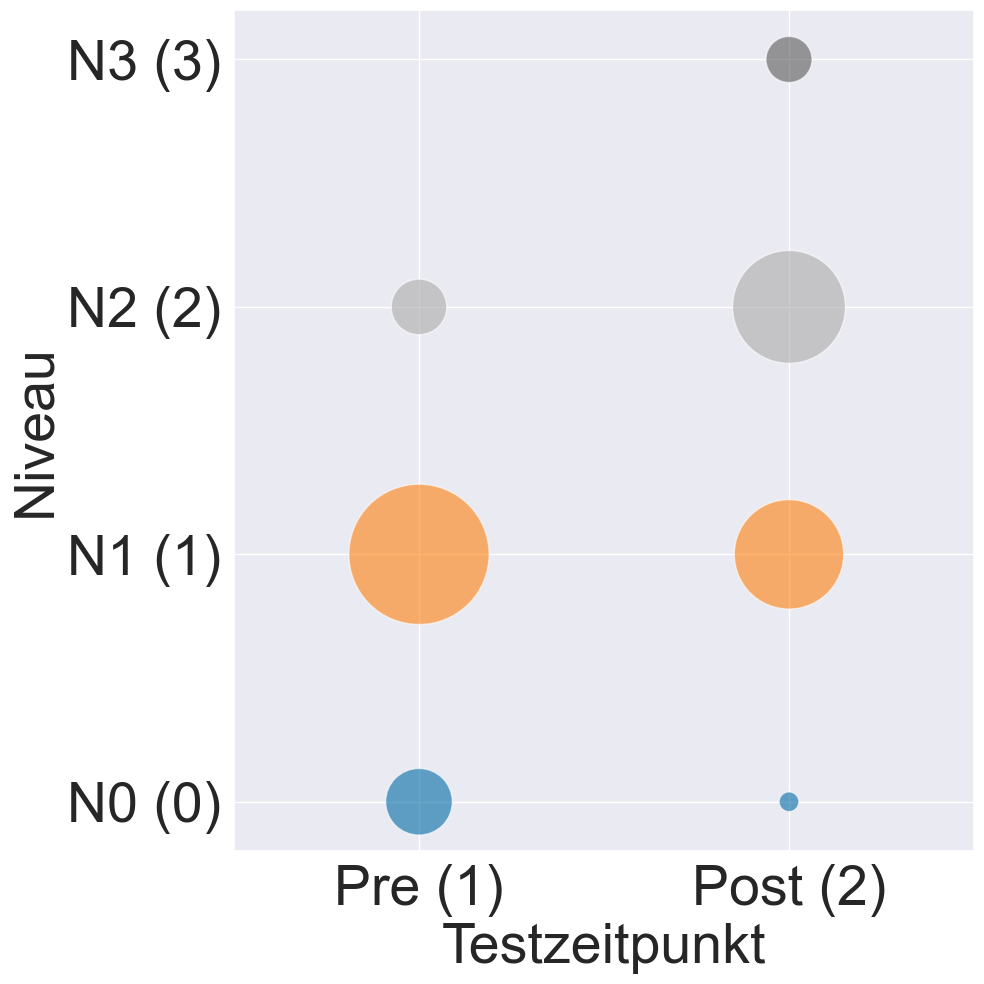

Korrelationsplot zu M gespeichert.


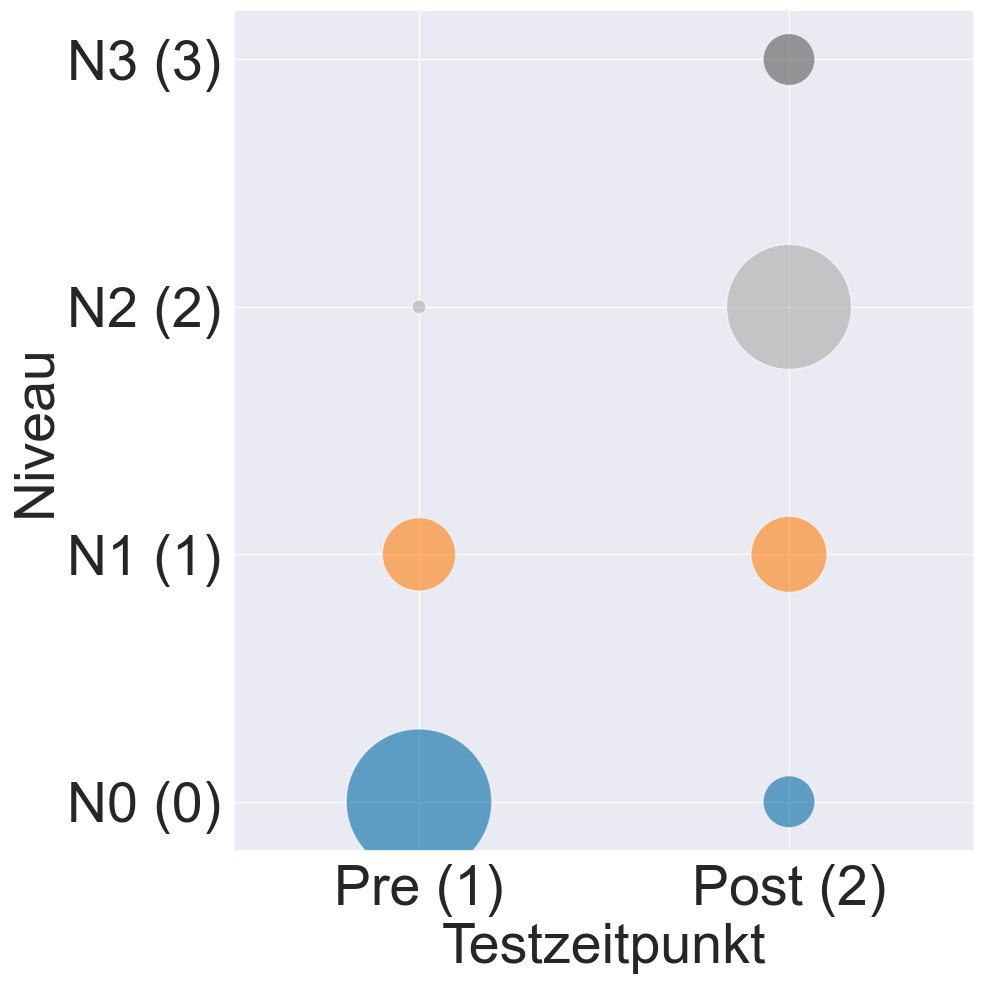

Korrelationsplot zu SPR gespeichert.


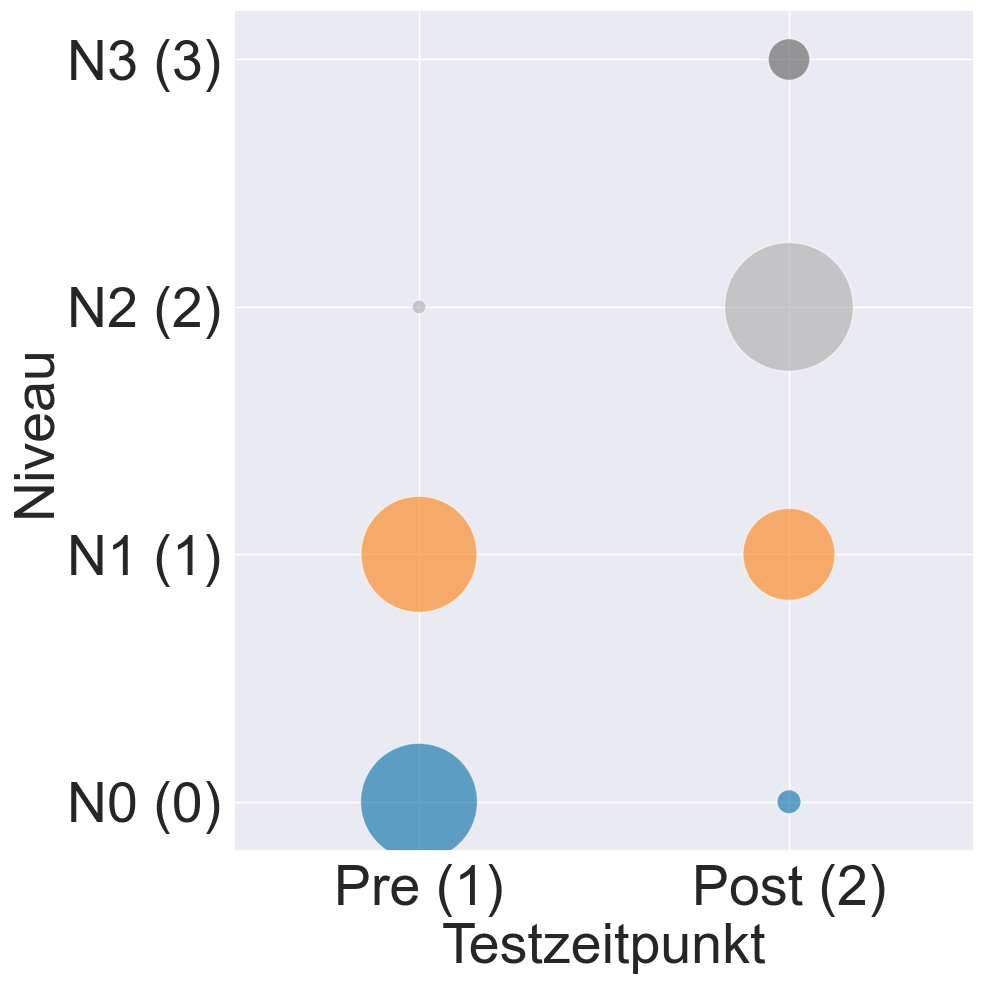

Korrelationsplot zu global gespeichert.


In [14]:
# hier alle Berechnungen der Kenngrößen für die Cluster machen: 

df_all   = pd.read_pickle(Ordner_Ziel_Daten + "/" + "AlleDatenQuant.pkl")
df_StatWerteCluster = pd.DataFrame(index = ["p_Wil", "d", "r_S", "p_S", "Z", "tau_b", "p_tau", "N"])

for code in cluster:
    df, df_long, pre, post, N_filtered = ClusterDaten_aus_df_all_holen(code, df_all)

    Korrelationsplot_zeichnen_speichern(code, df_long, Ordner_Ziel_Abbildungen)
    
    d_Cohen = cohens_d(post, pre) # Funktion in Bibliothek, von mir definiert, Zähler: x-y, also post,pre angeben, damit Zuwachs positiv
    
    r_Spearman, p_Spearman= spearmanr(df_long["Testzeitpunkt"], df_long["Niveau"])
     
    z_Jan = berechne_z_Jan(df)

    #Wilcoxon Test:
    res    = wilcoxon(x = df["post"], y=df["pre"], alternative="greater",  method = 'approx') # "mode" ist alt, in der aktuellen Version heißt es "method"
    stat   = res.statistic
    p_Wil = res.pvalue

    # Kendals Tau b:
    res_tau_b = kendalltau(df_long["Testzeitpunkt"], df_long["Niveau"], alternative="two-sided", method='auto', variant='b')
    tau_b = res_tau_b.statistic
    p_tau = res_tau_b.pvalue
    
    df_StatWerteCluster[code] = [p_Wil, d_Cohen, r_Spearman, p_Spearman, z_Jan, tau_b, p_tau, int(N_filtered)]
   
    

In [16]:
# Nun: das df mit den Ergebnissen formatieren:

df_T = df_StatWerteCluster.T

# Format columns
df_T['p_Wil'] = df_T['p_Wil'].map('{:.1e}'.format)      # scientific notation with one digit
df_T['d']     = df_T['d'].map('{:.2f}'.format)          # float with two digits
df_T['r_S']   = df_T['r_S'].map('{:.2f}'.format)      # float with two digits
df_T['p_S']   = df_T['p_S'].map('{:.1e}'.format)      # scientific notation with one digit
df_T['Z']     = df_T['Z'].map('{:.2f}'.format)          # float with two digits
df_T['tau_b'] = df_T['tau_b'].map('{:.2f}'.format)      # float with two digits
df_T['p_tau'] = df_T['p_tau'].map('{:.1e}'.format)      # scientific notation with one digit
df_T['N']     = df_T['N'].astype(int)                   # integer

df_format = df_T.T

In [18]:
# die Ergebnisse speichern und als Latex-Tabelle ausgeben: 
df_format.to_excel(Ordner_Ziel_Daten + "/df_StatWerteCluster_formated.xlsx")
df_format.to_pickle(Ordner_Ziel_Daten + "/df_StatWerteCluster_formated.pkl")
df_format.to_latex(Ordner_Ziel_Daten + "/df_StatWerteCluster_formated.tex")

df_StatWerteCluster.to_pickle(Ordner_Ziel_Daten + "/df_StatWerteCluster.pkl")

In [20]:
df_format

,M,SPR,global
p_Wil,8.3e-17,3.4e-22,1.1e-22
d,1.12,2.32,2.13
r_S,0.49,0.77,0.74
p_S,9.6e-19,8.8e-55,9.7e-51
Z,0.32,0.53,0.48
tau_b,0.47,0.72,0.69
p_tau,1.3e-16,3.5e-37,1.1e-35
N,141,139,142


## Untersuchung von möglichen Unterschieden im Lernerfolg zwischen Jungs und Mädchen

für alle Sets:
- Mediane der Differenzen für Jungs und Mädels in ein Histogramm plotten.
- Mit Mann-Whitney U-Test testen, ob es einen signifikanten Unterschied  gibt. 
- Falls ja, auch die Effektstärke über Spearman's r bestimmen. 

  0%|                                                     | 0/3 [00:00<?, ?it/s]

[ 0.   0.   1.   1.5  0.   0.   0.5  0.   1.   0.5  0.5  0.5  1.   1.5
  0.5  0.5  1.5  1.5 -0.5  1.   0.5  0.5  0.   0.5 -0.5  1.   1.5  1.
  1.5  0.5  0.   0.   0.   0.5  0.   0.  -0.5  0.5  0.   1.   0.  -0.5
  1.   1.5  1.5  0.5  0.   1.   0.5  1.  -0.5  0.5  0.5  1.5  0.5  2.
  0.   0.   0.   0.5  0.5  1.5  0.   2.   1.   0.   0.5  3.   1.5  1.
  0.5] [ 0.   1.   1.   1.   1.   0.5  1.   1.   0.5  1.   0.5  0.   0.5  0.
  1.   0.   0.   0.   0.5  0.5  1.   1.5  0.5  0.   0.   0.5  0.   0.5
  0.  -1.   1.   0.5  1.   0.   0.   0.5  1.   1.   1.   1.   1.   0.
  1.   1.   1.   0.5  1.   1.   1.5  1.  -0.5  2.   0.   1.5  0.   1.
  1.5  0.5  0. ]


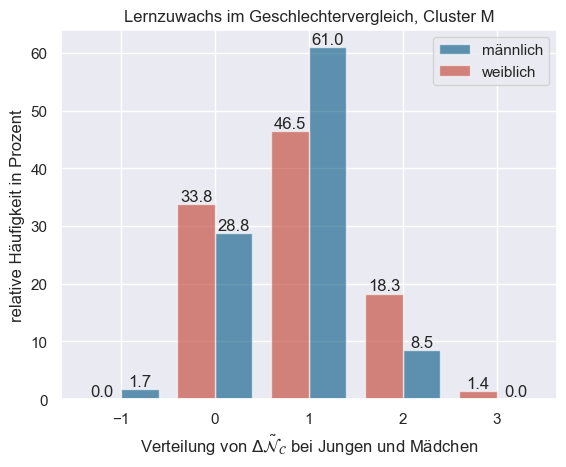

[ 0.         33.8028169  46.47887324 18.30985915  1.4084507 ] [ 1.69491525 28.81355932 61.01694915  8.47457627  0.        ]


 33%|███████████████                              | 1/3 [00:00<00:00,  2.69it/s]

[ 3.  2.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  0.  0.  2.  2.  1.
  1.  1.  3.  2.  0.  1.  0.  1.  2.  2.  2.  2. -1.  2.  0.  1.  2.  2.
  0.  0.  2.  2.  2.  2.  2.  2.  2.  2.  1.  3.  2.  1.  2.  2.  2.  2.
  1.  2.  0.  1.  1.  2.  0.  1.  2.  3.  3.  1.  0.  2.  0.  1.  2.] [ 1.  1.  1.  3.  1.  2.  2.  3.  4.  1.  2.  2.  2.  1.  0.  0.  1.  0.
  1.  0.  0.  1.  1.  2.  0.  2.  2.  3.  1.  3.  0.  2. -2.  1.  1.  1.
  2.  2.  2.  1.  2.  2.  2.  2.  2.  2.  2.  0.  2.  2.  0.  1.  1.  2.
  1.  0.  2.  2.  2.]


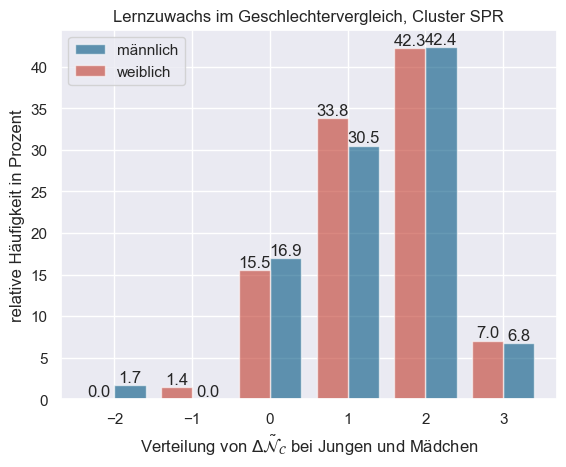

[ 0.          1.4084507  15.49295775 33.8028169  42.25352113  7.04225352] [ 1.69491525  0.         16.94915254 30.50847458 42.37288136  6.77966102]


 67%|██████████████████████████████               | 2/3 [00:00<00:00,  2.67it/s]

[1. 2. 1. 1. 1. 1. 1. 0. 2. 1. 1. 1. 1. 1. 0. 1. 2. 1. 1. 1. 2. 2. 0. 1.
 0. 1. 2. 2. 2. 2. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 2. 2. 2. 1. 0. 2.
 1. 1. 1. 1. 1. 2. 1. 2. 0. 0. 0. 1. 0. 1. 0. 3. 2. 1. 0. 3. 1. 1. 2.] [0. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 2. 2. 2. 1. 2. 1. 1. 1. 2. 2. 2. 1.
 2. 1. 0. 1. 1. 2. 0. 0. 2. 2. 2.]


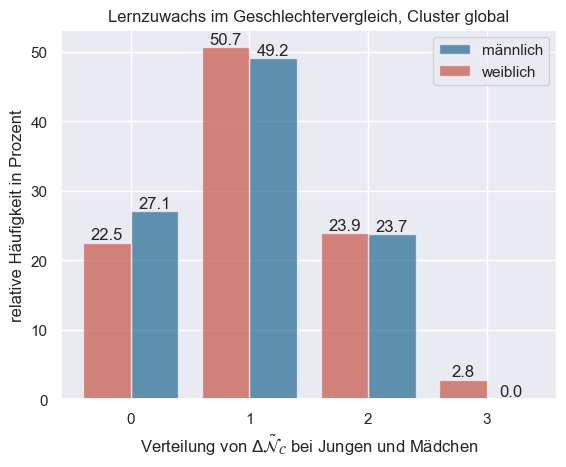

[22.53521127 50.70422535 23.94366197  2.81690141] [27.11864407 49.15254237 23.72881356  0.        ]


100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  2.78it/s]

                    M       SPR    global
p_shapiro_w  0.489721  0.277879  0.698055
p_shapiro_m  0.176684  0.399438  0.849309
p_t          0.982247  0.954440  0.426651
p_U          0.699829  0.912970  0.499067
r_S          0.034158  0.009841 -0.059739
p_S          0.699635  0.911515  0.499581
TS_bst       0.981000  0.996000  0.975000
TS_tTest_ES  0.988620  0.989887  0.985686


In [11]:
# Die Arbeitsschleife:

# Subsets Jungs und Maedels bilden: 
df_Jungs = df_all[(df_all['Geschlecht'] == "männlich")]
N_Jungs = df_Jungs.shape[0]

df_Maedels = df_all[(df_all['Geschlecht'] == "weiblich")]
N_Maedels = df_Maedels.shape[0]

# Array zur Speicherung der Werte anlegen:
df_stats_Geschlechter = pd.DataFrame(index = ["p_shapiro_w", "p_shapiro_m", "p_t", "p_U", "r_S", "p_S", "TS_bst", "TS_tTest_ES"])

#code = "M" 
for code in tqdm(cluster):

    m = df_Jungs[code + '_median_diff']
    w = df_Maedels[code + '_median_diff']

    w_values = w.values
    m_values = m.values

    print(w_values, m_values)
    
    # Histogramm plotten:
    w_hist_rel, m_hist_rel = Histogram_Geschlechtervergleich_erstellen(m, w, code, Ordner_Ziel_Abbildungen)

    print(w_hist_rel, m_hist_rel)

    # Prüfen, ob eine Normalverteilung vorliegt: 
    # Shapiro-Wilk-Test
    stat_w, p_shapiro_w = shapiro(w_hist_rel)
    stat_m, p_shapiro_m = shapiro(m_hist_rel)
    
    # Nun den Mann-Whitney-U-Test durchführen:
    res = mannwhitneyu(w, m, alternative='two-sided')
    p_U = res.pvalue

    # Es geht auch ein t-Test:
    res = ttest_ind(w_values,m_values, alternative='two-sided')
    p_t = res.pvalue
    
    # Nun Spearmans r_S berechnen:
    # Hierzu die Daten zunächst in das Long-Format bringen
    # DataFrame im Long-Format erstellen
    
    werte = np.concatenate((w_values, m_values))
    df = pd.DataFrame({
        'DeltaNiv': werte,
        'Geschlecht': [1] * len(w) + [2] * len(m)
    })
    # Jetzt Spearmans r_S berechnen: 
    r_S, p_S = spearmanr(df["Geschlecht"],df["DeltaNiv"])
    # r positiv: Jungs lernen eher mehr, negativ: Mädels lernen eher mehr
    
    # Jetzt das Beta für die Teststärke berechnen:
    # Angaben:
    alpha=0.01 # Signifikanzniveau
    num_simulations=1000#00 # Anzahl Bootstraps in Version 1. Für Diss: N=1e5 genutzt. Gleiche Ergebnisse wie bei N=1e3
    n1 = len(w)
    n2 = len(m)
    n_total = n1 + n2
    effect_size = 0.1 # angenommene Effektstärke, für die die Teststärke berechnet wird.

    # Version 1: mit bootstrap
    power_bootstrap = power_mannwhitney_bootstrap(m,w, alpha, num_simulations)

    # Version 2: 
    analysis = TTestIndPower()
    beta_tTest = analysis.power(effect_size=r_S, nobs1=n1, alpha=alpha, ratio=n2/n1, alternative='two-sided')
    # https://www.statsmodels.org/stable/generated/statsmodels.stats.power.TTestIndPower.power.html#statsmodels.stats.power.TTestIndPower.power
    # Achtung: laut doc wird gleich die Power zurückgegeben, statt beta. Aber alles ergibt nur Sinn, wenn angenommen wird, dass die Funktion beta zurückgibt
    # Code: https://github.com/statsmodels/statsmodels/blob/main/statsmodels/stats/power.py
    # --> in der Tat scheint beta ausgegeben zu werden. Dann ist meine Handhabung hier richtig.  

    
    # Jetzt alles in ein Array schreiben und in die Übersichtsmatrix:
    Werte = [p_shapiro_w, p_shapiro_m, p_t, p_U, r_S, p_S, power_bootstrap, 1-beta_tTest]
    df_stats_Geschlechter[code] = Werte

print(df_stats_Geschlechter)

In [8]:
# jetzt df_stats_Geschlechter formatieren und drucken und speichern:

# die Ergebnisse speichern und als Latex-Tabelle ausgeben: 
df_stats_Geschlechter.to_pickle(Ordner_Ziel_Daten + "/df_stats_Geschlechter.pkl")
df_stats_Geschlechter.to_latex(Ordner_Ziel_Daten + "/df_stats_Geschlechter.tex", decimal='.', float_format="%.2f")

In [10]:
df_stats_Geschlechter

,M,SPR,global
p_shapiro_w,0.489721,0.277879,0.698055
p_shapiro_m,0.176684,0.399438,0.849309
p_t,0.982247,0.954440,0.426651
p_U,0.699829,0.912970,0.499067
r_S,0.034158,0.009841,-0.059739
p_S,0.699635,0.911515,0.499581
TS_bst,0.983000,0.992000,0.983000
TS_tTest_ES,0.988620,0.989887,0.985686


In [12]:
print("Wow! Alle Auswertungen sind fertig!")

Wow! Alle Auswertungen sind fertig!


In [15]:
df_all

,P,M1_pre_Sicherheit,M2_pre_Sicherheit,M3_pre_Sicherheit,M4_pre_Sicherheit,S1_pre_Sicherheit,S2_pre_Sicherheit,S3_pre_Sicherheit,PR1_pre_Sicherheit,PR2_pre_Sicherheit,...,M_median_diff,S_median_pre,S_median_post,S_median_diff,PR_median_pre,PR_median_post,PR_median_diff,SPR_median_pre,SPR_median_post,SPR_median_diff
0,1,3,3,3,4,0,1,0,5,3,...,0.0,0.0,1.0,1.0,1.5,2.0,0.5,1.0,1.0,1.0
1,2,2,3,0,3,1,1,1,1,1,...,0.0,0.0,2.0,2.0,0.0,3.0,3.0,0.0,3.0,3.0
2,3,1,1,1,1,1,1,0,0,0,...,0.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0
3,4,1,4,4,5,0,1,2,1,1,...,0.0,1.0,1.0,0.0,1.0,2.5,1.5,1.0,2.0,1.0
4,5,1,1,3,3,0,0,0,0,0,...,1.0,0.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,138,4,4,0,3,0,0,0,0,0,...,0.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0
138,139,0,4,0,0,0,0,0,0,0,...,3.0,0.0,2.0,2.0,0.0,1.5,1.5,0.0,2.0,2.0
139,140,2,0,2,3,0,0,0,0,0,...,1.5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
140,141,1,2,3,3,0,0,0,0,0,...,1.0,0.0,1.0,1.0,0.0,2.5,2.5,0.0,1.0,1.0


## Geschlechterunterschied - alt

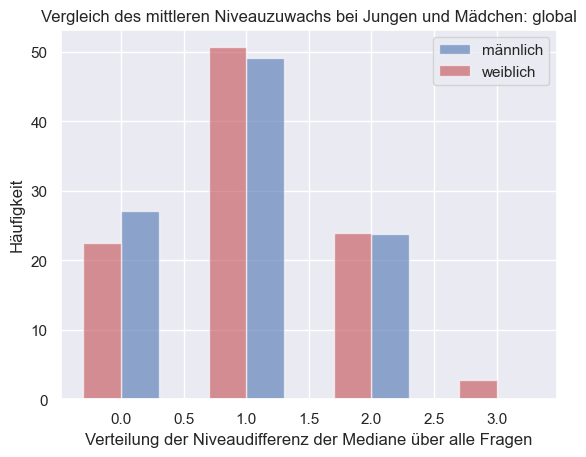

*****
global
p-Wert U-Test | r_Spearman
[0.4990674626091497, 0.0597385021222349]


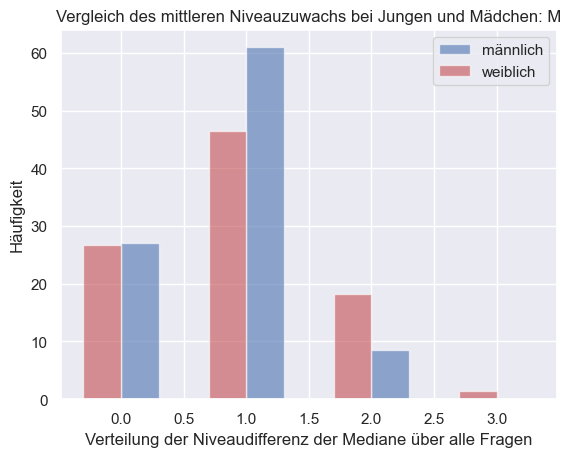

*****
M
p-Wert U-Test | r_Spearman
[0.6998288134254667, -0.0341580841192546]


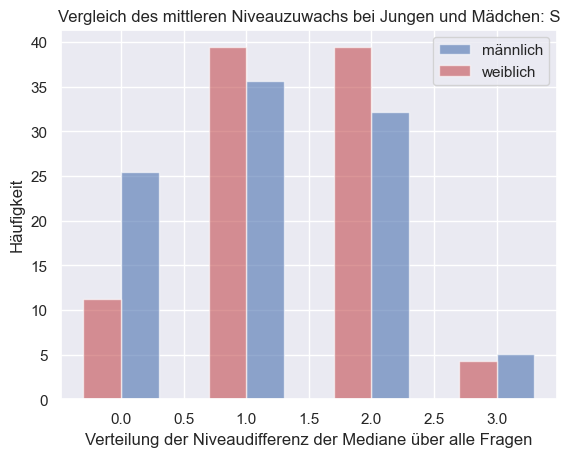

*****
S
p-Wert U-Test | r_Spearman
[0.21345043559625587, 0.10975761930898399]


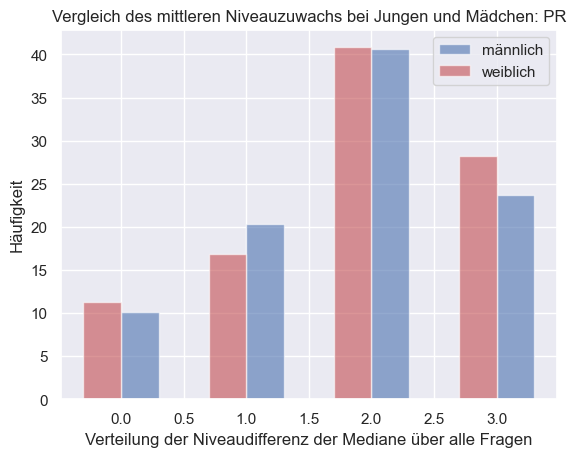

*****
PR
p-Wert U-Test | r_Spearman
[0.7277658839107515, 0.030856894838670983]


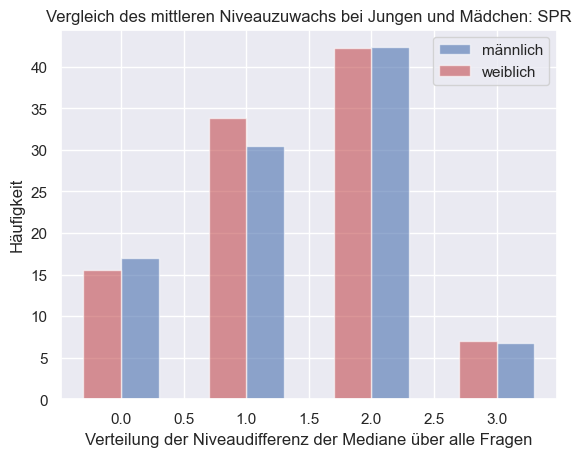

*****
SPR
p-Wert U-Test | r_Spearman
[0.9129700595439262, -0.00984141451851714]


In [44]:
# Histogramme Geschlechterunterschied

for key in dict_sets:

    #key = "global" # for key in dict_sets
    #key_list = set_ohnePR3 # dict_sets[key] # = ["M1", "M2", "M3", "M4", "S1", "S2", "S3", "PR1", "PR2"]

    m = df_Jungs[key + '_median_diff']
    w = df_Maedels[key + '_median_diff']

    # Calculate percentages
    binedges = [-0.1, 0.5, 1.5, 2.5, 3.5]
    m_hist_rel = np.histogram(m, bins=binedges)[0] / N_Jungs * 100
    w_hist_rel = np.histogram(w, bins=binedges)[0] / N_Maedels * 100

    sns.set_theme()  # <-- This actually changes the look of plots.

    # Create histograms
    bins = 4  # Adjust the number of bins as needed
    #plt.hist([m, w], bins=bins, color=['b', 'r'], alpha=0.6, label=["männlich", "weiblich"], density = True)
    x_Mitte = [0,1,2,3]
    delta = 0.15
    x_rechts = [0+ delta, 1+delta, 2+delta, 3+delta]
    x_links  = [0-delta, 1-delta, 2-delta, 3-delta]

    plt.bar(x = x_rechts, height = m_hist_rel, color='b', alpha=0.6, label="männlich", width=delta*2)
    plt.bar(x = x_links, height = w_hist_rel, color='r', alpha=0.6, label="weiblich", width=delta*2)

    # Add labels and title
    plt.xlabel('Verteilung der Niveaudifferenz der Mediane über alle Fragen')
    plt.ylabel('Häufigkeit')
    plt.title('Vergleich des mittleren Niveauzuwachs bei Jungen und Mädchen: ' + key)

    # Add legend
    plt.legend()

    # Show the plot

    plt.savefig(Ordner_Ziel_Abbildungen + "Geschlechtervergleich" + key + "_hist.pdf")
    plt.savefig(Ordner_Ziel_Abbildungen + "Geschlechtervergleich" + key + "_hist.png")
    plt.show()
    
    # Nun den Mann-Whitney U test und Spearman's r ausrechnen und in eine Tabelle schreiben
    res = mannwhitneyu(w, m, alternative='two-sided')
    p_value_UTest = res.pvalue

    # Spearman r:
    df_m = pd.DataFrame(data=m.values, columns=["DiffNiv"])
    df_m["Geschlecht"] = 1

    df_w = pd.DataFrame(data=w.values, columns=["DiffNiv"])
    df_w["Geschlecht"] = 2

    df_both = pd.concat([df_m, df_w], ignore_index=True)

    corr_mat = df_both.corr(method='spearman')
    r_Spearman = corr_mat.iloc[1,0]

    arr_stat = [p_value_UTest, r_Spearman]
    print("*****")
    print(key)
    print("p-Wert U-Test | r_Spearman")
    print(arr_stat)

    df_stats_Geschlechter[key] = arr_stat

In [45]:
df_stats_Geschlechter

,global,M,S,PR,SPR
p_UTest,0.499067,0.699829,0.213450,0.727766,0.912970
r_Spearman,0.059739,-0.034158,0.109758,0.030857,-0.009841


In [48]:
latex_table = df_stats_Geschlechter.style.to_latex()

# Print the LaTeX table
print(latex_table)

\begin{tabular}{lrrrrr}
 & global & M & S & PR & SPR \\
p_UTest & 0.499067 & 0.699829 & 0.213450 & 0.727766 & 0.912970 \\
r_Spearman & 0.059739 & -0.034158 & 0.109758 & 0.030857 & -0.009841 \\
\end{tabular}



### Post-hoc teststärkenanalyse:

In [2]:
from statsmodels.stats.power import TTestIndPower
# siehe: https://www.statsmodels.org/stable/stats.html#power-and-sample-size-calculations

In [52]:
from statsmodels.stats.power import TTestIndPower
# siehe: https://www.statsmodels.org/stable/stats.html#power-and-sample-size-calculations

# Initialisiere das Power-Analyse-Objekt
analysis = TTestIndPower()
# siehe: https://www.statsmodels.org/stable/generated/statsmodels.stats.power.TTestIndPower.html

# Parameter festlegen
effect_size = 0.1  # Effektgröße (Cohen's d)
n1 = 59  # Stichprobengröße Gruppe 1 (Jungen)
n2 = 71  # Stichprobengröße Gruppe 2 (Mädchen)
alpha = 0.05  # Signifikanzniveau

# Kombinierte Stichprobengröße
n_total = n1 + n2

# Teststärke berechnen
power = analysis.power(effect_size=effect_size, nobs1=n1, alpha=alpha, ratio=n2/n1, alternative='two-sided')

print(f"Die Teststärke für einen Effekt der Größe d=0.1 beträgt: {power:.4f}")

import numpy as np
from scipy.stats import mannwhitneyu
from statsmodels.stats.power import GofChisquarePower

# Parameter festlegen
n1 = 59  # Stichprobengröße Gruppe 1 (Jungen)
n2 = 71  # Stichprobengröße Gruppe 2 (Mädchen)
alpha = 0.05  # Signifikanzniveau

# Effektgröße: Cliffs Delta (entspricht in etwa der Effektgröße für nicht-parametrische Tests)
# Hier nehmen wir an, dass die Effektgröße in etwa 0.1 ist, analog zu Cohen's d = 0.1
effect_size = 0.1

# Kombinierte Stichprobengröße
n_total = n1 + n2

# Teststärke berechnen mit Chi-Quadrat-Anpassung (Approximation)
analysis = GofChisquarePower()
power = analysis.solve_power(effect_size=effect_size, nobs=n_total, alpha=alpha)

print(f"Die Teststärke für einen nicht-parametrischen Effekt der Größe (ähnlich d=0.1) beträgt: {power:.4f}")


Die Teststärke für einen Effekt der Größe d=0.1 beträgt: 0.0871


Die Teststärke für einen nicht-parametrischen Effekt der Größe (ähnlich d=0.1) beträgt: 0.2071


# ALT

In [ ]:
code = "M1"
pre_label  = code + "Niv_pre"
post_label = code + "Niv_post"


df = df_all[[pre_label, post_label]].astype(int)
df = df[(df[pre_label] != (4 or NaN)) & (df[post_label] != (4 or NaN))]
df = df.rename(columns={pre_label: 'pre', post_label: 'post'})
N_filtered = df.shape[0]  

# DataFrame ins Long-Format umwandeln
df_long = pd.melt(df, var_name='Testzeitpunkt', value_name='Niveau')
df_long['Testzeitpunkt'] = df_long['Testzeitpunkt'].replace({'pre': 1, 'post': 2}).astype(int)


print(df_long)

pre = df["pre"]
post = df["post"]

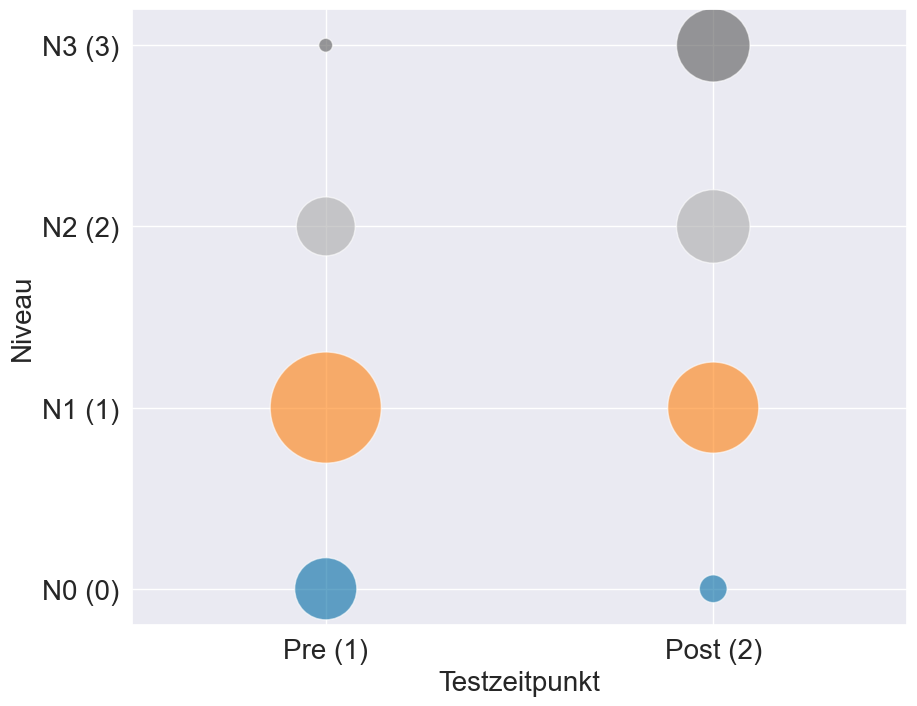

In [8]:
# Häufigkeiten der Datenpunkte berechnen
data_points = list(zip(df_long['Testzeitpunkt'], df_long['Niveau']))
counts = Counter(data_points)

# Extrahiere die einzigartigen (Testzeitpunkt, Niveau) Werte und deren Häufigkeiten
unique_data = pd.DataFrame(list(counts.keys()), columns=['Testzeitpunkt', 'Niveau'])
unique_data['Häufigkeit'] = list(counts.values())

# Farben definieren basierend auf dem Niveau-Wert
color_map = {
    0: '#006BA4',  # Farbe für Niveau 0
    1: '#FF800E',  # Farbe für Niveau 1
    2: '#ABABAB',  # Farbe für Niveau 2
    3: '#595959'   # Farbe für Niveau 3
}

# Farben für die einzelnen Punkte zuordnen
colors = [color_map[niveau] for niveau in unique_data['Niveau']]


Schriftgroesse = 20

# Streudiagramm erstellen
plt.figure(figsize=(10, 8))
plt.scatter(unique_data['Testzeitpunkt'], unique_data['Niveau'],  
            s=unique_data['Häufigkeit'] * 100,  # Punktgröße proportional zur Häufigkeit (dok: s="The marker size in points**2 (typographic points are 1/72 in.)"
            color=colors, alpha=0.6, edgecolors='w')



# Anpassungen der Achsen:
plt.xlim(0.5, 2.5)  # Bereich der y-Achse auf 0.5 bis 2.5 setzen
plt.xticks([1, 2], ['Pre (1)', 'Post (2)'], fontsize=Schriftgroesse)  # Werte 1 und 2 mit Labels versehen

plt.ylim(-0.2, 3.2)  # Bereich der y-Achse auf 0.5 bis 2.5 setzen
plt.yticks([0, 1, 2, 3], ['N0 (0)', 'N1 (1)', 'N2 (2)', 'N3 (3)'], fontsize=Schriftgroesse)  # Werte 1 und 2 mit Labels versehen


# Titel und Achsenbeschriftungen hinzufügen
#plt.title('Testzeitpunkt gegen Niveaus (Punktgröße proportional zur Häufigkeit)')
plt.xlabel('Testzeitpunkt', fontsize=Schriftgroesse)
plt.ylabel('Niveau', fontsize=Schriftgroesse)
plt.grid(True)

plt.savefig(Ordner_Ziel_Abbildungen + "/" + code + "_Korrelationsplot.pdf", format='pdf')
plt.show()



### Cronbachs Alpha für verschiedene Sets berechnen

In [ ]:
# aus der Bibliothek v5 zunächst wieder herausgeholt.

# Code für Cronbachs Alpha von https://www.educative.io/answers/how-to-implement-cronbachs-alpha-for-reliability-in-python
def cronbach_alpha(data):
    # Transform the data frame into a correlation matrix
    df_corr = data.corr()
    
    # Calculate N
    # The number of variables is equal to the number of columns in the dataframe
    N = data.shape[1]
    
    # Calculate r
    # For this, we'll loop through all the columns and append every
    # relevant correlation to an array called 'r_s'. Then, we'll
    # calculate the mean of 'r_s'.
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha


# Calling function to the calculate value of Cronbach's alpha
#cronbach_alpha(data)
#print(cronbach_alpha(df_Niveaus_pre))
# Wurde nun doch nicht genutzt, weil es leichte Abweichungen zu der Funktion in der pinguine-Bibliothek gab, und diese besser zitierbar ist und vertrauenwürdiger scheint. 

In [ ]:
df_cronbachsalpha = pd.DataFrame(columns=["global, M1-PR2", "Modelle, M1-M4", "Simulation, S1-S3", "Peer Review, PR1-PR2"], 
                                 index=["pre", "post", "beide"])

df_cronbachsalpha["global, M1-PR2"] = [ca(df_Niveaus_pre), ca(df_Niveaus_post), ca(df_Niveaus_beide)]
df_cronbachsalpha["Modelle, M1-M4"] = [ca(df_Niveaus_M_pre), ca(df_Niveaus_M_post), ca(df_Niveaus_M_beide)]
df_cronbachsalpha["Simulation, S1-S3"] = [ca(df_Niveaus_S_pre), ca(df_Niveaus_S_post), ca(df_Niveaus_S_beide)]
df_cronbachsalpha["Peer Review, PR1-PR2"] = [ca(df_Niveaus_PR_pre), ca(df_Niveaus_PR_post), ca(df_Niveaus_PR_beide)]
#df_cronbachsalpha[] = [ca(), ca(), ca()]

## anderes

In [ ]:
# Achsen anders herum im Korrelationsplot
# Häufigkeiten der Datenpunkte berechnen
data_points = list(zip(df_long['Testzeitpunkt'], df_long['Niveau']))
counts = Counter(data_points)

# Extrahiere die einzigartigen (Testzeitpunkt, Niveau) Werte und deren Häufigkeiten
unique_data = pd.DataFrame(list(counts.keys()), columns=['Testzeitpunkt', 'Niveau'])
unique_data['Häufigkeit'] = list(counts.values())

# Farben definieren basierend auf dem Niveau-Wert
color_map = {
    0: '#006BA4',  # Farbe für Niveau 0
    1: '#FF800E',  # Farbe für Niveau 1
    2: '#ABABAB',  # Farbe für Niveau 2
    3: '#595959'   # Farbe für Niveau 3
}

# Farben für die einzelnen Punkte zuordnen
colors = [color_map[niveau] for niveau in unique_data['Niveau']]


# Streudiagramm erstellen
plt.figure(figsize=(10, 8))
plt.scatter(unique_data['Niveau'], unique_data['Testzeitpunkt'], 
            s=unique_data['Häufigkeit'] * 50,  # Punktgröße proportional zur Häufigkeit
            color=colors, alpha=0.6, edgecolors='w')


# Anpassungen der Achsen:
plt.ylim(0.5, 2.5)  # Bereich der y-Achse auf 0.5 bis 2.5 setzen
plt.yticks([1, 2], ['Pre (1)', 'Post (2)'])  # Werte 1 und 2 mit Labels versehen

plt.xlim(-0.2, 3.2)  # Bereich der y-Achse auf 0.5 bis 2.5 setzen
plt.xticks([0, 1, 2, 3], ['N0 (0)', 'N1 (1)', 'N2 (2)', 'N3 (3)'])  # Werte 1 und 2 mit Labels versehen


# Titel und Achsenbeschriftungen hinzufügen
plt.title('Plot der Niveau-Werte gegen Testzeitpunkt (Punktgröße proportional zur Häufigkeit)')
plt.ylabel('Testzeitpunkt')
plt.xlabel('Niveau')
plt.grid(True)
plt.show()

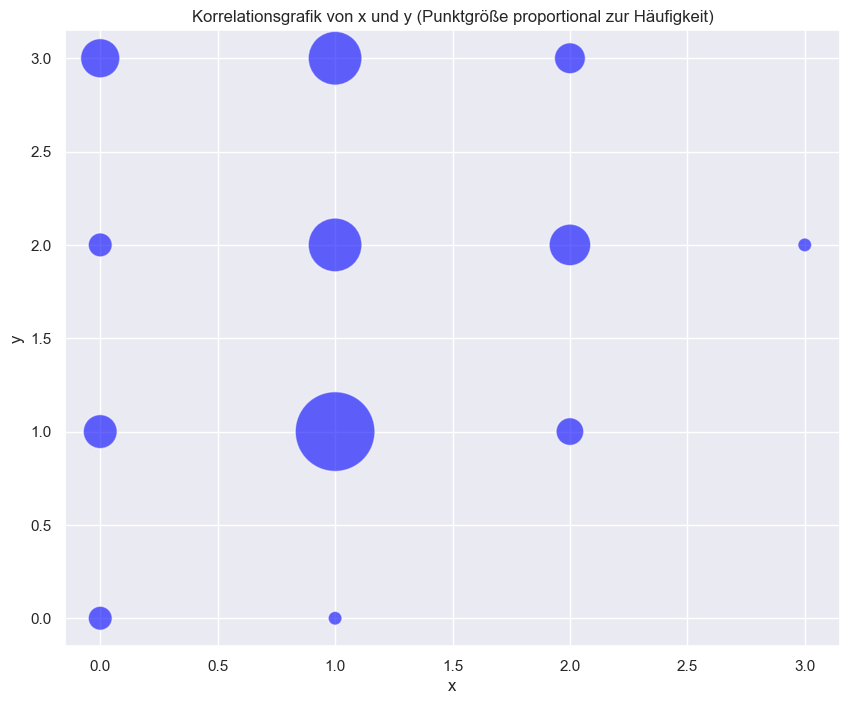

In [82]:

# Beispiel-Daten mit wiederholten Werten
x = pre
y = post

# Datenpunkte zählen
data = list(zip(x, y))
counts = Counter(data)

# Extrahiere die einzigartigen (x, y) Werte und deren Häufigkeiten
unique_data = np.array(list(counts.keys()))
frequencies = np.array(list(counts.values()))

# Streudiagramm erstellen
plt.figure(figsize=(10, 8))
plt.scatter(unique_data[:, 0], unique_data[:, 1], s=frequencies * 100, color='blue', alpha=0.6, edgecolors='w')
plt.title('Korrelationsgrafik von x und y (Punktgröße proportional zur Häufigkeit)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


In [ ]:
# Spalten umbenennen: 
def umbenennen(alt, neu, df):
    df = df.rename(columns={alt: neu}, inplace=True)

umbenennen("Wilcoxons p", "Wilcoxon $p$", df_stats_all_transp)
umbenennen("Bonferroni p", "Bonferroni $p$", df_stats_all_transp)
umbenennen("Spearman R", "Spearman $r_s$", df_stats_all_transp)
umbenennen("N", "$N_{\mathcal{F}}$", df_stats_all_transp)
umbenennen("kappa Kategorien", "$\kappa_{Kat}$", df_stats_all_transp)
umbenennen("kappa Niveaus", "$\kappa_{Niv}$", df_stats_all_transp)
umbenennen("ICR", "$\kappa_{ICR}$", df_stats_all_transp)
umbenennen("N_Int", "$N_{\mathcal{F}, \, Interviews}$", df_stats_all_transp)
umbenennen("mean", "$ \\bar{\Delta \mathcal{N}_\mathcal{F}}$", df_stats_all_transp)
umbenennen("std", "$\sigma \Delta \mathcal{N}_\mathcal{F}$", df_stats_all_transp)
#umbenennen("", "", df)

print(df_stats_all_transp)

In [ ]:
# Nun noch das ganze global ohne PR3 berechnen: 
df_hist_ohnePR3 = df_hist.drop(columns=["PR3"])
df_hist_abs_ohnePR3 = df_hist_abs.drop(columns=["PR3"])
df_NMeanStd_ohnePR3 = df_NMeanStd.drop(columns=["PR3"])

N_global = len(all_values)

df_hist['global, ohne PR3'] = df_hist_abs_ohnePR3.sum(axis=1) / N_global

df_NMeanStd["global, ohne PR3"] = [int(N_global), np.mean(all_values), np.mean(np.abs(all_values)), np.std(all_values)]

In [ ]:
# Schriftart auf Avenir Next setzen (klappt nicht gut - das lassen)
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Avenir Next']

import matplotlib.font_manager as fm

# Pfad zur Schriftart (stellen Sie sicher, dass die Schriftart installiert ist)
font_path = '/System/Library/Fonts/Avenir Next.ttc'  # MacOS
# Erstelle ein FontProperties-Objekt
prop = fm.FontProperties(fname=font_path)

# Beispiel-Plot mit spezifischer Schriftart
plt.figure(figsize=(8, 6))
plt.plot([1, 2, 3], [1, 4, 9])

# Verwende fontproperties beim Titel und Achsentiteln
plt.title('Titel in Avenir Next', fontproperties=prop, fontsize=16)
plt.xlabel('X-Achse', fontproperties=prop, fontsize=12)
plt.ylabel('Y-Achse', fontproperties=prop, fontsize=12)

# Zeige den Plot an
plt.show()

## Darstellung der Ergebnisse als stacked barplots [alt - ehemals 12.3]

In [22]:
# Dataframe für Plot anlegen:
df_plot = pd.DataFrame(index = ["N0", "N1", "N2", "N3"])

# Dataframe für spätere Statistic anlegen (Zeilen = Personen)
df_stat = pd.DataFrame()
df_stat_pre = pd.DataFrame()
df_stat_post = pd.DataFrame()


# angeben, welche codes geplottet werden sollen:

codes = ["M1", "M2", "M3", "M4", "S1", "S2", "S3", "PR1", "PR2", "PR3"]

codes_M = ["M1", "M2", "M3", "M4"]
codes_S = ["S1", "S2", "S3"]
codes_PR = ["PR1", "PR2", "PR3"]

In [24]:
# Einblick: eingelesen werden die Niveaudaten, aus denen "nicht zuordenbar" bereits herausgefiltert wurde: 
code = "S3"
df_Niveaus = pd.read_pickle(Ordner_Ziel_Daten + "/" + code + "NiveausPrePost_filtered.pkl")
subset_N3 = df_Niveaus[df_Niveaus['post'].isin([3])]

In [26]:
subset_N3

,pre,post
23,0.0,3.0
31,0.0,3.0
32,1.0,3.0
64,0.0,3.0
69,0.0,3.0
78,0.0,3.0
86,0.0,3.0
104,0.0,3.0
132,0.0,3.0


***** ***** *****
M1
103
***** ***** *****
M2
137
***** ***** *****
M3
138
***** ***** *****
M4
140


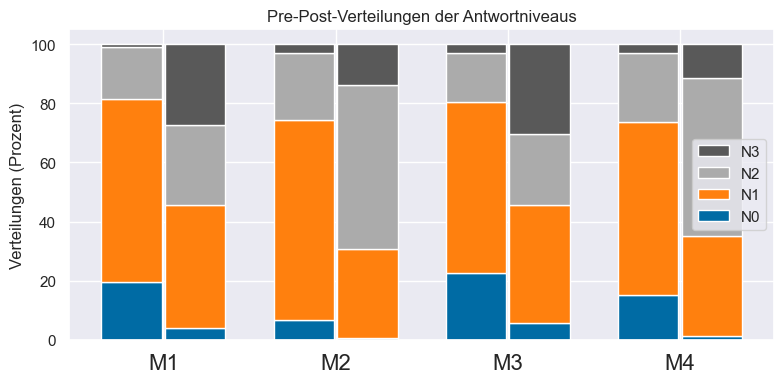

In [28]:

##### ##### ##### ##### ##### ##### ##### ##### ##### ##### #####
#####   erst berechnen, was geleich geplottet werden soll   #####
#####   zum Plotten die drei folgenden Zeilen anpassen      #####
#####   und: erst Kernel neustarten, damit df_plot leer ist #####
##### ##### ##### ##### ##### ##### ##### ##### ##### ##### #####

Kuerzel_Speicherung = "M"
switch = "M" # "M", "S", or "PR"
for code in codes_M: # Optionen s. oben
    
    print("***** ***** *****")
    print(code)
    df_Niveaus = pd.read_pickle(Ordner_Ziel_Daten + "/" + code + "NiveausPrePost_filtered.pkl") # schon ohne "nicht zuordenbar"
      
    # df_Niveaus.rename(columns={'Unnamed: 0': 'PNr'}, inplace=True)
    
    # pre
    pre_values = df_Niveaus["pre"].values
    pre_hist = np.histogram(pre_values, bins = [0, 0.8, 1.8, 2.8, 3.8])
    label = code + ", \n pre"
    N = df_Niveaus.shape[0]
    print(N)
    df_plot[label] = pre_hist[0] / N * 100.
    df_stat[code + "_pre"] = df_Niveaus["pre"]
    df_stat_pre[code] = df_Niveaus["pre"]
    
    # post
    post_values = df_Niveaus["post"].values
    post_hist = np.histogram(post_values, bins = [0, 0.8, 1.8, 2.8, 3.8])
    label = code + ", \n post"
    df_plot[label] = post_hist[0] / N * 100.
    df_stat[code + "_post"] = df_Niveaus["post"]
    df_stat_post[code] = df_Niveaus["post"]
    
# um später Platz für die Legende zu haben:
#df_plot["leer1"] = np.zeros(4)
#df_plot["leer2"] = np.zeros(4)
    
df_plot.to_excel(Ordner_Ziel_Daten + "/Werte_StackedBarplot" + Kuerzel_Speicherung + ".xlsx")
df_plot.to_pickle(Ordner_Ziel_Daten + "/Werte_StackedBarplot" + Kuerzel_Speicherung + ".pkl")

##### ##### ##### ##### ##### ##### ##### ##### ##### 
##### ##### #####   jetzt plotten   ##### ##### ##### 
##### ##### ##### ##### ##### ##### ##### ##### ##### 

df_print = df_plot.T

bar_width = 0.35
e = 0.01 # half width between pre-post of one Subcatagory
c = bar_width / 2. + e

if switch == "M":
    bar_centers = np.array([1,1, 2,2, 3,3, 4,4])
    double_centers = np.array([1, 2, 3, 4])
    offset_pre_post = np.array([-c, +c, -c, +c,-c, +c,-c, +c])
    labels = codes_M
elif switch == "S":
    bar_centers = np.array([1,1, 2,2, 3,3])
    double_centers = np.array([1, 2, 3])
    offset_pre_post = np.array([-c, +c, -c, +c,-c, +c])
    labels = codes_S
else:
    bar_centers = np.array([1,1, 2,2, 3,3])
    double_centers = np.array([1, 2, 3])
    offset_pre_post = np.array([-c, +c, -c, +c,-c, +c])
    labels = codes_PR
    

bar_positions = bar_centers + offset_pre_post

sns.set(style="darkgrid")

#with plt.style.context(("seaborn-colorblind",)):

# Create the stacked bar chart using Matplotlib
plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(figsize=(8,4))


ax.bar(bar_positions, df_print['N0'], width=bar_width, label='N0', align='center')
ax.bar(bar_positions, df_print['N1'], width=bar_width, label='N1', align='center', bottom=df_print['N0'])
ax.bar(bar_positions, df_print['N2'], width=bar_width, label='N2', align='center', bottom=df_print['N0']+df_print['N1'])
ax.bar(bar_positions, df_print['N3'], width=bar_width, label='N3', align='center', bottom=df_print['N0']+df_print['N1']+df_print['N2'])

#plt.xlabel('Pre-Post-Verteilungen der Subkategoriensysteme')
schriftgroesse =  12

plt.ylabel('Verteilungen (Prozent)', fontsize = schriftgroesse)
plt.title('Pre-Post-Verteilungen der Antwortniveaus', fontsize = schriftgroesse)


plt.xticks(double_centers, labels, fontsize = 16)

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center right')#, title='Line')
fig.tight_layout()

plt.savefig(Ordner_Ziel_Abbildungen + "/Uebersicht_PrePost_VerteilungenNiveaus" + Kuerzel_Speicherung + ".pdf")
plt.savefig(Ordner_Ziel_Abbildungen + "/Uebersicht_PrePost_VerteilungenNiveaus" + Kuerzel_Speicherung + ".png")
plt.show()



In [30]:
df_plot

,"M1, \n pre","M1, \n post","M2, \n pre","M2, \n post","M3, \n pre","M3, \n post","M4, \n pre","M4, \n post"
N0,19.417476,3.883495,6.569343,0.729927,22.463768,5.797101,15.000000,1.428571
N1,62.135922,41.747573,67.883212,29.927007,57.971014,39.855072,58.571429,33.571429
N2,17.475728,27.184466,22.627737,55.474453,16.666667,23.913043,23.571429,53.571429
N3,0.970874,27.184466,2.919708,13.868613,2.898551,30.434783,2.857143,11.428571


In [32]:
df_Niveaus

,pre,post
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
5,2.0,2.0
...,...,...
138,2.0,2.0
139,0.0,3.0
140,1.0,1.0
141,1.0,2.0


In [270]:
import matplotlib.pyplot as plt

# Set the style to 'tableau-colorblind10'
plt.style.use('tableau-colorblind10')

# Get the color cycle
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Extract the first four colors
first_four_colors = colors[:4]

# Print the colors
print(first_four_colors)


['#006BA4', '#FF800E', '#ABABAB', '#595959']
